# Problem Set 4, due October 23 at 11:59pm

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


c:\Python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [4]:
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.keys()
# print bdata.feature_names
# print bdata.data.shape
# print bdata.target.shape
# print bdata.DESCR

In [5]:
# Initialize a Pandas DataFrame with Boston data
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]

# Add the MEDV variable
boston['MEDV'] = bdata.target


# Using statsmodels module
print("Statsmodels module models")

# (a) Regression: Housing price on the number of rooms per house 
print("Model A: MEDV ~ RM")
ModelA = smf.ols(formula = 'MEDV ~ RM', data = boston).fit()

# Summary display
print(ModelA.summary())

# Standard error
ModelA.bse

# (b) Regression: Housing price on RM and RM^2
# Add new variable RM squared
boston['RM2'] = np.power(boston["RM"].values, 2)

print("\nModel A: MEDV ~ RM + RM ** 2")
ModelB = smf.ols(formula = 'MEDV ~ RM + RM2', data = boston).fit()

# Summary display
print(ModelB.summary())

# Standard error
print("\nStandard error")
ModelB.bse

Statsmodels module models
Model A: MEDV ~ RM
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 21 Oct 2017   Prob (F-statistic):           2.49e-74
Time:                        04:33:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

Intercept    12.103988
RM            3.754232
RM2           0.290520
dtype: float64

In [47]:
# Sciklearn linear regression
print("Sciklearn linear regression models")

## Model MEDV ~ RM
# Features and target values
X = boston["RM"]
Y = boston["MEDV"]

# Reshape X for scikalearn format
#X2 = X.reshape(-1, 1)
X2 = X.values.reshape(-1,1)

# Check inputs heads
'''
print("X Head")
display(X.head())
print("Y Head")
display(Y.head())
'''

# Linear regression model
lmRM = LinearRegression()

# Fit the model
lmRM.fit(X2, boston.MEDV)

# Print results
print("Model: MEDV ~ RM")
print("Number of coefficients:", len(lmRM.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM.intercept_)
print("RM:               ", lmRM.coef_[0])
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((boston.MEDV - lmRM.predict(X2)) ** 2)))
print("R-Squared:" , lmRM.score(X2, Y))

# Save intercept and slope for next problem
Intercept = lmRM.intercept_
Orig_Slope = lmRM.coef_[0]

## Model MEDV ~ RM + RM^2
# Features and target values
X = boston[["RM", "RM2"]]
Y = boston["MEDV"]

# Copy X for scatter plot
XRM2 = X

# Check inputs heads
'''
print("X Head")
display(X.head())
print("Y Head")
display(Y.head())
'''

# Linear regression model
lmRM2 = LinearRegression()

# Fit the model
lmRM2.fit(X, boston.MEDV)

# Print results
print("\n\nModel: MEDV ~ RM + RM^2")
print("Number of coefficients:", len(lmRM2.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM2.intercept_)
aux = 0
for i in X.columns:
    print(i, ":           ", lmRM2.coef_[aux])
    aux += 1
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((boston.MEDV - lmRM2.predict(X)) ** 2)))
print("R-Squared:" , lmRM2.score(X, Y))

# Save intercept and slope for next problem
Intercept2 = lmRM2.intercept_
Orig_Slope2 = lmRM2.coef_[0]

Sciklearn linear regression models
Model: MEDV ~ RM
Number of coefficients: 1
-------------------- Coefficients --------------------
Intercept value: -34.6706207764
RM:                9.10210898118
------------------------------------------------------
RMSE: 6.60307138922
R-Squared: 0.483525455991


Model: MEDV ~ RM + RM^2
Number of coefficients: 2
-------------------- Coefficients --------------------
Intercept value: 66.0588474848
RM :            -22.6432623742
RM2 :            2.47012384403
------------------------------------------------------
RMSE: 6.17427787376
R-Squared: 0.548425637397


## Observations 
### Regressing the housing price on the number of rooms per house (Interpret your results)
From both previous linear regressions we can see that when we use the variable $RM$ as the main (and unique) feature for fitting the model with $MEDV$ as target variable we obtain the following relevant values:
- $Intercept = -34.671$: This value indicates that the basal value of $MEDV$,  the average housing price in [1000\$], when we have zero rooms per house is $-34.671$.
- $\hat{\beta_{RM}} = 9.10$: This estimated coefficient indicates us that the average housing price in [$1000$\$] increases in  $9.10$ [$1000$\$] for each room inside the house in average. Hence, more rooms per house will lead to higher housing prices based on the linear model obtained.
- $R^{2} = 0.4835$: The total amount of variance explained by the simple linear model is around 50\% of the total. Hence, the model has a significant margin for improvements: extra variables can be added in order to increase this value.

### Regressing the housing price on the number of rooms per house and the (number of rooms per house) squared (Interpret your results)

From the models, we have the following values:
- $Intercept = 66.058$: This value indicates that the basal value of $MEDV$, the average housing price in [1000\$], when we have zero rooms per house is $66.058$.
- $\hat{\beta_{RM^{2}}} = 2.47$: This estimated coefficient indicates us that the average housing price in [1000\$] increases in  $2.47$ [1000\$] in average with the square value of the number of rooms inside the house in average. Hence, more rooms per house will lead to higher housing prices based on the quadratic model.
- $\hat{\beta_{RM}} = -22.64$: In this new model, we can see that the estimated coefficient of the $RM$ variable indicates us that the average housing price in [1000\$] decreases in  $22.64$ [1000\$] for each room inside the house in average. Hence, more rooms per house will lead to lower housing prices, and the total effect will be the result of the interaction between this linear term and the quadratic term (previous $\hat{\beta_{RM^{2}}}$).
- $R^{2} = 0.5484$: The total amount of variance explained by the quadratic model is around $55$% of the total. Hence, this model obtains a "better" (higher) value for the total amount of variance explained.


Based on the previous outputs, we can easily see that in this second model, we obtain different estimations for both the intercept and $RM$ coefficients (plus the new coefficient for $RM^{2}$) and in addition, it may be classified as a "better" model in terms of the $R^{2}$ value. However, this better $R^{2}$ value can be interpreted in a different way in this case: since we are including a quadratic term for the number of rooms per house in order to estimate the housing price, the model can improve due to the overfitting phenomenon. Adding the extra variable $RM^{2}$ to the model will clearly add more information to the regression and thus, improve the total amount of variance explained, however, it may overfit the model to the current training (all the set) data, losing its predictive power for unknown (test) data that were not used when training the model.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 25-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 25 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

In [39]:
# Original importation
from sklearn.cross_validation import KFold

# Random seed: reproducibility
np.random.seed(1)

# Real instance Model (a)
X = np.array(boston["RM"])
y = np.array(boston["MEDV"])

# K-folds value
k = 25

# Intercept and feature coefficient
Results = [0 for i in range(0, k)]

# Niters
niters = 0

# CV k = 25
kf = KFold(n_folds = k, n = len(X), shuffle = True)

# CV Loop
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Iteration number
    print("------------------------- Iteration", niters + 1, "-------------------------")

    print("Checking dimension")
    print(len(X_train), len(X_test))
    print(len(y_train), len(y_test))

    # Linear regression model
    lm = LinearRegression()

    # Reshape X
    X_train = np.reshape(X_train, (-1, 1))
    X_test = np.reshape(X_test, (-1, 1))

    # Fit the model
    lm.fit(X_train, y_train)

    # Save iteration results
    Results[niters] = [lm.intercept_, lm.coef_[0]]
    print("Results:",Results[niters])
    
    # Print results
    print("Model: MEDV ~ RM")
    print("Number of coefficients:", len(lm.coef_))
    print("-------------------- Coefficients --------------------")
    print("Intercept value:", lm.intercept_)
    print("RM:               ", lm.coef_[0])
    print("------------------------------------------------------")
    print("RMSE:", np.sqrt(np.mean((y_test - lm.predict(X_test)) ** 2)))
    print("R-Squared:" , lm.score(X_train, y_train))
    print("----------------------------------------------------------------")

    # Next iteration
    niters += 1

------------------------- Iteration 1 -------------------------
Checking dimension
485 21
485 21
Results: [-35.019754702464354, 9.1528551399735285]
Model: MEDV ~ RM
Number of coefficients: 1
-------------------- Coefficients --------------------
Intercept value: -35.0197547025
RM:                9.15285513997
------------------------------------------------------
RMSE: 4.78332337147
R-Squared: 0.479679673555
----------------------------------------------------------------
------------------------- Iteration 2 -------------------------
Checking dimension
485 21
485 21
Results: [-34.03589315217814, 9.0028613832697282]
Model: MEDV ~ RM
Number of coefficients: 1
-------------------- Coefficients --------------------
Intercept value: -34.0358931522
RM:                9.00286138327
------------------------------------------------------
RMSE: 5.88998452394
R-Squared: 0.473817263392
----------------------------------------------------------------
------------------------- Iteration 3 ---------

Mean value slopes (25-fold CV): 9.10279671462
Original slope:                 9.10210898118


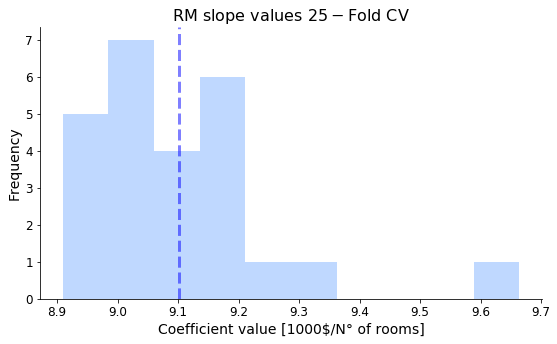

In [40]:
# Slopes
Slopes = [Results[i][1] for i in range(0, k)]
    
# Plot histogram
# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Figure size
plt.figure(figsize = (9, 5)) 

# Axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.title(r'$\mathrm{RM\ slope\ values\ 25-Fold\ CV}$')
plt.xlabel(r'Coefficient value [1000$/N° of rooms]')
plt.ylabel(r'Frequency')

# Plot
plt.hist(Slopes, color = '#80b3ff', alpha = 0.5)
plt.axvline(Orig_Slope, color = 'b', linestyle = 'dashed', 
            linewidth = 3, alpha = 0.5)


# Check mean
print("Mean value slopes (25-fold CV):", np.mean(Slopes))
print("Original slope:                ", Orig_Slope)

In [41]:
# Second model: MEDV ~ RM + RM^2
# Random seed: reproducibility
np.random.seed(1)

# Real instance Model (b)
X = np.array(boston[["RM", "RM2"]])
y = np.array(boston["MEDV"])

# K-folds value
k = 25

# Intercept and feature coefficient
Results = [0 for i in range(0, k)]

# Niters
niters = 0

# CV k=25
kf = KFold(n_folds = k, n = len(X), shuffle = True)

# Generate the sets
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Iteration number
    print("------------------------- Iteration", niters + 1, "-------------------------")
        
    print("Checking dimension")
    print(len(X_train), len(X_test))
    print(len(y_train), len(y_test))

    # Linear regression model
    lm = LinearRegression()

    # Fit the model
    lm.fit(X_train, y_train)

    # Save iteration results
    Results[niters] = [lm.intercept_, lm.coef_[0], lm.coef_[1]]
    print("Results:", Results[niters])
    
    # Print results
    print("Model: MEDV ~ RM")
    print("Number of coefficients:", len(lm.coef_))
    print("-------------------- Coefficients --------------------")
    print("Intercept value:", lm.intercept_)
    print("RM:               ", lm.coef_[0])
    print("RM2:              ", lm.coef_[1])
    print("------------------------------------------------------")
    print("RMSE:", np.sqrt(np.mean((y_test - lm.predict(X_test)) ** 2)))
    print("R-Squared:" , lm.score(X_train, y_train))
    print("----------------------------------------------------------------")

    # Next iteration
    niters += 1
    

------------------------- Iteration 1 -------------------------
Checking dimension
485 21
485 21
Results: [67.584695756154957, -23.264136136011075, 2.5290018615972123]
Model: MEDV ~ RM
Number of coefficients: 2
-------------------- Coefficients --------------------
Intercept value: 67.5846957562
RM:                -23.264136136
RM2:               2.5290018616
------------------------------------------------------
RMSE: 4.55479868267
R-Squared: 0.545307067528
----------------------------------------------------------------
------------------------- Iteration 2 -------------------------
Checking dimension
485 21
485 21
Results: [65.97251893179336, -22.44826078236353, 2.4422006034465209]
Model: MEDV ~ RM
Number of coefficients: 2
-------------------- Coefficients --------------------
Intercept value: 65.9725189318
RM:                -22.4482607824
RM2:               2.44220060345
------------------------------------------------------
RMSE: 4.83070446482
R-Squared: 0.536187823852
---------

Mean value slopes (25-fold CV): -22.6598612643
Original slope:                 -22.6432623742


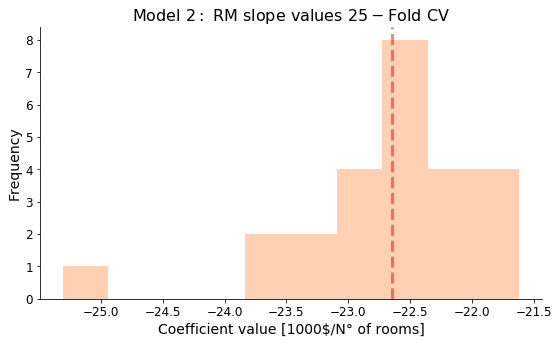

In [42]:
# Slopes
Slopes = [Results[i][1] for i in range(0, k)]
    
# Plot histogram
# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Figure size
plt.figure(figsize = (9, 5)) 

# Axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.title(r'$\mathrm{Model\ 2:\ RM\ slope\ values\ 25-Fold\ CV}$')
plt.xlabel(r'Coefficient value [1000$/N° of rooms]')
plt.ylabel(r'Frequency')

# Plot
plt.hist(Slopes, color = '#ffa366', alpha = 0.5)
plt.axvline(Orig_Slope2, color = 'r', linestyle = 'dashed', 
            linewidth = 3, alpha = 0.5)


# Check mean
print("Mean value slopes (25-fold CV):", np.mean(Slopes))
print("Original slope:                ", Orig_Slope2)

## Observations
###  Plot the distribution of the 25 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset. What do you notice?
Based on the results obtained for both models (linear and quadratic models), we can easily notice that the original slope obtained when no cross-validation was performed (fitting all data) is almost identical to the average 25-fold cross-validation value: if we compute the mean value of all the $25$ slopes obtained when CV is performed, we can see that it is almost the same value to the one obtained in the original models when all the data was used.

This pattern was expected since when we perform the cross-validation, we are fitting the model with different training sets and in average, we will have estimations for the coefficients (the slope in this case) that are pretty similar to the ones that we would obtain if we fit the model to the entire dataset. This happens because in average, the CV methodology will fit a model that it is the best (in terms of prediction) for the entire dataset.

Looking at the results, we have:
- Model 1 ($MEDV \approx RM$): The original slope for the $RM$ variable is $\hat{\beta_{RM}} = -9.1021$ while the average value of the $25$ slopes obtained when performing the 25-fold CV is $\overline{\beta_{25-foldCV}} = -9.1027$. Clearly, both values are almost identical as expected.
- Model 2 ($MEDV \approx RM + RM^{2}$): The original slope for the $RM$ variable is $\hat{\beta_{RM}} = -22.643$ while the average value of the $25$ slopes obtained when performing the 25-fold CV is $\overline{\beta_{25-foldCV}} = -22.659$. As before, both values are pretty similar as expected.

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

,0,1
Intercept,-39.876641,-29.464601
RM,8.278855,9.925363


,0,1
Intercept,42.278246,89.839449
RM,-30.019169,-15.267356
RM2,1.899341,3.040906


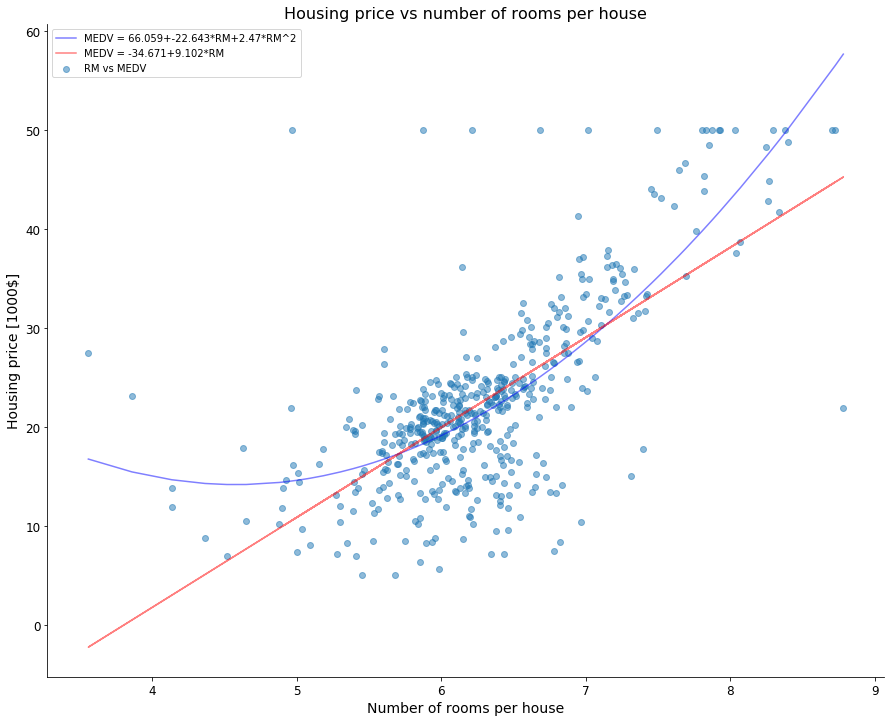

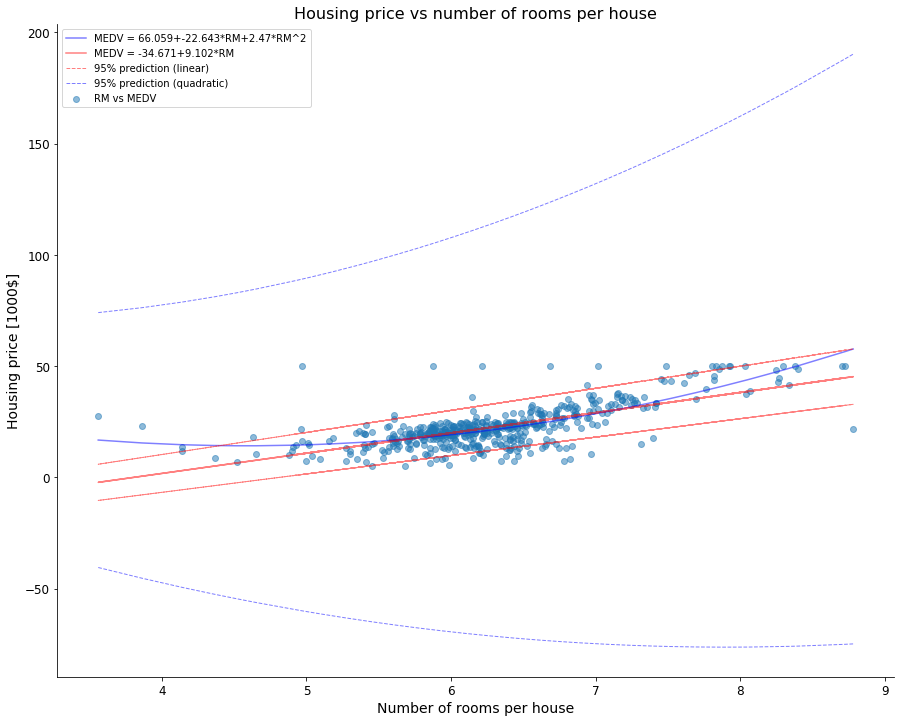

In [153]:
# Scatter plots and regressions
# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (15, 12)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.title(r'Housing price vs number of rooms per house')
plt.xlabel(r'Number of rooms per house')
plt.ylabel(r'Housing price [1000$]')

# Labels
Label1 = "MEDV = " + str(np.round(lmRM.intercept_, 3)) + "+" + \
         str(np.round(lmRM.coef_[0], 3)) + "*RM" 
Label2 = "MEDV = " + str(np.round(lmRM2.intercept_, 3)) +  \
         "+" + str(np.round(lmRM2.coef_[0], 3)) + "*RM" + "+" + \
         str(np.round(lmRM2.coef_[1], 3)) + "*RM^2" 

# Plot
XRM2 = XRM2.sort_values('RM', ascending = True)
plt.plot(XRM2["RM"], lmRM2.predict(XRM2), 'b-', alpha = 0.5, label = Label2)

plt.scatter(boston["RM"], boston["MEDV"], alpha = 0.5, label = "RM vs MEDV")
plt.plot(boston["RM"], lmRM.predict(X2), 'r-', alpha = 0.5, label = Label1)

# Add legend
plt.legend()


# Figure 2 (95% CI added)
plt.figure(2)

# Figure size
plt.figure(figsize = (15, 12)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.title(r'Housing price vs number of rooms per house')
plt.xlabel(r'Number of rooms per house')
plt.ylabel(r'Housing price [1000$]')

# Labels
Label1 = "MEDV = " + str(np.round(lmRM.intercept_, 3)) + "+" + \
         str(np.round(lmRM.coef_[0], 3)) + "*RM" 
Label2 = "MEDV = " + str(np.round(lmRM2.intercept_, 3)) +  \
         "+" + str(np.round(lmRM2.coef_[0], 3)) + "*RM" + "+" + \
         str(np.round(lmRM2.coef_[1], 3)) + "*RM^2" 

# Plot
XRM2 = XRM2.sort_values('RM', ascending = True)
plt.plot(XRM2["RM"], lmRM2.predict(XRM2), 'b-', alpha = 0.5, label = Label2)

plt.scatter(boston["RM"], boston["MEDV"], alpha = 0.5, label = "RM vs MEDV")
plt.plot(boston["RM"], lmRM.predict(X2), 'r-', alpha = 0.5, label = Label1)

# Add legend
plt.legend()

# Prediction 95%: First extra graph
# Model MEDV ~ RM
res = ModelA.conf_int(alpha = 0.05)
display(res)
RMerror_down = res[0][0] + res[0][1] * boston["RM"].values  
RMerror_up = res[1][0] + res[1][1] * boston["RM"].values 

# Uncomment if want to plot with the original intercept
#RMerror_down = Intercept + res[0][1] * boston["RM"].values  
#RMerror_up = Intercept + res[1][1] * boston["RM"].values 

# Model MEDV ~ RM + RM^2
resB = ModelB.conf_int(alpha = 0.05)
display(resB)
RMerror_downB = resB[0][0] + resB[0][1] * XRM2["RM"].values + resB[0][2] * XRM2["RM2"].values
RMerror_upB = resB[1][0] + resB[1][1] * XRM2["RM"].values + resB[1][2] * XRM2["RM2"].values

# Uncomment if want to plot with the original intercept
#RMerror_downB = Intercept2 + resB[0][1] * XRM2["RM"].values + resB[0][2] * XRM2["RM2"].values
#RMerror_upB = Intercept2 + resB[1][1] * XRM2["RM"].values + resB[1][2] * XRM2["RM2"].values

# Plot prediction 95% bands
plt.plot(boston["RM"], RMerror_up, 'r--', alpha = 0.5, 
         lw = 1, label = "95% prediction (linear)")
plt.plot(boston["RM"], RMerror_down, 'r--', alpha = 0.5, lw = 1)
plt.plot(XRM2["RM"], RMerror_upB, 'b--', alpha = 0.5, 
         lw = 1, label = "95% prediction (quadratic)")
plt.plot(XRM2["RM"], RMerror_downB, 'b--', alpha = 0.5, lw = 1)

# Add legend
plt.legend()

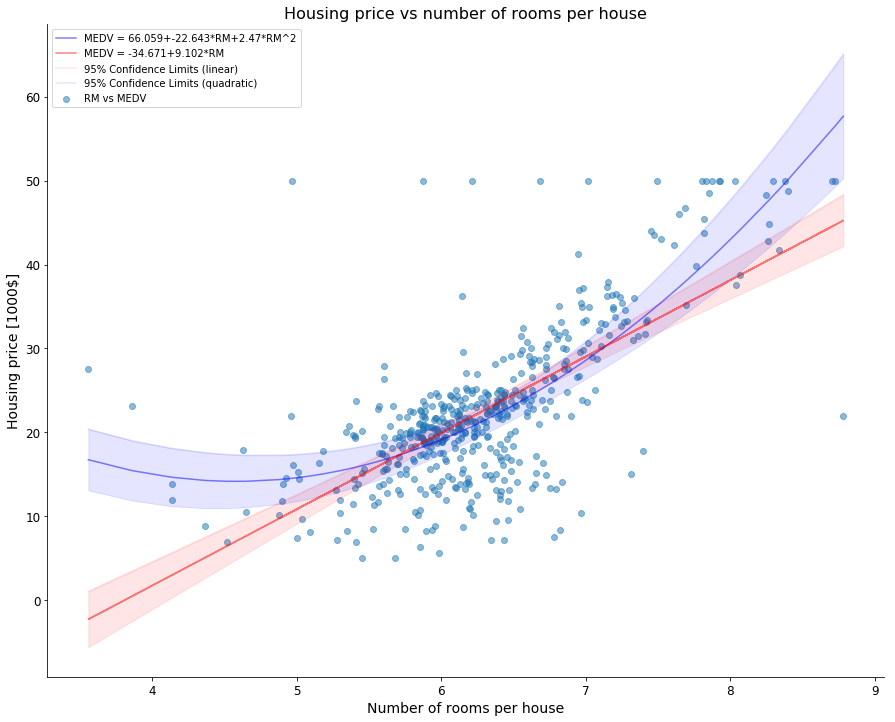

In [159]:
# Confidence intervals 95% plot
## Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (15, 12)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.title(r'Housing price vs number of rooms per house')
plt.xlabel(r'Number of rooms per house')
plt.ylabel(r'Housing price [1000$]')

# Labels
Label1 = "MEDV = " + str(np.round(lmRM.intercept_, 3)) + "+" + \
         str(np.round(lmRM.coef_[0], 3)) + "*RM" 
Label2 = "MEDV = " + str(np.round(lmRM2.intercept_, 3)) +  \
         "+" + str(np.round(lmRM2.coef_[0], 3)) + "*RM" + "+" + \
         str(np.round(lmRM2.coef_[1], 3)) + "*RM^2" 

# Plot
XRM2 = XRM2.sort_values('RM', ascending = True)
plt.plot(XRM2["RM"], lmRM2.predict(XRM2), 'b-', alpha = 0.5, label = Label2)

plt.scatter(boston["RM"], boston["MEDV"], alpha = 0.5, label = "RM vs MEDV")
plt.plot(boston["RM"], lmRM.predict(X2), 'r-', alpha = 0.5, label = Label1)

# Compute Statistics for CI 95%
n = boston.shape[0]
p = 2    
p2 = 3
DF1 = n - p  
DF2 = n - p2
t = sp.stats.t.ppf(0.9975, DF)
t2 = sp.stats.t.ppf(0.9975, DF2)

# Estimates of Error in Data/Model
y_hat = lmRM.predict(X2)
y_hat2 = lmRM2.predict(XRM2)
resid = y - y_hat
resid2 = y - y_hat2
chi2 = np.sum((resid / y_hat) ** 2)
chi2_2 = np.sum((resid2 / y_hat2) ** 2)
chi2_red = chi2 / (DF)           
chi2_red2 = chi2_2 / (DF2)           
s_err = np.sqrt(np.sum(resid ** 2) / (DF))
s_err2 = np.sqrt(np.sum(resid2 ** 2) / (DF2))

# Confidence Interval addition
x_axis = np.linspace(np.min(X2), np.max(X2), 100)
y_axis = np.linspace(np.min(y_hat), np.max(y_hat), 100)

# Linear model
CI = t * s_err * np.sqrt(1 / n  + (x_axis - np.mean(X2)) ** 2 / 
                         np.sum((X2 - np.mean(X2)) ** 2))
ax.fill_between(x_axis, y_axis + CI, y_axis - CI, color='r', 
                alpha = 0.1, edgecolor='')
ax.plot(x_axis, y_axis + CI, '-', color='r', 
        label='95% Confidence Limits (linear)', alpha = 0.1)

# Quadratic model
XRM2 = XRM2.sort_values('RM', ascending = True)
C = np.dot(XRM2.T, XRM2)
CI2 = np.zeros(XRM2.shape[0])
for i in range(XRM2.shape[0]):
    CI2[i] = np.dot(np.dot(XRM2.iloc[i], np.linalg.inv(C)), XRM2.iloc[i].T)
CI2 = np.sqrt(CI2) * t2 * s_err2

ax.fill_between(XRM2["RM"], y_hat2 + CI2, y_hat2 - CI2, color='b', 
                alpha = 0.1, edgecolor='')
ax.plot(XRM2["RM"], y_hat2 + CI2, '-', color='b', 
        label='95% Confidence Limits (quadratic)', alpha = 0.1)

# Prediction Limits (optional)
'''
predLim = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(X2)) ** 2 / np.sum((X2 - np.mean(X2)) ** 2))   
ax.fill_between(x2, y2 + predLim, y2 - predLim, color = 'None', linestyle='--')
ax.plot(x2, y2 - predLim, '--', color='r', alpha = 0.5, label='95% Prediction Limits')
ax.plot(x2, y2 + predLim, '--', color='r')
'''

# Add legend
plt.legend()

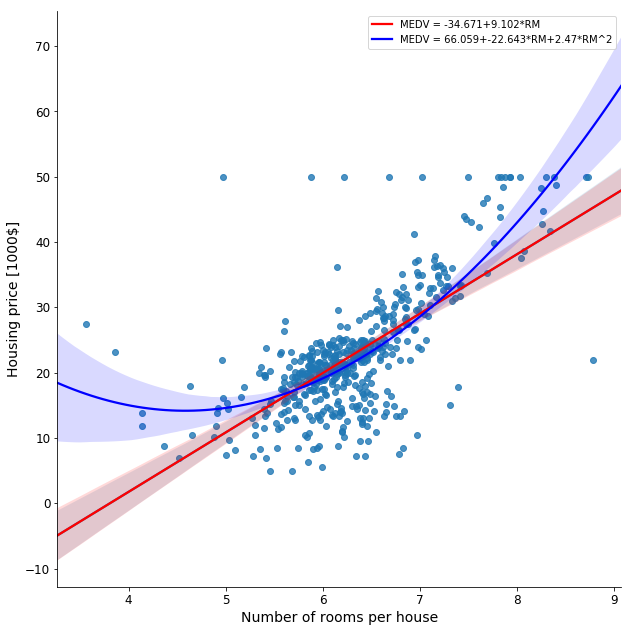

In [155]:
# Seaborn Plot: Extra visualization for comparison purposes
import seaborn as sns

# Generate the plot (scatter)
sns.lmplot('RM', 'MEDV', boston, ci = 95, size = 9)

# Generate the plot (linear and quadratic)
scat1 = sns.regplot('RM', 'MEDV', order = 1, data = boston, 
                    color = 'r', scatter = False, label = Label1)
scat1.legend(loc="best")
scat2 = sns.regplot('RM', 'MEDV', order = 2, data = boston,
                    color = 'b', scatter = False, label = Label2)
scat2.legend(loc="best")
scat1.set(xlabel='Number of rooms per house', ylabel='Housing price [1000$]')

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [163]:
"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    Convergence tolerance
    
verbose: boolean
    Print out iterations information
 
Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000, epsilon=1e-6, verbose=False):
    # initialize the parameters
    start_time = time.time()

    # Initialization
    alpha = 0
    beta = 0
    
    # Keep track of the evolution (potential analysis)
    AlphasIter = np.zeros(MaxIterations + 1)
    BetasIter = np.zeros(MaxIterations + 1)
    
    # Iterations and results
    iters = 1
    ResultIter = np.zeros(MaxIterations + 1)
    
    # Gradient descent loop
    while True:
        if verbose == 1:
            print("--------------------- Iteration", iters, "---------------------")
    
        # Cost function
        CommonF = alpha + beta * xvalues - yvalues
        CostF = 0.5 * np.mean(np.power(CommonF, 2))
        ResultIter[iters] = CostF
        if verbose == True:
            print("Current Cost:", CostF)
        
        # Check if current result is better than previous iteration
        if iters > 1 and ResultIter[iters - 1] < ResultIter[iters]:
            print("No improvement, break")
            break
        
        # Calculate partial derivatives
        LossDerA = np.mean(CommonF)
        LossDerB = np.mean(CommonF * xvalues)
        if verbose == True:
            print("New LossDerA:", LossDerA)
            print("New LossDerB:", LossDerB)
            
        # Update alpha and beta   
        alpha = alpha - R * LossDerA
        beta = beta - R * LossDerB
        
        AlphasIter[iters] = alpha
        BetasIter[iters] = beta
        
        if verbose == True:
            print("New alpha:", alpha)
            print("New beta:", beta)

        # Check convergence (after first iteration)
        if np.abs(ResultIter[iters] - ResultIter[iters-1]) < epsilon and iters > 1:
            print("Convergence threshold (Cost function) reached, break")
            break
        
        # Check convergence of parameters (after first iteration)
        if np.abs(AlphasIter[iters] - AlphasIter[iters-1]) < epsilon \
           and np.abs(BetasIter[iters] - BetasIter[iters-1]) < epsilon \
           and iters > 1: 
            
            print("Convergence threshold (alpha and beta) reached, break")
            break
        
        # Check maximum number of iterations
        if iters + 1 > MaxIterations:
            print("Max number of iterations reached, break")
            break
        
        # Next iteration
        iters += 1
        if verbose == True:
            print("---------------------------------------------------------")
            
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print("Total number of iterations:", iters)
    return alpha, beta

# example function call
# print bivariate_ols(X, Y, 0.01, 100000)


In [189]:
"""
Function
--------
bivariate_olsVersion2
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression
    Extra function for comparison purposes with our original implementation, usoing np.dot() function
    instead of np.sum() and np.mean(). 

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    Convergence tolerance
    
verbose: boolean
    Print out iterations information
 
Returns
-------    
beta: float
    all coefficients (including intercept)
"""

# Gradient descent second implementation
# Predictions function (y_hat)
def yhat_lreg(x, betas, addIntercept = False):
    # Add intercept column if needed
    if addIntercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
    
    # Compute the predictions
    y_hat = np.dot(x, betas)
    return y_hat

# Cost definition
def CostFunction(x, y, betas, Lambda = 0):
    # Compute the predictions
    y_hat = yhat_lreg(x, betas)
    
    # OLS cost function
    costOLS = 0.5 * np.mean(np.power(y_hat - y, 2))   
    
    # If regularization is needed, adjust the function by Lambda
    costF = costOLS  + Lambda * np.dot(betas,betas) / x.shape[0]
    return costF

# Regression
def bivariate_olsVersion2(x, y, iters, R, epsilon = 1e-10, Intercept = False, 
                          verbose = False, InitialGuess = []):
    
    # Starting time
    start_time = time.time()
    
    # If intercept is needed, add it to the array
    if Intercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
        
    # Initialize betas and cost function vectors    
    betas = np.zeros(x.shape[1])
    costF = np.zeros(iters)
    
    # If initial guess for betas
    if len(InitialGuess) > 0:
        betas = InitialGuess
        if verbose == True:
            print("We are using initial values for GD")
            print("Initial betas:", betas)
    
    # Main loop
    for n in range(iters):
        # Make the predictions with current betas
        y_hat = yhat_lreg(x, betas)
        
        # Update betas with gradient
        error = y_hat - y 
        gradient = np.dot(x.T, error) / x.shape[0]
        betas -= R * gradient
       
        # Compute cost function
        costF[n] = CostFunction(x, y, betas)
        
        if verbose == True:
            print("----------------- Iteration", n + 1, "-----------------")
            print("Value Cost Function:", costF[n])
            print("Gradients:", gradient)
            print("Betas:", betas)
            
        # Check convergence
        if np.abs(costF[n] - costF[n - 1]) < epsilon and n > 0:
            if verbose == True:
                print("Convergence reached (Cost function), break")
            break
            
        # Check if no improvement
        if (costF[n] - costF[n - 1]) > 0 and n > 0:
            if verbose == True:
                print("No improvement, break")
            break
    
    # Finalization   
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print("Total number of iterations:", n)
    
    # Return betas array
    return betas

In [193]:
# Optimal values from packages
'''
Intercept value: -34.6706207764
RM:                9.10210898118
'''

# Model Data
x = boston["RM"]
y = boston["MEDV"]

# Call bivariate ols Version 1
print("\nR = 0.1")
print(bivariate_ols(x, y, 0.1, 100000, 1e-10))

print("\nR = 0.05")
print(bivariate_ols(x, y, 0.05, 100000, 1e-10))

print("\nR = 0.03")
print(bivariate_ols(x, y, 0.03, 100000, 1e-10))

print("\nR = 0.02")
print(bivariate_ols(x, y, 0.02, 100000, 1e-10))

print("\nR = 0.01")
print(bivariate_ols(x, y, 0.01, 100000, 1e-10))

print("\nR = 0.005")
print(bivariate_ols(x, y, 0.005, 100000, 1e-10))

print("\nR = 0.001")
print(bivariate_ols(x, y, 0.001, 100000, 1e-10))


R = 0.1
No improvement, break
Time taken: 0.0 seconds
Total number of iterations: 2
(2.2532806324110677, 14.609501501976286)

R = 0.05
No improvement, break
Time taken: 0.0 seconds
Total number of iterations: 2
(1.1266403162055338, 7.3047507509881431)

R = 0.03
Convergence threshold (Cost function) reached, break
Time taken: 32.86 seconds
Total number of iterations: 24707
(-34.665880728837614, 9.1013638216668831)

R = 0.02
Convergence threshold (Cost function) reached, break
Time taken: 48.29 seconds
Total number of iterations: 36219
(-34.664814352322665, 9.1011961818725364)

R = 0.01
Convergence threshold (Cost function) reached, break
Time taken: 90.92 seconds
Total number of iterations: 69558
(-34.662407191167027, 9.1008177639353143)

R = 0.005
Max number of iterations reached, break
Time taken: 131.71 seconds
Total number of iterations: 100000
(-34.584332831225474, 9.0885440787399236)

R = 0.001
Max number of iterations reached, break
Time taken: 135.05 seconds
Total number of ite

In [194]:
# Model Data
x = boston["RM"]
y = boston["MEDV"]

# Reshape
x = x.values.reshape(-1, 1)

# Call bivariate ols Version 2
print("\nR = 0.1")
print(bivariate_olsVersion2(x, y, 100000, 0.1, 1e-10, True))

print("\nR = 0.05")
print(bivariate_olsVersion2(x, y, 100000, 0.05, 1e-10, True))

print("\nR = 0.03")
print(bivariate_olsVersion2(x, y, 100000, 0.03, 1e-10, True))

print("\nR = 0.02")
print(bivariate_olsVersion2(x, y, 100000, 0.02, 1e-10, True))

print("\nR = 0.01")
print(bivariate_olsVersion2(x, y, 100000, 0.01, 1e-10, True))

print("\nR = 0.005")
print(bivariate_olsVersion2(x, y, 100000, 0.005, 1e-10, True))

print("\nR = 0.001")
print(bivariate_olsVersion2(x, y, 100000, 0.001, 1e-10, True))


R = 0.1
Time taken: 0.01 seconds
Total number of iterations: 1
[ -4.90030435 -30.61951127]

R = 0.05
Time taken: 0.0 seconds
Total number of iterations: 1
[-0.09843577 -0.35012707]

R = 0.03
Time taken: 21.55 seconds
Total number of iterations: 24705
[-34.66587902   9.10136355]

R = 0.02
Time taken: 28.87 seconds
Total number of iterations: 36217
[-34.66481296   9.10119596]

R = 0.01
Time taken: 58.92 seconds
Total number of iterations: 69556
[-34.6624062    9.10081761]

R = 0.005
Time taken: 85.9 seconds
Total number of iterations: 99999
[-34.58433283   9.08854408]

R = 0.001
Time taken: 80.43 seconds
Total number of iterations: 99999
[-24.08439836   7.43790115]


## Observations
### Report the values of alpha and beta that minimize the loss function.  Report the number of iterations it takes for your algorithm to converge (for each value of R).  Report the total running time of your algorithm, in seconds

Based on our previous implementations, we have the following results for both algorithms and different configurations in terms of the learning rate parameter. Each table contains the optimal values for $\alpha$ and $\hat{\beta_{RM}}$ for each learning rate, indicating the number of iterations performed, running time, and convergence status.

For completeness, we compute the optimal values for $\alpha$ and $\hat{beta_{RM}}$ using statistical packages such as sci-kit learn and statsmodels (check previous code chunks), obtaining optimal values equal to:
- $\alpha = -34.670$: The interpretation of this coefficient is that the basal average housing price [1000\$] is $-34.67$ when the house does not have any room ($RM = 0$)
- $RM = 9.102$: In this case, we have that each room inside the house increases the value of the house (housing price in [1000\$] in 9.10 [1000\$] in average.

### Algorithm 1
|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{\beta_{RM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-----------:|
| 0.1   |            2 |     0.00 |    2.253 |            14.609 |      No     |
| 0.05  |            2 |     0.00 |    1.126 |             7.304 |      No     |
| 0.03  |        24707 |    32.86 |  -34.665 |             9.101 |     Yes     |
| 0.02  |        36219 |    48.29 |  -34.664 |             9.101 |     Yes     |
| 0.01  |        69558 |    90.92 |  -34.662 |             9.100 |     Yes     |
| 0.005 |      100000* |   131.71 |  -34.584 |             9.088 |     No*     |
| 0.001 |      100000* |   135.05 |  -24.084 |             7.437 |     No*     |

*Note: maximum number of iterations is reached before full convergence of the algorithm

### Algorithm 2
|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{\beta_{RM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-----------:|
| 0.1   |            2 |     0.00 |   -4.900 |           -30.619 |      No     |
| 0.05  |            2 |     0.00 |   -0.098 |            -0.350 |      No     |
| 0.03  |        24706 |    21.55 |  -34.665 |             9.101 |     Yes     |
| 0.02  |        36218 |    28.87 |  -34.664 |             9.101 |     Yes     |
| 0.01  |        69557 |    58.92 |  -34.662 |             9.100 |     Yes     |
| 0.005 |      100000* |    85.90 |  -34.584 |             9.088 |     No*     |
| 0.001 |      100000* |    80.43 |  -24.084 |             7.437 |     No*     |
*Note: maximum number of iterations is reached before full convergence of the algorithm

Based on the previous results, we can clearly see that the best learning rates in terms of the final solution quality and running time are in the interval between [0.01, 0.03], obtaining results that are very similar (almost identical) to the ones obtained by statistical packages software such as sci-kit learn and statsmodels. Of course, more learning rates (R) should be tested in order to find the optimal value for this particular problem. In addition, it is possible to conclude that both gradient descent implementations are successful, obtaining the optimal (or pretty close) coefficients for the linear model in a short period of running time. However, as we will see in later sections, a standardization of the features will be very useful in order to speed-up our algorithm performance.

In addition, we can notice that the second implementation of the gradient descent algorithm tends to outperform the first implementation in terms of running time, indicating us that its approach could be more suitable for processing larger models (scalability).

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [196]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [197]:
# Testing the function
xnorm = standardize(boston["RM"])
display(xnorm.head())
display(boston["RM"].head())

0    0.413672
1    0.194274
2    1.282714
3    1.016303
4    1.228577
Name: RM, dtype: float64

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [198]:
# Standardized model from package statsmodel
# Regression: Housing price on the number of rooms per house (standardized) 
print("Model STD: MEDV ~ RM")
bostonstd = standardize(boston.drop("MEDV", axis = 1))
bostonstd = pd.concat([bostonstd, boston["MEDV"]], axis = 1)

ModelSTD = smf.ols(formula = 'MEDV ~ RM', data = bostonstd).fit()

# Summary display
print(ModelSTD.summary())

# Standard error
ModelSTD.bse

Model STD: MEDV ~ RM
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 21 Oct 2017   Prob (F-statistic):           2.49e-74
Time:                        19:32:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.29

Intercept    0.294124
RM           0.294124
dtype: float64

In [207]:
# Testing gradient descent with normalization (only RM feature)
# Optimal values from packages (check previous cell's output)
'''
Intercept     22.5328     
RM             6.3890
'''

# Standardization
x = standardize(boston["RM"])
y = boston["MEDV"]

# Call bivariate ols
print("\nR = 1")
print(bivariate_ols(x, y, 1, 100000, 1e-10))

print("\nR = 0.1")
print(bivariate_ols(x, y, 0.1, 100000, 1e-10))

print("\nR = 0.05")
print(bivariate_ols(x, y, 0.05, 100000, 1e-10))

print("\nR = 0.03")
print(bivariate_ols(x, y, 0.03, 100000, 1e-10))

print("\nR = 0.02")
print(bivariate_ols(x, y, 0.02, 100000, 1e-10))

print("\nR = 0.01")
print(bivariate_ols(x, y, 0.01, 100000, 1e-10))

print("\nR = 0.005")
print(bivariate_ols(x, y, 0.005, 100000, 1e-10))

print("\nR = 0.001")
print(bivariate_ols(x, y, 0.001, 100000, 1e-10))


R = 1
Convergence threshold (alpha and beta) reached, break
Time taken: 0.01 seconds
Total number of iterations: 2
(22.532806324110673, 6.3889752218173435)

R = 0.1
Convergence threshold (Cost function) reached, break
Time taken: 0.18 seconds
Total number of iterations: 131
(22.532783490004274, 6.3889687474111865)

R = 0.05
Convergence threshold (Cost function) reached, break
Time taken: 0.34 seconds
Total number of iterations: 259
(22.532768021440241, 6.3889643614385365)

R = 0.03
Convergence threshold (Cost function) reached, break
Time taken: 0.58 seconds
Total number of iterations: 426
(22.532754135698791, 6.3889604242610352)

R = 0.02
Convergence threshold (Cost function) reached, break
Time taken: 0.84 seconds
Total number of iterations: 631
(22.532740789753191, 6.3889566401378124)

R = 0.01
Convergence threshold (Cost function) reached, break
Time taken: 1.79 seconds
Total number of iterations: 1232
(22.532711836464973, 6.3889484306925111)

R = 0.005
Convergence threshold (Cost

### Extra analysis: MEDV ~ RM standardized
Thanks to the standardization of the $RM$ variable, we can easily see that the algorithm performance is significantly improved: all instances (different learning rates) converge to exactly the same values up to three decimals in very short running times in comparison to the ones needed when no standardization was performed.

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-----------:|
|     1 |            2 |     0.00 |   22.532 |             6.388 |     Yes     |
|  0.10 |          131 |     0.17 |   22.532 |             6.388 |     Yes     |
|  0.05 |          259 |     0.34 |   22.532 |             6.388 |     Yes     |
|  0.03 |          426 |     0.59 |   22.532 |             6.388 |     Yes     |
|  0.02 |          631 |     0.92 |   22.532 |             6.388 |     Yes     |
|  0.01 |         1232 |     1.66 |   22.532 |             6.388 |     Yes     |
| 0.005 |         2400 |     2.97 |   22.532 |             6.388 |     Yes     |
| 0.001 |        11209 |    14.98 |   22.532 |             6.388 |     Yes     |

In the next section, we will expand our algorithm from a bivariate OLS regression to a multivariate gradient descent implementation. As we will see, the standardization of the variables will play a fundamental role in terms of the solution quality and overall running time of the algorithm. This is expected since we are going to deal with multiple variables, each one with a different scale and thus, the magnitude of the gradients would be biased depending on the features included, playing a critical role in obtaining a useful and good solution.

The interpretation of the values of the coefficients is:
- $\alpha = 22.532$: The basal average level for the housing price in [1000\$] is 22.532 [1000\$] when the value of the $RM$ (number of rooms) variable is zero. However, since the variables are standardized in this implementation, it does not mean that the number of rooms is zero but that when the number of rooms is the average value across all the observations used to fit the model, the value of the house pricing is $22.532$. Therefore, values of $RM$ above the average will lead to greater housing prices if the estimated coefficient of $RM$ is positive and vice-versa.
- $\hat{\beta_{RM}} = 6.388$: In this case, since the coefficient is positive, it means that the housing price value in [1000\$] will increase when the number of rooms is above the average value, and decrease in the opposite case. Since the $RM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will increase (decrease) in 6.388 [1000\$] when the value of the total number of rooms in a house is one standard deviation above (below) the average.

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [201]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of multivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

epsilon: float
    Convergence threshold
    
verbose: boolean
    True if verbose version (print outs information per iteration)

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000, epsilon=1e-6, verbose=False):
    
    # initialize the parameters
    start_time = time.time()

    # Initialization
    alpha = 0
    AlphasIter = [0 for i in range(0, MaxIterations + 1)]
    
    beta_array = [0 for i in xvalue_matrix.columns]
    BetasIter = [[0 for i in xvalue_matrix.columns] for i in range(0, MaxIterations + 1)]
   
    iters = 1
    ResultIter = [0 for i in range(0, MaxIterations + 1)]
    LossDerB = [[0 for i in xvalue_matrix.columns] for i in range(0, MaxIterations + 1)]
    
    # Gradient descent loop
    while True:
        if verbose == 1:
            print("--------------------- Iteration", iters, "---------------------")
    
        # Cost function
        CommonF = alpha + np.multiply(beta_array, xvalue_matrix).sum(axis = 1) - yvalues
        CostF = 0.5 * np.mean(np.power(CommonF, 2))
        
        ResultIter[iters] = CostF
        if verbose == True:
            print("Current Cost:", CostF)
        
        # Check if current result is better than previous iteration
        if iters > 1 and ResultIter[iters - 1] < ResultIter[iters]:
            print("No improvement, break")
            break
                
        # Calculate partial derivatives
        # Alpha
        LossDerA = np.mean(CommonF)
        
        # Betas
        nfeat = 0
        for i in xvalue_matrix.columns:
            LossDerB[iters][nfeat] = np.mean(CommonF * xvalue_matrix[i])
            nfeat += 1
        
        if verbose == True:
            print("New LossDerA:", LossDerA)
            nfeat = 0
            for i in xvalue_matrix.columns:
                print("New LossDerB", i, ":", LossDerB[iters][nfeat])
                nfeat += 1
                
        # Update parameters
        # Alpha
        alpha -= R * LossDerA
        AlphasIter[iters] = alpha
        
        # Betas
        nfeat = 0
        for i in xvalue_matrix.columns:
            BetasIter[iters][nfeat] -= R * LossDerB[iters][nfeat]
            beta_array[nfeat] -= R * LossDerB[iters][nfeat]
            nfeat += 1
            
        # Iteration info
        if verbose == True:
            print("New alpha:", alpha)
            nfeat = 0
            for i in xvalue_matrix.columns:
                print("New beta", i, ":", beta_array[nfeat])
                nfeat += 1

        # Check convergence (after first iteration)
        if np.abs(ResultIter[iters] - ResultIter[iters-1]) < epsilon and iters > 1:
            print("Convergence threshold (Cost function) reached, break")
            break
        
        # Check maximum number of iterations
        if iters + 1 > MaxIterations:
            print("Max number of iterations reached, break")
            break
        
        # Next iteration
        iters += 1
        if verbose == True:
            print("---------------------------------------------------------")
        
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print("Total number of iterations:", iters)
    return alpha, beta_array

In [202]:
# As before, we declare a second version of the same function using
# a different approach for calculating the matrix multiplications
"""
Function
--------
multivariate_olsVersion2
    Gradient Decent to minimize multivariate OLS. Used to find co-efficients of multivariate OLS Linear regression
    Extra function for comparison purposes with our original implementation, usoing np.dot() function
    instead of np.sum() and np.mean(). 

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    Convergence tolerance

Intercept: boolean
    True if Intercept is needed for the regression
    
verbose: boolean
    Print out iterations information
 
InitialGuess: float array
    Initial values for betas
 
Returns
-------    
beta: float
    all coefficients (including intercept)
"""

# Regression
def multivariate_olsVersion2(x, y, iters, R, epsilon = 1e-10, Intercept = False, 
                             verbose = False, InitialGuess = []):
    
    # Starting time
    start_time = time.time()
    
    # If intercept is needed, add it to the array
    if Intercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
        
    # Initialize betas and cost function vectors    
    betas = np.zeros(x.shape[1])
    costF = np.zeros(iters)
    
    # If initial guess for betas
    if len(InitialGuess) > 0:
        betas = InitialGuess
        if verbose == True:
            print("We are using initial values for GD")
            print("Initial betas:", betas)
    
    # Main loop
    for n in range(iters):
        # Make the predictions with current betas
        y_hat = yhat_lreg(x, betas)
        
        # Update betas with gradient
        error = y_hat - y 
        gradient = np.dot(x.T, error) / x.shape[0]
        betas -= R * gradient
       
        # Compute cost function
        costF[n] = CostFunction(x, y, betas)
        
        if verbose == True:
            print("----------------- Iteration", n + 1, "-----------------")
            print("Value Cost Function:", costF[n])
            print("Gradients:", gradient)
            print("Betas:", betas)
            
        # Check convergence
        if np.abs(costF[n] - costF[n - 1]) < epsilon and n > 0:
            if verbose == True:
                print("Convergence reached (Cost function), break")
            break
            
        # Check if no improvement
        if (costF[n] - costF[n - 1]) > 0 and n > 0:
            if verbose == True:
                print("No improvement, break")
            break
    
    # Finalization   
    print("Time taken: " + str(round(time.time() - start_time, 2)) + " seconds")
    print("Total number of iterations:", n)
    
    # Return betas array
    return betas


In [205]:
# Values for comparison (from statsmodel)
# Optimal values from packages (check next cell's results)
'''
Intercept    -29.3017     
RM             8.3975     
CRIM          -0.2618
'''

# Optimal values from packages (standardized)
'''
Intercept     22.5328     
RM             5.8944 
CRIM          -2.2486 
'''

# Relevant features
x = boston[["RM", "CRIM"]]

# Normalization
xnorm = standardize(x)

# Target value
y = boston["MEDV"]

# Call the function
print("GD MEDV ~ RM + CRIM: non-standardized")
print(multivariate_ols(x, y, 0.01, 100000, 1e-10, False))

# Call the function (standardized)
print("\n\nGD MEDV ~ RM + CRIM: standardized")
print(multivariate_ols(xnorm, y, 0.01, 100000, 1e-10, False))

GD MEDV ~ RM + CRIM: non-standardized
Convergence threshold (Cost function) reached, break
Time taken: 160.54 seconds
Total number of iterations: 72550
(-29.292863679197882, [8.3961612114109858, -0.26185234853164652])


GD MEDV ~ RM + CRIM: standardized
Convergence threshold (Cost function) reached, break
Time taken: 4.14 seconds
Total number of iterations: 1290
(22.53275357485764, [5.8943413085175198, -2.2486834407622958])


In [211]:
# Relevant features
x = boston[["RM", "CRIM"]]

# Normalization
xnorm = standardize(x)

# Target value
y = boston["MEDV"]

# Call the function (standardized)
print("\nR = 1")
print(multivariate_ols(xnorm, y, 1, 100000, 1e-10, False))

print("\nR = 0.1")
print(multivariate_ols(xnorm, y, 0.1, 100000, 1e-10, False))

print("\nR = 0.05")
print(multivariate_ols(xnorm, y, 0.05, 100000, 1e-10, False))

print("\nR = 0.03")
print(multivariate_ols(xnorm, y, 0.03, 100000, 1e-10, False))

print("\nR = 0.02")
print(multivariate_ols(xnorm, y, 0.02, 100000, 1e-10, False))

print("\nR = 0.01")
print(multivariate_ols(xnorm, y, 0.01, 100000, 1e-10, False))

print("\nR = 0.005")
print(multivariate_ols(xnorm, y, 0.005, 100000, 1e-10, False))

print("\nR = 0.001")
print(multivariate_ols(xnorm, y, 0.001, 100000, 1e-10, False))


R = 1
Convergence threshold (Cost function) reached, break
Time taken: 1.31 seconds
Total number of iterations: 11
(22.532806324110741, [5.8944166977135524, -2.248609607793743])

R = 0.1
Convergence threshold (Cost function) reached, break
Time taken: 1.64 seconds
Total number of iterations: 139
(22.532796494776669, [5.8943937079975903, -2.248632009119651])

R = 0.05
Convergence threshold (Cost function) reached, break
Time taken: 1.84 seconds
Total number of iterations: 274
(22.532788578819432, [5.8943828146244055, -2.2486427525405097])

R = 0.03
Convergence threshold (Cost function) reached, break
Time taken: 2.74 seconds
Total number of iterations: 449
(22.532780422667173, [5.8943723728395749, -2.2486530214349134])

R = 0.02
Convergence threshold (Cost function) reached, break
Time taken: 2.75 seconds
Total number of iterations: 664
(22.532772678412645, [5.8943630055628295, -2.2486622123499282])

R = 0.01
Convergence threshold (Cost function) reached, break
Time taken: 4.83 seconds

In [210]:
# Relevant features
x = boston[["RM", "CRIM"]]

# Normalization
xnorm = standardize(x)

# Target value
y = boston["MEDV"]

# Call the version 2 function (standardized)
print("\nR = 1")
print(multivariate_olsVersion2(xnorm, y, 100000, 1, 1e-10, True))

print("\nR = 0.1")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.1, 1e-10, True))

print("\nR = 0.05")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.05, 1e-10, True))

print("\nR = 0.03")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.03, 1e-10, True))

print("\nR = 0.02")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.02, 1e-10, True))

print("\nR = 0.01")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.01, 1e-10, True))

print("\nR = 0.005")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.005, 1e-10, True))

print("\nR = 0.001")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.001, 1e-10, True))


R = 1
Time taken: 0.01 seconds
Total number of iterations: 9
[ 22.53280632   5.89441501  -2.24860867]

R = 0.1
Time taken: 0.11 seconds
Total number of iterations: 137
[ 22.5327954    5.89439177  -2.24863393]

R = 0.05
Time taken: 0.21 seconds
Total number of iterations: 272
[ 22.53278764   5.89438144  -2.24864411]

R = 0.03
Time taken: 0.34 seconds
Total number of iterations: 447
[ 22.53277962   5.89437131  -2.24865407]

R = 0.02
Time taken: 0.49 seconds
Total number of iterations: 662
[ 22.53277199   5.89436215  -2.24866305]

R = 0.01
Time taken: 0.92 seconds
Total number of iterations: 1288
[ 22.53275304   5.89434071  -2.24868402]

R = 0.005
Time taken: 1.84 seconds
Total number of iterations: 2499
[ 22.53272494   5.89431146  -2.24871252]

R = 0.001
Time taken: 8.6 seconds
Total number of iterations: 11587
[ 22.5325985    5.89419811  -2.24882186]


In [204]:
# Checking results with statsmodel package
# Regression: Housing price on the number of rooms per house 
# and criminality rate 
print("Model C: MEDV ~ RM + CRIM")
ModelC = smf.ols(formula = 'MEDV ~ RM + CRIM', data = boston).fit()

# Summary display
print(ModelC.summary())

# Standard error
ModelC.bse


# Regression: Housing price on the number of rooms per house 
# and criminality rate (standardized) 
print("\n\nModel D: MEDV ~ RM + CRIM")

# Normalized Dataframe
boston2 = pd.DataFrame()
boston2[["RM", "CRIM"]] = standardize(boston[["RM", "CRIM"]])
boston2["MEDV"] = boston["MEDV"]
ModelD = smf.ols(formula = 'MEDV ~ RM + CRIM', data = boston2).fit()

# Summary display
print(ModelD.summary())

# Standard error
ModelD.bse

Model C: MEDV ~ RM + CRIM
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     295.9
Date:                Sat, 21 Oct 2017   Prob (F-statistic):           1.15e-85
Time:                        19:50:37   Log-Likelihood:                -1643.5
No. Observations:                 506   AIC:                             3293.
Df Residuals:                     503   BIC:                             3306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.3017     

Intercept    0.277696
RM           0.284667
CRIM         0.284667
dtype: float64

## Observations
### Report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm.

As before, we implement the multivariate regression using our two main gradient descent algorithms. Similar to previous results, we can see that both algorithms obtain exactly the same solution for all the learning rates tested, reaching convergence within the maximum number of iterations. Notice how the standardization of the variables is a critical element for improving the running time of the algorithm and its accuracy (solution quality). In a few seconds, we obtain the final solution (optimal values for $\alpha$ and the $\hat{\beta}$ coefficients.

Comparing the optimal coefficient values with the ones obtained using statistical packages such as statsmodels, we see that the reported values from these packages are identical (up to three decimals) to the ones obtained by our implementations:

Reported values from statsmodels:

- $Intercept =     22.5328 $
- $RM        =     5.8944 $
- $CRIM      =    -2.2486 $

### Algorithm 1

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | $\hat{beta_{CRIM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-------------------:|-------------|
|     1 |           11 |     1.31 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.10 |          139 |     1.64 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.05 |          274 |     1.84 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.03 |          449 |     2.74 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.02 |          664 |     2.75 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.01 |         1290 |     4.83 |   22.532 |             5.894 |        -2.248       |     Yes     |
| 0.005 |         2501 |     7.15 |   22.532 |             5.894 |        -2.248       |     Yes     |
| 0.001 |        11589 |    28.18 |   22.532 |             5.894 |        -2.248       |     Yes     |


### Algorithm 2
As before, we can see that the computational performance of the second algorithm is better than the first version due to the fact that the mathematical operations (matrix multiplication, summation, means, etc.) are implemented in a more efficient way. Thus, we have differences up to 5-fold speed-ups (e.g. R = $0.005$). In terms of solution quality, both algorithms show the same pattern: full convergence for all the tested learning rates.

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | $\hat{beta_{CRIM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-------------------:|-------------|
|     1 |           10 |     0.01 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.10 |          138 |     0.11 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.05 |          273 |     0.21 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.03 |          448 |     0.34 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.02 |          663 |     0.49 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.01 |         1289 |     0.92 |   22.532 |             5.894 |        -2.248       |     Yes     |
| 0.005 |         2500 |     1.84 |   22.532 |             5.894 |        -2.248       |     Yes     |
| 0.001 |        11588 |     8.60 |   22.532 |             5.894 |        -2.248       |     Yes     |

The interpretation of the values of the coefficients is:
- $\alpha = 22.532$: The basal average level for the housing price in [1000\$] is 22.532 [1000\$] when the value of the $RM$ (number of rooms) variable is zero. However, since the variables are standardized in this implementation, it does not mean that the number of rooms or the per capita crime rate are zero but that when the number of rooms and the per capita crime rate values are exactly the average value across all the observations used to fit the model, the value of the house pricing is $22.532$. 

- $\hat{\beta_{RM}} = 5.894$: In this case, since the coefficient is positive, it means that the housing price value in [1000\$] will increase when the number of rooms is above the average value, and decrease in the opposite case. Since the $RM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will increase (decrease) in 5.894 [1000\$] when the value of the total number of rooms in a house is one standard deviation above (below) the average.

- $\hat{\beta_{CRIM}} = -2.248$: For the per capita criminal rate we have that since the coefficient is negative, it means that the housing price value in [1000\$] will decrease when the per capita crime rate is above the $CRIM$ average value and increase in the opposite case. Since the $CRIM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will decrease (increase) in 2.248 [1000\$] when the value of the per capita crime rate in a town is one standard deviation above (below) the average.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [213]:
# Data preparation
x = boston[["RM", "CRIM"]]

# Normalization
xnorm = standardize(x)

# Target value
y = boston["MEDV"]

# Call the function
print("Non-standardized results")
print("R = 0.1")
print(multivariate_ols(x, y, 0.1, 100000, 1e-10, False))
print("\nR = 0.01")
print(multivariate_ols(x, y, 0.01, 100000, 1e-10, False))
print("\nR = 0.001")
print(multivariate_ols(x, y, 0.001, 100000, 1e-10, False))

# Call the function (standardized)
print("\n\nStandardized results")
print("R = 0.1")
print(multivariate_ols(xnorm, y, 0.1, 100000, 1e-10, False))
print("\nR = 0.01")
print(multivariate_ols(xnorm, y, 0.01, 100000, 1e-10, False))
print("\nR = 0.001")
print(multivariate_ols(xnorm, y, 0.001, 100000, 1e-10, False))

Non-standardized results
R = 0.1
No improvement, break
Time taken: 1.38 seconds
Total number of iterations: 2
(2.2532806324110677, [14.609501501976286, 5.0531825432806325])

R = 0.01
Convergence threshold (Cost function) reached, break
Time taken: 157.41 seconds
Total number of iterations: 72550
(-29.292863679197882, [8.3961612114109858, -0.26185234853164652])

R = 0.001
Max number of iterations reached, break
Time taken: 217.96 seconds
Total number of iterations: 100000
(-19.554309511792823, [6.8825409500473329, -0.29438153452299143])


Standardized results
R = 0.1
Convergence threshold (Cost function) reached, break
Time taken: 1.66 seconds
Total number of iterations: 139
(22.532796494776669, [5.8943937079975903, -2.248632009119651])

R = 0.01
Convergence threshold (Cost function) reached, break
Time taken: 3.83 seconds
Total number of iterations: 1290
(22.53275357485764, [5.8943413085175198, -2.2486834407622958])

R = 0.001
Convergence threshold (Cost function) reached, break
Time t

In [214]:
# Data preparation
x = boston[["RM", "CRIM"]]

# Normalization
xnorm = standardize(x)

# Target value
y = boston["MEDV"]

# Call the version 2 function (non-standardized)
print("\n\nNon-standardized results")
print("\nR = 0.1")
print(multivariate_olsVersion2(x, y, 100000, 0.1, 1e-10, True))
print("\nR = 0.01")
print(multivariate_olsVersion2(x, y, 100000, 0.01, 1e-10, True))
print("\nR = 0.001")
print(multivariate_olsVersion2(x, y, 100000, 0.001, 1e-10, True))

# Call the version 2 function (standardized)
print("\n\nStandardized results")
print("\nR = 0.1")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.1, 1e-10, True))
print("\nR = 0.01")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.01, 1e-10, True))
print("\nR = 0.001")
print(multivariate_olsVersion2(xnorm, y, 100000, 0.001, 1e-10, True))



Non-standardized results

R = 0.1
Time taken: 0.0 seconds
Total number of iterations: 1
[ -6.71629724 -41.36237876 -65.56045419]

R = 0.01
Time taken: 55.99 seconds
Total number of iterations: 72548
[-29.29286269   8.39616106  -0.26185235]

R = 0.001
Time taken: 74.53 seconds
Total number of iterations: 99999
[-19.55430951   6.88254095  -0.29438153]


Standardized results

R = 0.1
Time taken: 0.09 seconds
Total number of iterations: 137
[ 22.5327954    5.89439177  -2.24863393]

R = 0.01
Time taken: 1.03 seconds
Total number of iterations: 1288
[ 22.53275304   5.89434071  -2.24868402]

R = 0.001
Time taken: 8.84 seconds
Total number of iterations: 11587
[ 22.5325985    5.89419811  -2.24882186]


## Observations
### What do you notice about the running time and convergence properties of your algorithm?

### Algorithm 1
- Non-Standardized results

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | $\hat{beta_{CRIM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-------------------:|-------------|
|   0.1 |            2 |     1.38 |    2.253 |            14.609 |        5.053        |      No     |
|  0.01 |        72550 |   157.41 |  -29.292 |             8.396 |        -0.261       |     Yes*    |
| 0.001 |      100000* |   217.96 |  -19.554 |             6.882 |        -0.294       |     No*     |

*Note: Maximum number of iterations reached or wrong convergence due to numerical issues.

- Standardized results

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | $\hat{beta_{CRIM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-------------------:|-------------|
|   0.1 |          139 |     1.66 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.01 |         1290 |     3.83 |   22.532 |             5.894 |        -2.248       |     Yes     |
| 0.001 |        11589 |    25.46 |   22.532 |             5.894 |        -2.248       |     Yes     |

Based on the previous outputs, we can clearly see how the standardization of the variables has a significant impact on both running times and solution quality of the gradient descent algorithm implementation. When no standardization is performed, the different scale of the variables has a significant impact in the computation of the gradients and therefore in the evolution of the algorithm and thus, the performance, both in terms of convergence time and solution quality tend to be very poor in comparison to the ones obtained when standardization is performed. Looking at the previous tables, we can notice that for the case with standardization we obtain the same optimal (and global optimal) solution across all instances (with different learning rate R) while in the case with no standardization we are not able to obtain the global optimal value and in two out of three instances convergence was not achieved and the one that converged to certain values is not converging to the right values numerical issues due to the different scale of the variables).

Therefore, it is easy to conclude that the standardization of the features inside the model is a crucial step in order to implement an efficient and effective gradient descent algorithm for optimizing multivariate regressions.

### Algorithm 2
As before, we run the same experiments using our second algorithm for the gradient descent implementation. Again, we can see that all the results from the standardized version reach the global optimal solution for the coefficients while the non-standardized approach presents very poor results in terms of solving time and quality of the solution.

Comparing the solving times between this algorithm with the previous one for the standardized approach, we can see again that the algorithm 2 outperforms the first algorithm in terms of solving time/speed. In this case, speed-ups up to 3-fold are attained, indicating us that this second approach is still the most suitable for solving the current problem.

- Non-Standardized results

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | $\hat{beta_{CRIM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-------------------:|-------------|
|   0.1 |            1 |        0 |   -6.716 |           -41.362 |       -65.560       |      No     |
|  0.01 |        72548 |    55.99 |  -29.292 |             8.396 |        -0.261       |     Yes*    |
| 0.001 |      100000* |    74.53 |  -19.554 |             6.882 |        -0.294       |     No*     |

*Note: Maximum number of iterations reached or wrong convergence due to numerical issues.

- Standardized results

|   R   | # Iterations | Time [s] | $\alpha$ | $\hat{beta_{RM}}$ | $\hat{beta_{CRIM}}$ | Convergence |
|:-----:|:------------:|:--------:|:--------:|:-----------------:|:-------------------:|-------------|
|   0.1 |          138 |      0.1 |   22.532 |             5.894 |        -2.248       |     Yes     |
|  0.01 |         1289 |     1.03 |   22.532 |             5.894 |        -2.248       |     Yes     |
| 0.001 |        11588 |     8.84 |   22.532 |             5.894 |        -2.248       |     Yes     |


Therefore, based on all the previous results, we can conclude that both the convergence properties and run time of the algorithms are significantly (positive effect) impacted by the standardization of the features inside the model, improving the convergence rate and the speed of the total computations (number of iterations).

### Solution interpretation
Regarding the values of the estimated coefficients, we have the following interpretation:
- $\alpha = 22.532$: The basal average level for the housing price in [1000\$] is 22.532 [1000\$] when the values of the $RM$ (number of rooms) and the $CRIM$ variable (per capita crime rate) are zero. However, since the variables are standardized in this implementation, it does not mean that the number of rooms or the per capita crime rate are zero but that when the number of rooms and the per capita crime rate values are exactly the average value across all the observations used to fit the model, the value of the house pricing is $22.532$. 

- $\hat{\beta_{RM}} = 5.894$: In this case, since the coefficient is positive, it means that the housing price value in [1000\$] will increase when the number of rooms is above the average value, and decrease in the opposite case. Since the $RM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will increase (decrease) in 5.894 [1000\$] when the value of the total number of rooms in a house is one standard deviation above (below) the average.

- $\hat{\beta_{CRIM}} = -2.248$: For the per capita criminal rate we have that since the coefficient is negative, it means that the housing price value in [1000\$] will decrease when the per capita crime rate is above the $CRIM$ average value and increase in the opposite case. Since the $CRIM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will decrease (increase) in 2.248 [1000\$] when the value of the per capita crime rate in a town is one standard deviation above (below) the average.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

*NOTE: * If using k-fold cross-validation, you will end up with a different set of parameters for each fold. In this case, use the parameters from the fold that has the highest test performance.

In [217]:
# k-fold CV for algorithm 1: R = 0.1
# Random seed: reproducibility
np.random.seed(1)

# Real instance Model (a)
X = standardize(boston[["RM","CRIM"]])
y = boston["MEDV"]

# K-folds value
k = 25

# Learning rate R = 0.1
R = 0.1

# Intercept and feature coefficients
Results = [0 for i in range(0, k)]

# RMSE 
RMSE = [0 for i in range(0, k)]
BestRMSE = 9e10
BestIter = 0

# Niters
niters = 0

# CV loop
kf = KFold(n_folds = 25, n = len(X), shuffle = True)

# Generate the sets
for train_index, test_index in kf:
    # Iteration number
    print("------------------------- CV Iteration", niters + 1, "-------------------------")

    # Assign the sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Calling the function
    Results[niters] = multivariate_ols(X_train, y_train, R, 100000, 1e-10, False)
    print("Results:", Results[niters])
    
    # Computing RMSE
    y_hat = Results[niters][0] + Results[niters][1][0] * X_test["RM"] + \
            Results[niters][1][1] * X_test["CRIM"]
    RMSE[niters] = np.sqrt(np.mean((y_test - y_hat) ** 2))
    
    # Best RMSE
    if RMSE[niters] < BestRMSE:
        BestRMSE = RMSE[niters]
        BestIter = niters
    
    # Print results
    print("\nModel: MEDV ~ RM + CRIM  standardized")
    print("-------------------- Coefficients --------------------")
    print("Intercept value:", Results[niters][0])
    print("RM:              ", Results[niters][1][0])
    print("CRIM:            ", Results[niters][1][1])
    print("------------------------------------------------------")
    print("RMSE:", RMSE[niters])
    print("----------------------------------------------------------------")
    
    # Next iteration
    niters += 1
    
# Summary results
print("\n\nSummary")
print("Average RMSE:", np.mean(RMSE))
print("Best RMSE:", BestRMSE, "on iteration", BestIter + 1)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[BestIter][0])
print("RM:              ", Results[BestIter][1][0])
print("CRIM:            ", Results[BestIter][1][1])
print("---------------------------------------")

------------------------- CV Iteration 1 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 1.13 seconds
Total number of iterations: 137
Results: (22.521412756650722, [5.9075871192423932, -2.2491599108158513])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5214127567
RM:               5.90758711924
CRIM:             -2.24915991082
------------------------------------------------------
RMSE: 4.62111809629
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 1.04 seconds
Total number of iterations: 137
Results: (22.547136993047967, [5.8406020134308134, -2.2558640188729626])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.547136993
RM:               5.84060201343
CRIM:         

RMSE: 6.67686419443
----------------------------------------------------------------
------------------------- CV Iteration 16 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 0.79 seconds
Total number of iterations: 135
Results: (22.516005601560106, [5.9298322152087719, -2.2440921546910961])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5160056016
RM:               5.92983221521
CRIM:             -2.24409215469
------------------------------------------------------
RMSE: 4.34094654959
----------------------------------------------------------------
------------------------- CV Iteration 17 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 1.33 seconds
Total number of iterations: 139
Results: (22.589295736145836, [5.9214290572622641, -2.1406517579247963])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients ----------

In [229]:
"""
Function
--------
CVKFold_Alg1_RM_CRIM
    k-Fold Cross-validation for the linear regression model with RM and CRIM variables

Parameters
----------
X, y : narray
     X: independent variables
     y: dependent variable
    
k: int
    number of folds
    
ModelParams: array
    Relevant parameter for the regression algorithm
    
verbose: boolean
    Print out iterations information
 
Returns
-------
void function (prints-out information)
"""

# k-fold CV function for algorithm 1: RM and CRIM
def CVKFold_Alg1_RM_CRIM(X, y, k, ModelParams, verbose = False):
    # Starting time
    start = time.time()
    
    # Random seed: reproducibility
    np.random.seed(1)

    # Intercept and feature coefficients
    Results = [0 for i in range(0, k)]

    # RMSE 
    RMSE = [0 for i in range(0, k)]
    BestRMSE = 9e10
    BestIter = 0

    # Niters
    niters = 0

    # CV loop
    kf = KFold(n_folds = 25, n = len(X), shuffle = True)

    # Generate the sets
    for train_index, test_index in kf:
        # Iteration number
        print("------------------------- CV Iteration", niters + 1, "-------------------------")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Calling the function
        Results[niters] = multivariate_ols(X_train, y_train, ModelParams[0], 
                                           ModelParams[1], ModelParams[2], ModelParams[3])
        print("Results:", Results[niters])

        # Computing RMSE
        y_hat = Results[niters][0] + Results[niters][1][0] * X_test["RM"] + \
                Results[niters][1][1] * X_test["CRIM"]
        RMSE[niters] = np.sqrt(np.mean((y_test - y_hat) ** 2))

        # Best RMSE
        if RMSE[niters] < BestRMSE:
            BestRMSE = RMSE[niters]
            BestIter = niters

        # Print results
        print("\nModel: MEDV ~ RM + CRIM  standardized")
        print("-------------------- Coefficients --------------------")
        print("Intercept value:", Results[niters][0])
        print("RM:              ", Results[niters][1][0])
        print("CRIM:            ", Results[niters][1][1])
        print("------------------------------------------------------")
        print("RMSE:", RMSE[niters])
        print("----------------------------------------------------------------")

        # Next iteration
        niters += 1

    # Summary results
    print("\n\nSummary")
    print("Average RMSE:", np.mean(RMSE))
    print("Best RMSE:", BestRMSE, "on iteration", BestIter + 1)
    print("---------- Best Coefficients ----------")
    print("Intercept value:", Results[BestIter][0])
    print("RM:              ", Results[BestIter][1][0])
    print("CRIM:            ", Results[BestIter][1][1])
    print("---------------------------------------")
    print("Time taken: " + str(round(time.time() - start,2)) + " seconds")

In [230]:
"""
Function
--------
CVKFold_Alg2_RM_CRIM
    k-Fold Cross-validation for the linear regression model with RM and CRIM variables
    Special version for using our second gradient descent algorithm

Parameters
----------
X, y : narray
     X: independent variables
     y: dependent variable
    
k: int
    number of folds
    
ModelParams: array
    Relevant parameter for the regression algorithm
    
verbose: boolean
    Print out iterations information
 
Returns
-------
void function (prints-out information)
"""


# k-fold CV function for algorithm 2: RM and CRIM
def CVKFold_Alg2_RM_CRIM(X, y, k, ModelParams, verbose = False):
    # Starting time
    start = time.time()
    
    # Random seed: reproducibility
    np.random.seed(1)

    # Intercept and feature coefficients
    Results = [0 for i in range(0, k)]

    # RMSE 
    RMSE = [0 for i in range(0, k)]
    BestRMSE = 9e10
    BestIter = 0

    # Niters
    niters = 0

    # CV loop
    kf = KFold(n_folds = 25, n = len(X), shuffle = True)

    # Generate the sets
    for train_index, test_index in kf:
        # Iteration number
        print("------------------------- CV Iteration", niters + 1, "-------------------------")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Calling the function
        Results[niters] = multivariate_olsVersion2(X_train, y_train, ModelParams[1], 
                                           ModelParams[0], ModelParams[2], ModelParams[3])
        print("Results:", Results[niters])
        
        # Computing RMSE
        y_hat = Results[niters][0] + Results[niters][1] * X_test["RM"] +  \
                Results[niters][2] * X_test["CRIM"]
        RMSE[niters] = np.sqrt(np.mean((y_test - y_hat) ** 2))

        # Best RMSE
        if RMSE[niters] < BestRMSE:
            BestRMSE = RMSE[niters]
            BestIter = niters

        # Print results
        print("\nModel: MEDV ~ RM + CRIM  standardized")
        print("-------------------- Coefficients --------------------")
        print("Intercept value:", Results[niters][0])
        print("RM:              ", Results[niters][1])
        print("CRIM:            ", Results[niters][2])
        print("------------------------------------------------------")
        print("RMSE:", RMSE[niters])
        print("----------------------------------------------------------------")

        # Next iteration
        niters += 1

    # Summary results
    print("\n\nSummary")
    print("Average RMSE:", np.mean(RMSE))
    print("Best RMSE:", BestRMSE, "on iteration", BestIter + 1)
    print("---------- Best Coefficients ----------")
    print("Intercept value:", Results[BestIter][0])
    print("RM:              ", Results[BestIter][1])
    print("CRIM:            ", Results[BestIter][2])
    print("---------------------------------------")
    print("Time taken: " + str(round(time.time() - start,2)) + " seconds")

In [237]:
# k-fold CV using CV function
# Real instance Model (a)
X = standardize(boston[["RM","CRIM"]])
y = boston["MEDV"]

# K-folds value
k = 25

# Model Parameters
R = 0.1
Miters = 100000
Epsilon = 1e-10
verbose = False
ModelParams = [R, Miters, Epsilon, verbose]

# CV algorithm
print("R = 0.1")
CVKFold_Alg1_RM_CRIM(X, y, k, ModelParams)

R = 0.1
------------------------- CV Iteration 1 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 0.77 seconds
Total number of iterations: 137
Results: (22.521412756650722, [5.9075871192423932, -2.2491599108158513])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5214127567
RM:               5.90758711924
CRIM:             -2.24915991082
------------------------------------------------------
RMSE: 4.62111809629
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 1.08 seconds
Total number of iterations: 137
Results: (22.547136993047967, [5.8406020134308134, -2.2558640188729626])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.547136993
RM:               5.84060201343
CRIM: 

------------------------- CV Iteration 16 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 1.09 seconds
Total number of iterations: 135
Results: (22.516005601560106, [5.9298322152087719, -2.2440921546910961])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5160056016
RM:               5.92983221521
CRIM:             -2.24409215469
------------------------------------------------------
RMSE: 4.34094654959
----------------------------------------------------------------
------------------------- CV Iteration 17 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 1.01 seconds
Total number of iterations: 139
Results: (22.589295736145836, [5.9214290572622641, -2.1406517579247963])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5892957361
RM:               5.92142905726
CRIM:      

In [238]:
# CV algorithm: R = 0.01
print("R = 0.01")
ModelParams[0] = 0.01
CVKFold_Alg1_RM_CRIM(X, y, k, ModelParams)

R = 0.01
------------------------- CV Iteration 1 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 2.37 seconds
Total number of iterations: 1271
Results: (22.521362944161687, [5.9075363544827066, -2.2492045827864895])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5213629442
RM:               5.90753635448
CRIM:             -2.24920458279
------------------------------------------------------
RMSE: 4.62111833008
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 2.47 seconds
Total number of iterations: 1270
Results: (22.547085661426095, [5.8405532817183561, -2.2559085575987603])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5470856614
RM:               5.84055328172
CR

------------------------- CV Iteration 16 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 2.45 seconds
Total number of iterations: 1258
Results: (22.515949981027795, [5.9297912944032181, -2.2441341745321433])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.515949981
RM:               5.9297912944
CRIM:             -2.24413417453
------------------------------------------------------
RMSE: 4.34094457654
----------------------------------------------------------------
------------------------- CV Iteration 17 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 3.13 seconds
Total number of iterations: 1285
Results: (22.589249899283224, [5.9213772103834605, -2.140702754235666])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5892498993
RM:               5.92137721038
CRIM:       

In [239]:
# CV algorithm: R = 0.001
print("R = 0.001")
ModelParams[0] = 0.001
CVKFold_Alg1_RM_CRIM(X, y, k, ModelParams)

R = 0.001
------------------------- CV Iteration 1 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 16.7 seconds
Total number of iterations: 11456
Results: (22.521194273317207, [5.9074044404316508, -2.2493180636624581])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5211942733
RM:               5.90740444043
CRIM:             -2.24931806366
------------------------------------------------------
RMSE: 4.62112122561
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 18.3 seconds
Total number of iterations: 11452
Results: (22.546914666390453, [5.8404268708674492, -2.2560222699967865])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5469146664
RM:               5.84042687087

Intercept value: 22.6041252057
RM:               5.97460819409
CRIM:             -2.33611436079
------------------------------------------------------
RMSE: 6.6768695395
----------------------------------------------------------------
------------------------- CV Iteration 16 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 18.47 seconds
Total number of iterations: 11360
Results: (22.515767170242007, [5.9296861191263535, -2.2442400976838486])

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5157671702
RM:               5.92968611913
CRIM:             -2.24424009768
------------------------------------------------------
RMSE: 4.34094337125
----------------------------------------------------------------
------------------------- CV Iteration 17 -------------------------
Convergence threshold (Cost function) reached, break
Time taken: 18.93 seconds
Total number of iterations: 11564


In [240]:
# k-fold CV using CV function Alg2
# Real instance Model (a)
X = standardize(boston[["RM","CRIM"]])
y = boston["MEDV"]

# K-folds value
k = 25

# Model Parameters
R = 0.1
Miters = 100000
Epsilon = 1e-10
Intercept = True
ModelParams = [R, Miters, Epsilon, Intercept]

# CV algorithm
print("R = 0.1")
CVKFold_Alg2_RM_CRIM(X, y, k, ModelParams)

R = 0.1
------------------------- CV Iteration 1 -------------------------
Time taken: 0.08 seconds
Total number of iterations: 135
Results: [ 22.52141148   5.90758524  -2.2491616 ]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5214114829
RM:               5.9075852363
CRIM:             -2.2491615983
------------------------------------------------------
RMSE: 4.62111807143
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Time taken: 0.08 seconds
Total number of iterations: 135
Results: [ 22.54713568   5.84060025  -2.25586565]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5471356822
RM:               5.84060025098
CRIM:             -2.25586564673
------------------------------------------------------
RMSE: 5.81835637111
---------------------------------------------------

Time taken: 0.09 seconds
Total number of iterations: 133
Results: [ 22.43436929   6.04350963  -2.3375979 ]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.4343692905
RM:               6.04350963419
CRIM:             -2.33759790024
------------------------------------------------------
RMSE: 9.69968837935
----------------------------------------------------------------
------------------------- CV Iteration 19 -------------------------
Time taken: 0.09 seconds
Total number of iterations: 133
Results: [ 22.59375321   5.94843356  -2.25309871]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5937532149
RM:               5.94843355654
CRIM:             -2.25309870818
------------------------------------------------------
RMSE: 5.5654701315
----------------------------------------------------------------
------------------------- CV Iteration 20 -----------------

In [241]:
# CV algorithm 2
print("R = 0.01")
ModelParams[0] = 0.01
CVKFold_Alg2_RM_CRIM(X, y, k, ModelParams)

R = 0.01
------------------------- CV Iteration 1 -------------------------
Time taken: 0.74 seconds
Total number of iterations: 1269
Results: [ 22.52136232   5.90753577  -2.24920509]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5213623206
RM:               5.90753577279
CRIM:             -2.24920509136
------------------------------------------------------
RMSE: 4.62111833584
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Time taken: 0.74 seconds
Total number of iterations: 1268
Results: [ 22.54708502   5.84055272  -2.25590907]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5470850217
RM:               5.84055272355
CRIM:             -2.25590906549
------------------------------------------------------
RMSE: 5.81836281104
----------------------------------------------

Time taken: 0.64 seconds
Total number of iterations: 1258
Results: [ 22.43431547   6.04346929  -2.33763864]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.4343154668
RM:               6.0434692858
CRIM:             -2.33763863968
------------------------------------------------------
RMSE: 9.69969738338
----------------------------------------------------------------
------------------------- CV Iteration 19 -------------------------
Time taken: 0.58 seconds
Total number of iterations: 1258
Results: [ 22.59370021   5.94839105  -2.25313777]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5937002051
RM:               5.94839104734
CRIM:             -2.25313776945
------------------------------------------------------
RMSE: 5.56544771279
----------------------------------------------------------------
------------------------- CV Iteration 20 ---------------

In [242]:
# CV algorithm 2
print("R = 0.001")
ModelParams[0] = 0.001
CVKFold_Alg2_RM_CRIM(X, y, k, ModelParams)

R = 0.001
------------------------- CV Iteration 1 -------------------------
Time taken: 4.75 seconds
Total number of iterations: 11454
Results: [ 22.52119404   5.90740428  -2.2493182 ]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5211940415
RM:               5.90740427702
CRIM:             -2.24931820256
------------------------------------------------------
RMSE: 4.62112123053
----------------------------------------------------------------
------------------------- CV Iteration 2 -------------------------
Time taken: 4.77 seconds
Total number of iterations: 11450
Results: [ 22.54691443   5.84042671  -2.25602241]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5469144313
RM:               5.84042671329
CRIM:             -2.25602241049
------------------------------------------------------
RMSE: 5.81837776893
-------------------------------------------

Time taken: 4.77 seconds
Total number of iterations: 11377
Results: [ 22.43413537   6.04336081  -2.33774537]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.4341353672
RM:               6.0433608104
CRIM:             -2.33774536689
------------------------------------------------------
RMSE: 9.69972979059
----------------------------------------------------------------
------------------------- CV Iteration 19 -------------------------
Time taken: 4.69 seconds
Total number of iterations: 11374
Results: [ 22.59352119   5.94827705  -2.25324078]

Model: MEDV ~ RM + CRIM  standardized
-------------------- Coefficients --------------------
Intercept value: 22.5935211882
RM:               5.94827705261
CRIM:             -2.25324078089
------------------------------------------------------
RMSE: 5.56537725234
----------------------------------------------------------------
------------------------- CV Iteration 20 -------------

## Observations
### Report your estimated coefficients 

### Algorithm 1
Performing a 25-fold Cross-Validation for fitting the model, we obtain the following results for the three different values of the learning rate used in section 2.3 (0.1, 0.01, and 0.001):

|   R   | Total Time [s] | Best $\alpha$ |  Best $\hat{\beta_{RM}}$ | Best $\hat{\beta_{CRIM}}$ | k-fold CV | AVG RMSE test | Best RMSE test |
|:-----:|:--------------:|:-------------:|:-----------------------:|:------------------------:|-----------|---------------|----------------|
|   0.1 |          29.46 |        22.517 |                   5.831 |          -2.363          |     25    | 6.012         | 3.152          |
|  0.01 |          69.40 |        22.517 |                   5.831 |          -2.363          |     25    | 6.012         | 3.152          |
| 0.001 |         473.83 |        22.517 |                   5.831 |          -2.363          |     25    | 6.012         | 3.152          |

Based on the previous table, we can see that we obtain the same optimal coefficients (best coefficients across all the CV iterations) for all the tested learning rates, indicating us that the convergence of the gradient descent algorithm implemented is already enough with a learning rate of R = 0.1 for this particular problem. In addition, we report the average mean squared error value (RMSE) for the testing set, equals to $6.012$ for all instances. The best $RMSE_{test}$ is obtained in the seventh iteration of the cross-validation method, reaching a very good value of $3.152$. Thus, the selected coefficients (best coefficients) are taken from the model obtained in this particular iteration.

Interesting is to notice the impact of the learning rates in terms of the solution speed, obtaining a 16-fold speed up when comparing the implementation with R = 0.1 and R = 0.001, given that both implementations lead to the same result.

As before, the interpretation of the estimated coefficients follows the same logic:
- $\alpha = 22.517$: The basal average level for the housing price in [1000\$] is 22.532 [1000\$] when the value of the $RM$ (number of rooms) variable and $CRIM$ (per capita crime rate) is zero. However, since the variables are standardized in this implementation, it does not mean that the number of rooms or the per capita crime rate are zero but that when the number of rooms and the per capita crime rate values is exactly the average value across all the observations used to fit the model, the value of the house pricing is $22.517$. 

- $\hat{\beta_{RM}} = 5.831$: In this case, since the coefficient is positive, it means that the housing price value in [1000\$] will increase when the number of rooms is above the average value, and decrease in the opposite case. Since the $RM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will increase (decrease) in 5.831 [1000\$] when the value of the total number of rooms in a house is one standard deviation above (below) the average.

- $\hat{\beta_{CRIM}} = -2.363$: For the per capita criminal rate we have that since the coefficient is negative, it means that the housing price value in [1000\$] will decrease when the per capita crime rate is above the $CRIM$ average value and increase in the opposite case. Since the $CRIM$ variable is standardized, we know that the average value of the predicted $MEDV$ variable will decrease (increase) in 2.363 [1000\$] when the value of the per capita crime rate in a town is one standard deviation above (below) the average.

### Algorithm 2
Same analysis is performed using our second algorithm:

|   R   | Total Time [s] | Best $\alpha$ |  Best $\hat{\beta_{RM}}$ | Best $\hat{\beta_{CRIM}}$ | k-fold CV | AVG RMSE test | Best RMSE test |
|:-----:|:--------------:|:-------------:|:-----------------------:|:------------------------:|-----------|---------------|----------------|
|   0.1 |            2.3 |        22.517 |                   5.831 |          -2.363          |     25    | 6.012         | 3.152          |
|  0.01 |          18.16 |        22.517 |                   5.831 |          -2.363          |     25    | 6.012         | 3.152          |
| 0.001 |         126.42 |        22.517 |                   5.831 |          -2.363          |     25    | 6.012         | 3.152          |

As before, we can see that the only difference between the two algorithms consists of the running time needed by each one in order to perform the k-fold cross-validation. Again, we notice that the second algorithm is far more efficient than the first implementation: it reaches the same results (final coefficients, AVG RMSE, etc.) in a fraction (up to 10 times) of the time needed by the first algorithm.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above, predict the values for just the test instances, and compare the actual to the predicted values. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [243]:
## Calculated in the previous cell
# Summary results
print("Summary")
print("Average RMSE:", np.mean(RMSE))
print("Best RMSE:", BestRMSE, "on iteration", BestIter + 1)

Summary
Average RMSE: 6.01208225926
Best RMSE: 3.15210760924 on iteration 7


## Observations
### What is your test RMSE? How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

Based on the previous results, we obtain the following value for the average RMSE computed for the testing sets and the best RMSE obtained during the 25-fold Cross-validation:
- $AVGRMSE_{testing} = 6.012$
- $BestRMSE = 3.152$ 

From the previous problem set, we obtained the following values for the $RMSE_{test}$ in our different Nearest Neighbor implementations:
- Basic Nearest Neighbor implementation: $7.706$
- Normalized data NN: $7.861$
- Best model Normalized data NN: $7.42$
- Average 10-fold CV RMSE: $7.48$
- 10-fold CV Normalized 3-Nearest Neighbor: $5.67$
- Best K-NN: $4.9$
- Forward selection + Optimal K: $3.32$

Therefore, we can see that the current implementation reaches a better $RMSE_{test}$ value than the basic Nearest Neighbors algorithms implemented in the past problem set, including both the non-normalized and normalized implementations. However, its performance is worse (in terms of $RMSE_{test}$) than the simple normalized 3-Nearest Neighbor - using 10-fold CV - and clearly worse than the optimized K-NN implementations with and without the extra forward selection method.

On the other hand, we need to remember that we have not done any optimization for our current implementation yet, and thus, we still have a margin for improving the accuracy of the model. As an example, the current model only contains two features while we have 13 available and all the possible interactions between the features and higher degrees expressions (like $RM^{2}$). New models will be tested in the next sections in order to take these possibilities into account, leading to better performance in terms of solution quality. 

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [246]:
# Create a copy of the full dataframe
bostonC = boston.copy(deep = True)

# Expensive variable
bostonC["EXPENSIVE"] = np.where(boston["MEDV"] > 40, 1, 0)
display(bostonC.head())

# Y Med 
Y_Medv = bostonC["MEDV"]

# Y Expensive
Y_Expensive = bostonC["EXPENSIVE"]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM2,EXPENSIVE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,43.230625,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,41.229241,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,51.624225,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,48.972004,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,51.079609,0


In [247]:
# Standardized dataset
bostonCSTD = standardize(bostonC.drop(["MEDV", "EXPENSIVE"], axis = 1))
#bostonCSTD.head()

# Data for Logistic regression
X = bostonCSTD[["RM", "CHAS"]]
Y = Y_Expensive

In [248]:
# Sigmoid function
def Logistic_function(exponent):
    return 1 / (1 + np.exp(- exponent))

# Log likelihood function (Cost function)
def LL(x, y, betas):
    exponent = np.dot(x, betas)
    ll = np.sum( y * exponent - np.log(1 + np.exp(exponent)) )
    return ll

"""
Function
--------
logistic_regression
    Fits a logistic regression based on the training set provided using gradient descent 

Parameters
----------
x, y : narray
     x: independent variables
     y: dependent variable
    
R: float
    Learning rate
    
epsilon: float
    Convergence threshold

Intercept: boolean
    True if an intercept is added to the model

verbose: boolean
    Print out iterations information
 
Returns
-------
betas: narray
    coefficients array
"""

# Regression: logistic gradient descent
def logistic_regression(x, y, iters, R, epsilon = 1e-10, Intercept = False, verbose = False):
    # Starting time
    start_time = time.time()
    
    # If intercept is true, add it to the matrix
    if Intercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
        
    # Initialize betas and cost function    
    betas = np.zeros(x.shape[1])
    ll = np.zeros(iters)
    
    # Iterations
    for n in range(iters):
        exponent = np.dot(x, betas)
        y_hat = Logistic_function(exponent)

        # Update weights with gradient
        error = y - y_hat
        gradient = np.dot(x.T, error)
        betas += R * gradient
        
        # Compute ll
        ll[n] = LL(x, y, betas)
        
         # Print log-likelihood every iteration if verbose = True
        if verbose == True:
            print("----------------- Iteration", n + 1, "-----------------")
            print("Step:", n, "Value LL:", ll[n])
        
        # Check convergence
        if np.abs(ll[n] - ll[n - 1]) < epsilon and n > 0:
            print("Convergence reached (Cost function), break")
            break
            
        # Check if no improvement
        if -(ll[n] - ll[n - 1]) > 0 and n > 0:
            print("No improvement, break")
            break
        
    # Finalization   
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print("Total number of iterations:", n)
    
    # Return betas array
    return betas

In [249]:
# Running the model
np.random.seed(1)

R = 0.001
iters = 100000
epsilon = 1e-10

# Intercept = True
Betas = logistic_regression(X, Y, iters, R, epsilon, True)

# Betas
print("Betas:", Betas)

Convergence reached (Cost function), break
Time taken: 2.08 seconds
Total number of iterations: 2675
Betas: [-4.58030362  2.16265761  0.33396023]


In [251]:
# Accuracy
# Adding an intercept column
FinalMatrix = pd.DataFrame(columns=["INT"], data=np.ones(len(X)))

# Add columns from X (current features)
FinalMatrix[X.columns] = X
FinalMatrix.head()

# Compute the estimated values (y_hat)
exponent = np.dot(FinalMatrix, Betas)
y_hat = np.round(Logistic_function(exponent))

# Accuracy value
print('Accuracy: {0}'.format((y_hat == Y).sum().astype(float) / len(y_hat)))

Accuracy: 0.9683794466403162


In [253]:
# Dataframe containing all results
Probs = Logistic_function(np.dot(FinalMatrix, Betas))
ProbsDF = pd.DataFrame(columns=["Probs"], data=Probs)
ProbsDF["PRED"] = y_hat
ProbsDF["EXPENSIVE"] = bostonC["EXPENSIVE"]
ProbsDF[X.columns] = X
display(ProbsDF.head())

# To plot elements
xaxis = ProbsDF.sort_values(["RM"], ascending = 1)[["RM", "CHAS"]]
xaxisint = pd.DataFrame()
xaxisint["INT"] = np.ones(len(xaxis))
xaxisint[xaxis.columns] = xaxis
xaxisint = xaxisint.sort_values(["RM"], ascending = 1)

,Probs,PRED,EXPENSIVE,RM,CHAS
0,0.022385,0.0,0,0.413672,-0.272599
1,0.014047,0.0,0,0.194274,-0.272599
2,0.130418,0.0,0,1.282714,-0.272599
3,0.077742,0.0,0,1.016303,-0.272599
4,0.117704,0.0,0,1.228577,-0.272599


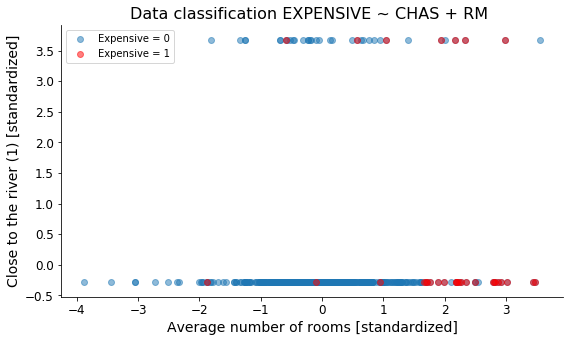

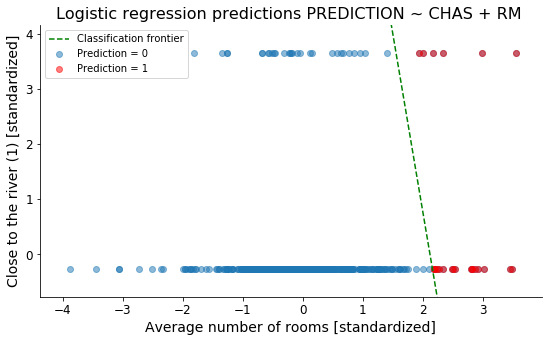

In [260]:
# Plot (Original data)
# Figure number
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.xlabel("Average number of rooms [standardized]")
plt.ylabel("Close to the river (1) [standardized]")
plt.title("Data classification EXPENSIVE ~ CHAS + RM ")

# Create the plot
plt.scatter(xaxisint["RM"], xaxisint["CHAS"], alpha = 0.5, 
            label = "Expensive = 0")

PrExpensive = ProbsDF[ProbsDF["EXPENSIVE"]==1] 
plt.scatter(PrExpensive["RM"], PrExpensive["CHAS"], 
            color='r', alpha = 0.5, label = "Expensive = 1")

# Add legend
plt.legend()


# Plot 2: Prediction
# Figure number
plt.figure(2)

# Figure size
plt.figure(figsize = (9, 5))

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.xlabel("Average number of rooms [standardized]")
plt.ylabel("Close to the river (1) [standardized]")
plt.title("Logistic regression predictions PREDICTION ~ CHAS + RM ")

# Create the plot
plt.scatter(xaxisint["RM"], xaxisint["CHAS"], alpha = 0.5, 
            label = "Prediction = 0")

PrPRED = ProbsDF[ProbsDF["PRED"]==1] 
plt.scatter(PrPRED["RM"], PrPRED["CHAS"], 
            color='r', alpha = 0.5, label = "Prediction = 1")

# Frontier
X = np.array([-4, 2.5])
plt.plot(X, (- Betas[0] - Betas[1] * X) / Betas[2], '--', color = "g", 
         label = "Classification frontier")
plt.ylim(np.min(PrPRED["CHAS"]) - 0.5, np.max(PrPRED["CHAS"]) + 0.5)

# Add legend
plt.legend()

In [266]:
# k-Fold CV Logistic regression
np.random.seed(1)

# Data for Logistic regression
X = bostonCSTD[["RM", "CHAS"]]
y = Y_Expensive

# Model parameters
R = 0.001
iters = 100000
epsilon = 1e-10

# k-fold CV
k = 25

# Intercept and feature coefficients
Results = [0 for i in range(0, k)]

# Accuracy 
Accuracy = [0 for i in range(0, k)]
BestAccuracy = 0
BestIter = 0

# Niters
niters = 0

# CV Iterator
kf = KFold(n_folds = 25, n = len(X), shuffle = True)

# Starting time
start = time.time()
   
# Generate the sets
for train_index, test_index in kf:
    # Iteration number
    print("------------------------- CV Iteration", niters + 1, "-------------------------")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Calling the function
    Results[niters] = logistic_regression(X_train, y_train, iters, R, epsilon, True)
    print("Betas:", Results[niters])
    
    # Computing Accuracy: Final results matrix
    FinalMatrix = pd.DataFrame()
    
    # Add columns from X (current features) and intercept
    FinalMatrix[X_test.columns] = X_test
    FinalMatrix["INT"] = np.ones(len(X_test))
    FinalMatrix = FinalMatrix[["INT", "RM", "CHAS"]]
        
    # Compute the estimated values (y_hat)
    exponent = np.dot(FinalMatrix, Results[niters])
    y_hat = np.round(Logistic_function(exponent))
       
    # Accuracy value
    Accuracy[niters] = (y_hat == y_test).sum().astype(float) / len(y_hat)
    print("Accuracy: {0}".format(Accuracy[niters]))
    
    # Best Accuracy
    if Accuracy[niters] > BestAccuracy:
        BestAccuracy = Accuracy[niters]
        BestIter = niters

    # Next iteration
    niters += 1

# Summary results
print("\n\nSummary")
print("Average Accuracy:", np.mean(Accuracy))
print("Best Accuracy:", BestAccuracy, "on iteration", BestIter + 1)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[BestIter][0])
print("RM:              ", Results[BestIter][1])
print("CRIM:            ", Results[BestIter][2])
print("---------------------------------------")
print("Time taken: " + str(round(time.time() - start,2)) + " seconds")

------------------------- CV Iteration 1 -------------------------
Convergence reached (Cost function), break
Time taken: 1.23 seconds
Total number of iterations: 2677
Betas: [-4.52145248  2.13093372  0.32941964]
Accuracy: 1.0
------------------------- CV Iteration 2 -------------------------
Convergence reached (Cost function), break
Time taken: 1.51 seconds
Total number of iterations: 2667
Betas: [-4.54029754  2.08899635  0.34628169]
Accuracy: 0.9523809523809523
------------------------- CV Iteration 3 -------------------------
Convergence reached (Cost function), break
Time taken: 1.64 seconds
Total number of iterations: 2636
Betas: [-4.49401559  2.09662448  0.30408161]
Accuracy: 1.0
------------------------- CV Iteration 4 -------------------------
Convergence reached (Cost function), break
Time taken: 1.27 seconds
Total number of iterations: 2717
Betas: [-4.54531795  2.13548206  0.23636344]
Accuracy: 0.9523809523809523
------------------------- CV Iteration 5 ---------------------

## Observations
Based on the logistic regression performed with the variables $RM$ and $CHAS$ (standardized) for predicting the value of the boolean variable (target/label = $EXPENSIVE$) we obtain the following results:

### Model 1: Entire Dataset as Training set 
- $Accuracy = 0.9683$
- Total running time = $2.08$ seconds
- Total number of iterations = $2675$
- Coefficients
    - $ Intercept = -4.580$
    - $ \hat{\beta_{RM}} = 2.162$ 
    - $ \hat{\beta_{CHAS}} = 0.334$

### Model 2: 25-fold CV
- $ AVG\_Accuracy = 0.9682$
- Best Accuracy = $1.0$
- Total running time = $40$ seconds
- Best Coefficients:
    - $Intercept = -4.521$
    - $RM = 2.130$
    - $CRIM = 0.329$
    
Looking at the results obtained by both approaches, we can see that the accuracy is very similar around $97%$ and the estimated coefficients are almost identical. Hence, we can conclude that the predictive model using a logistic regression approach for the variable $EXPENSIVE$ (1 if $MEDV > 40$) with the features $CHAS$ and $RM$ performs very well in terms of accuracy of the prediction and solving times are very reasonable, also for when performing a k-fold Cross-validation with $k = 25$.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [269]:
# Interaction variables
# Drop target MEDV and extra RM2 created
bostonM = boston.drop(['MEDV', 'RM2'], axis=1)

# Features
Features = bostonM.columns
FeaturesAux = bostonM.columns

# Create all interactions (104 variables in total)
for i in range(0,len(Features)):
    for j in range(0,len(FeaturesAux)):
        if j >= i:
            F1 = Features[i]
            F2 = Features[j]
            bostonM[F1 + "x" + F2] = boston[F1].multiply(boston[F2], axis="index")
        
# Check new DataFrame    
print("Dataset with interactions")
display(bostonM.head())
display(bostonM.shape)

# Standardization
bostonM = standardize(bostonM)

# Concatenate with MEDV (for sorting)
bostonM = pd.concat([bostonM, boston["MEDV"]], axis = 1)


# Training and testing sets
print("\nTraining and testing sets")
# 66% of the data goes to the training dataset
bMdata_train = bostonM.sample(frac = 0.66, random_state = np.random.seed(1))
bMdata_train.sort_index(inplace = True)
rtr, ctr = bMdata_train.shape
print("Total number of observations (training set):", rtr)

# Remaining 34% of the data goes to the testing dataset
bMdata_test = bostonM.loc[~bostonM.index.isin(bMdata_train.index)]
bMdata_test.sort_index(inplace = True)
rtest, ctest = bMdata_test.shape
print("Total number of observations (testing set):", rtest)

# Display both sets (head)
display(bMdata_train.head())
display(bMdata_test.head())

# Separated elements: features and target values
X_test = bMdata_test.drop("MEDV", axis = 1)
X_train = bMdata_train.drop("MEDV", axis = 1)
y_test = bMdata_test["MEDV"]
y_train = bMdata_train["MEDV"]

Dataset with interactions


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


(506, 104)


Training and testing sets
Total number of observations (training set): 334
Total number of observations (testing set): 172


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT,MEDV
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,...,-0.851123,-0.330577,-0.855594,-1.458429,-0.258778,-1.119678,0.526328,-0.880250,-0.789529,24.0
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,...,-0.952349,-0.785539,-0.912863,0.057783,0.476326,-0.958505,0.526328,-0.827045,-0.774228,36.2
5,-0.414974,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,...,-0.952349,-0.795100,-0.918109,0.057783,0.448007,-0.973911,0.473706,-0.850834,-0.779591,28.7
6,-0.408169,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,...,-0.797909,-0.244617,-0.384620,-1.498432,-0.291163,-0.345689,0.501674,0.246076,-0.239535,22.9
8,-0.393853,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,...,-0.797909,-0.287830,0.687139,-1.498432,-0.365435,1.480436,0.333771,2.794807,2.903851,16.5


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT,MEDV
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,...,-0.910453,-0.662577,-0.710303,-0.373078,0.281739,-0.525858,0.526328,-0.247866,-0.540454,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,...,-0.910453,-0.677834,-0.953823,-0.373078,0.242275,-1.150296,0.449414,-1.030947,-0.825825,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,...,-0.952349,-0.793346,-1.017347,0.057783,0.453202,-1.265329,0.483332,-1.192918,-0.858040,33.4
7,-0.401618,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,...,-0.797909,-0.238354,0.026935,-1.498432,-0.280399,0.355543,0.526328,1.273809,0.660346,27.1
10,-0.392264,0.048772,-0.476654,-0.272599,-0.265154,0.131589,0.914799,1.212979,-0.523001,-0.577519,...,-0.797909,-0.259455,0.106551,-1.498432,-0.316665,0.491198,0.443588,1.437123,0.878641,15.0


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [286]:
# Model 1/Algorithm 1: 5 features (at random)
Xtrain = X_train.sample(frac = 0.05, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
print("\nAlgorithm 1")
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 1")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 1/Algorithm 2: 5 features (at random)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 100000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
Model1 = smf.ols(formula = 'MEDV ~ TAXxB + ZNxPTRATIO + \
                 AGExB + NOXxNOX + INDUSxINDUS', 
                 data = bMdata_train).fit()

# Summary display
print(Model1.summary())

# Results from statsmodels
'''
Intercept      22.5229      
TAXxB          -0.6688      
ZNxPTRATIO      1.7067      
AGExB           1.5295      
NOXxNOX        -2.1285      
INDUSxINDUS    -1.9237
'''

Dataframe dimensions: (334, 5)

Algorithm 1
Convergence threshold (Cost function) reached, break
Time taken: 6.17 seconds
Total number of iterations: 2650

Summary: Algorithm 1
RMSE training: 7.86155541632
RMSE testing: 8.30366707056
---------- Best Coefficients ----------
Intercept value: 22.5229183065
TAXxB: -0.668602564724
ZNxPTRATIO: 1.70654818424
AGExB: 1.52939113896
NOXxNOX: -2.12864067415
INDUSxINDUS: -1.92367234008
---------------------------------------


 Algorithm 2
Time taken: 1.33 seconds
Total number of iterations: 2648

Summary: Algorithm 2
RMSE training: 7.86155541633
RMSE testing: 8.30366708795
---------- Best Coefficients ----------
Intercept value: 22.5229182647
TAXxB: -0.668602042336
ZNxPTRATIO: 1.70654775372
AGExB: 1.52939059091
NOXxNOX: -2.12864113013
INDUSxINDUS: -1.92367219417
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                   

'\nIntercept      22.5229      \nTAXxB          -0.6688      \nZNxPTRATIO      1.7067      \nAGExB           1.5295      \nNOXxNOX        -2.1285      \nINDUSxINDUS    -1.9237\n'

In [288]:
# Model 2/Algorithm 1: 10 features (at random)
Xtrain = X_train.sample(frac = 0.1, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
print("\nAlgorithm 1")
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 1")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 2/Algorithm 2: 10 features (at random)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 100000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
Model2 = smf.ols(formula = "MEDV ~ TAXxB + ZNxPTRATIO + AGExB + NOXxNOX + \
                 INDUSxINDUS + INDUSxCHAS + CHASxDIS + DISxTAX + ZNxAGE + \
                 CHASxPTRATIO", data=bMdata_train).fit()

# Summary display
print(Model2.summary())

# Results from statsmodels
'''
Intercept       22.4613      
TAXxB            1.9450      
ZNxPTRATIO       0.5326      
AGExB           -1.4638      
NOXxNOX         -3.6032      
INDUSxINDUS     -2.0173      
INDUSxCHAS       3.3567      
CHASxDIS         0.1928      
DISxTAX         -4.1167      
ZNxAGE           2.3001      
CHASxPTRATIO    -1.2700      
'''

Dataframe dimensions: (334, 10)

Algorithm 1
Convergence threshold (Cost function) reached, break
Time taken: 126.59 seconds
Total number of iterations: 33356

Summary: Algorithm 1
RMSE training: 6.90951549808
RMSE testing: 7.85511434205
---------- Best Coefficients ----------
Intercept value: 22.4612613647
TAXxB: 1.94486602079
ZNxPTRATIO: 0.532719507343
AGExB: -1.46371585045
NOXxNOX: -3.60314519165
INDUSxINDUS: -2.01721239944
INDUSxCHAS: 3.35444784895
CHASxDIS: 0.190431715063
DISxTAX: -4.1166349277
ZNxAGE: 2.30003670102
CHASxPTRATIO: -1.26577292409
---------------------------------------


 Algorithm 2
Time taken: 18.89 seconds
Total number of iterations: 33354

Summary: Algorithm 2
RMSE training: 6.9095154981
RMSE testing: 7.85511433354
---------- Best Coefficients ----------
Intercept value: 22.4612613654
TAXxB: 1.94486598928
ZNxPTRATIO: 0.532719532985
AGExB: -1.46371583028
NOXxNOX: -3.60314518851
INDUSxINDUS: -2.01721238069
INDUSxCHAS: 3.35444743569
CHASxDIS: 0.190431269192
DISxTAX

'\nIntercept       22.4613      \nTAXxB            1.9450      \nZNxPTRATIO       0.5326      \nAGExB           -1.4638      \nNOXxNOX         -3.6032      \nINDUSxINDUS     -2.0173      \nINDUSxCHAS       3.3567      \nCHASxDIS         0.1928      \nDISxTAX         -4.1167      \nZNxAGE           2.3001      \nCHASxPTRATIO    -1.2700      \n'

In [289]:
# Model 3/Algorithm 1: 13 features (original)
Xtrain = X_train[bdata.feature_names]
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
print("\nAlgorithm 1")
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 1")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 2/Algorithm 2: 13 features (original)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 100000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
Model3 = smf.ols(formula = "MEDV ~ RM + TAX + B + ZN + PTRATIO + AGE + NOX + \
                 INDUS + CHAS + DIS + CRIM + RAD + LSTAT", data=bMdata_train).fit()

# Summary display
print(Model3.summary())

# Results from statsmodels
'''
Intercept     22.3116      
RM             3.0651      
TAX           -2.1445      
B              0.9558      
ZN             0.8129      
PTRATIO       -2.1469      
AGE           -0.4278      
NOX           -2.1357      
INDUS          0.0269      
CHAS           0.7784      
DIS           -3.2962      
CRIM          -0.9666      
RAD            2.5091      
LSTAT         -3.0937      
'''

Dataframe dimensions: (334, 13)

Algorithm 1
Convergence threshold (Cost function) reached, break
Time taken: 53.03 seconds
Total number of iterations: 11870

Summary: Algorithm 1
RMSE training: 4.36906603271
RMSE testing: 5.32176926375
---------- Best Coefficients ----------
Intercept value: 22.3116306988
CRIM: -0.966509907111
ZN: 0.812798750298
INDUS: 0.026555295724
CHAS: 0.778503802542
NOX: -2.1356408655
RM: 3.06518114967
AGE: -0.427871849557
DIS: -3.29632920643
RAD: 2.50805167289
TAX: -2.14335794861
PTRATIO: -2.14687079709
B: 0.955826983841
LSTAT: -3.09364496262
---------------------------------------


 Algorithm 2
Time taken: 8.3 seconds
Total number of iterations: 11868

Summary: Algorithm 2
RMSE training: 4.36906603273
RMSE testing: 5.32176926957
---------- Best Coefficients ----------
Intercept value: 22.3116306923
CRIM: -0.966509869809
ZN: 0.812798701712
INDUS: 0.0265550851807
CHAS: 0.778503837519
NOX: -2.1356408464
RM: 3.0651811986
AGE: -0.427871901951
DIS: -3.29632925954
RA

'\nIntercept     22.3116      \nRM             3.0651      \nTAX           -2.1445      \nB              0.9558      \nZN             0.8129      \nPTRATIO       -2.1469      \nAGE           -0.4278      \nNOX           -2.1357      \nINDUS          0.0269      \nCHAS           0.7784      \nDIS           -3.2962      \nCRIM          -0.9666      \nRAD            2.5091      \nLSTAT         -3.0937      \n'

In [290]:
# Model 4/Algorithm 1: 20 features (at random)
Xtrain = X_train.sample(frac = 0.19, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
print("\nAlgorithm 1")
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 1")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 4/Algorithm 2: 20 features (at random)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 100000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
# Linear regression model
lmRM4 = LinearRegression()

# Fit the model
lmRM4.fit(Xtrain, y_train)

# Print results
print("Number of coefficients:", len(lmRM4.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM4.intercept_)
aux = 0
for i in Xtrain.columns:
    print(i, ":           ", lmRM4.coef_[aux])
    aux += 1
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((y_train - lmRM4.predict(Xtrain)) ** 2)))
print("R-Squared:" , lmRM4.score(Xtrain, y_train))

Dataframe dimensions: (334, 20)

Algorithm 1
Convergence threshold (Cost function) reached, break
Time taken: 294.12 seconds
Total number of iterations: 53489

Summary: Algorithm 1
RMSE training: 4.99820992488
RMSE testing: 5.59103996085
---------- Best Coefficients ----------
Intercept value: 22.4395948412
TAXxB: -1.39131136958
ZNxPTRATIO: 0.452236369864
AGExB: 2.37246287212
NOXxNOX: -2.81350562922
INDUSxINDUS: 2.70416466644
INDUSxCHAS: 0.575859874019
CHASxDIS: -1.38468272812
DISxTAX: -1.38900714652
ZNxAGE: 0.601998107114
CHASxPTRATIO: 3.73755949025
PTRATIOxPTRATIO: -1.828999122
INDUSxPTRATIO: -4.34514910796
RADxPTRATIO: 3.09179004135
CHASxLSTAT: -2.23639159752
ZNxRAD: -0.298511930913
DISxLSTAT: -2.66718812207
LSTATxLSTAT: -1.17963176852
AGExPTRATIO: -2.35392005706
CRIMxNOX: -1.38792058282
BxB: 0.208931899247
---------------------------------------


 Algorithm 2
Time taken: 30.71 seconds
Total number of iterations: 53487

Summary: Algorithm 2
RMSE training: 4.9982099249
RMSE testing:

In [291]:
# Model 5: 30 features (at random)
Xtrain = X_train.sample(frac = 0.29, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 5/Algorithm 2: 30 features (at random)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 100000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
# Linear regression model
lmRM4 = LinearRegression()

# Fit the model
lmRM4.fit(Xtrain, y_train)

# Print results
print("Number of coefficients:", len(lmRM4.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM4.intercept_)
aux = 0
for i in Xtrain.columns:
    print(i, ":           ", lmRM4.coef_[aux])
    aux += 1
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((y_train - lmRM4.predict(Xtrain)) ** 2)))
print("R-Squared:" , lmRM4.score(Xtrain, y_train))

Dataframe dimensions: (334, 30)
Max number of iterations reached, break
Time taken: 789.47 seconds
Total number of iterations: 100000

Summary
RMSE training: 4.28759280162
RMSE testing: 4.86389184882
---------- Best Coefficients ----------
Intercept value: 22.3927027721
TAXxB: -0.1045032748
ZNxPTRATIO: -2.54599789209
AGExB: -0.211739946056
NOXxNOX: 4.48256161607
INDUSxINDUS: 5.6675743867
INDUSxCHAS: 0.464982849214
CHASxDIS: -0.215212105173
DISxTAX: -2.58881951434
ZNxAGE: -0.170253596759
CHASxPTRATIO: 0.777304127509
PTRATIOxPTRATIO: -3.3529377232
INDUSxPTRATIO: 1.03427072527
RADxPTRATIO: 11.3016582924
CHASxLSTAT: -0.368158306199
ZNxRAD: -1.28043372743
DISxLSTAT: -1.88079710262
LSTATxLSTAT: 9.90600611924
AGExPTRATIO: 1.22146510646
CRIMxNOX: -1.13694069495
BxB: -0.243054013927
NOXxLSTAT: -11.3542186549
AGExLSTAT: -3.78527016482
NOXxB: 0.834760669777
INDUSxRAD: -9.38173853543
INDUSxAGE: 1.71681092981
INDUSxNOX: -8.24215302221
DISxDIS: 0.0919295976184
DISxPTRATIO: 1.79579373694
INDUSxLSTAT:

In [294]:
# Model 6: 40 features (at random)
Xtrain = X_train.sample(frac = 0.38, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 1000000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 6/Algorithm 2: 40 features (at random)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 1000000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
# Linear regression model
lmRM4 = LinearRegression()

# Fit the model
lmRM4.fit(Xtrain, y_train)

# Print results
print("Number of coefficients:", len(lmRM4.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM4.intercept_)
aux = 0
for i in Xtrain.columns:
    print(i, ":           ", lmRM4.coef_[aux])
    aux += 1
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((y_train - lmRM4.predict(Xtrain)) ** 2)))
print("R-Squared:" , lmRM4.score(Xtrain, y_train))

Dataframe dimensions: (334, 40)
Convergence threshold (Cost function) reached, break
Time taken: 8062.96 seconds
Total number of iterations: 967726

Summary
RMSE training: 3.55505711085
RMSE testing: 4.23885089704
---------- Best Coefficients ----------
Intercept value: 22.3749361599
TAXxB: -0.914887160441
ZNxPTRATIO: 1.31529556279
AGExB: -0.967546899168
NOXxNOX: 8.05098404152
INDUSxINDUS: 5.76847343019
INDUSxCHAS: -0.304383855732
CHASxDIS: -1.07601471998
DISxTAX: -1.47409239615
ZNxAGE: -0.00268318192439
CHASxPTRATIO: 1.84681002406
PTRATIOxPTRATIO: 8.5390483182
INDUSxPTRATIO: -6.59369932265
RADxPTRATIO: 12.7691561985
CHASxLSTAT: -0.0548405258949
ZNxRAD: -1.54218080092
DISxLSTAT: -0.157677333168
LSTATxLSTAT: 7.05033557569
AGExPTRATIO: 8.6095727571
CRIMxNOX: -2.89717660268
BxB: -1.6515361874
NOXxLSTAT: -5.19866116725
AGExLSTAT: -4.74165352002
NOXxB: -2.82629657075
INDUSxRAD: -8.69595391885
INDUSxAGE: 4.0968973635
INDUSxNOX: -14.7964715179
DISxDIS: 1.42562666752
DISxPTRATIO: 2.4174529742


In [295]:
# Model 7: 50 features (at random)
Xtrain = X_train.sample(frac = 0.48, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

# Call the function
R = 0.01
Threshold = 1e-10
Results = multivariate_ols(Xtrain, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test[Feat]).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


# Model 7/Algorithm 2: 50 features (at random)
print("\n\n Algorithm 2")
R = 0.01
Threshold = 1e-10
Results = multivariate_olsVersion2(Xtrain, y_train, 100000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(Xtrain, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test[Feat], Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
# Linear regression model
lmRM4 = LinearRegression()

# Fit the model
lmRM4.fit(Xtrain, y_train)

# Print results
print("Number of coefficients:", len(lmRM4.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM4.intercept_)
aux = 0
for i in Xtrain.columns:
    print(i, ":           ", lmRM4.coef_[aux])
    aux += 1
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((y_train - lmRM4.predict(Xtrain)) ** 2)))
print("R-Squared:" , lmRM4.score(Xtrain, y_train))

Dataframe dimensions: (334, 50)
Max number of iterations reached, break
Time taken: 951.44 seconds
Total number of iterations: 100000

Summary
RMSE training: 3.47698841443
RMSE testing: 4.25103001766
---------- Best Coefficients ----------
Intercept value: 22.3538708954
TAXxB: -1.42199620778
ZNxPTRATIO: -0.229969595034
AGExB: -2.67361495566
NOXxNOX: 5.40927258064
INDUSxINDUS: 4.040296946
INDUSxCHAS: -0.807305055748
CHASxDIS: -2.39480584515
DISxTAX: -0.837418164481
ZNxAGE: -0.836812345434
CHASxPTRATIO: 3.94345554338
PTRATIOxPTRATIO: 5.23731738068
INDUSxPTRATIO: -0.0574540130162
RADxPTRATIO: 10.7269298839
CHASxLSTAT: -0.323810765063
ZNxRAD: -1.00066233987
DISxLSTAT: -0.633159600273
LSTATxLSTAT: 7.1627350119
AGExPTRATIO: 4.83864327366
CRIMxNOX: -3.33343120999
BxB: -0.720825293966
NOXxLSTAT: -6.04062600178
AGExLSTAT: -3.62649563441
NOXxB: -0.883911204609
INDUSxRAD: -2.86393412693
INDUSxAGE: 3.86176558732
INDUSxNOX: -8.76690194097
DISxDIS: 3.69671149038
DISxPTRATIO: 3.8368490036
INDUSxLSTAT

In [296]:
# Model 8: 104 features (all)
# Call the function
R = 0.001
Threshold = 1e-10
Results = multivariate_ols(X_train, y_train, R, 100000, Threshold, False)

# RMSE training
y_hat_train = Results[0] + np.multiply(Results[1], X_train).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = Results[0] + np.multiply(Results[1], X_test).sum(axis = 1) 
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Features names
Feat = X_train.columns

# Summary results
print("\nSummary")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[1][i])
print("---------------------------------------")


Max number of iterations reached, break
Time taken: 1898.57 seconds
Total number of iterations: 100000

Summary
RMSE training: 2.47249609827
RMSE testing: 4.38572286703
---------- Best Coefficients ----------
Intercept value: 22.412223641
CRIM: 0.209158187375
ZN: -0.825919794296
INDUS: 1.2983841898
CHAS: 0.982992731515
NOX: 1.08127145604
RM: 2.10086515225
AGE: 1.05119880865
DIS: -2.39633947106
RAD: 2.38177814401
TAX: 1.05241728194
PTRATIO: 0.354910888934
B: 0.522948503675
LSTAT: 1.11690971744
CRIMxCRIM: 1.26205633947
CRIMxZN: 0.558909852132
CRIMxINDUS: 0.237350241371
CRIMxCHAS: 5.40667084313
CRIMxNOX: -0.852754476041
CRIMxRM: -1.39005484305
CRIMxAGE: 0.157786956798
CRIMxDIS: -1.4527074747
CRIMxRAD: 0.0928852387902
CRIMxTAX: 0.171493291242
CRIMxPTRATIO: 0.204863614063
CRIMxB: -0.765434990323
CRIMxLSTAT: 0.829943756403
ZNxZN: 0.277488008925
ZNxINDUS: -0.260114414517
ZNxCHAS: -0.387741179728
ZNxNOX: 0.237202648456
ZNxRM: 0.659108689543
ZNxAGE: -0.0583903527354
ZNxDIS: 0.771213699569
ZNxRA

ValueError: shapes (172,105) and (51,) not aligned: 105 (dim 1) != 51 (dim 0)

In [299]:
# Model 8/Algorithm 2: 104 features (all)
print("\n\n Algorithm 2")
R = 1e-2
Threshold = 1e-10
Results = multivariate_olsVersion2(X_train, y_train, 1000000, R, Threshold, True)

# RMSE training
y_hat_train = yhat_lreg(X_train, Results, True)
RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

# RMSE testing
y_hat_test = yhat_lreg(X_test, Results, True)
RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

# Summary results
print("\nSummary: Algorithm 2")
print("RMSE training:", RMSE_train)
print("RMSE testing:", RMSE_test)
print("---------- Best Coefficients ----------")
print("Intercept value:", Results[0])
for i in range(0, len(Feat)):
    print(Feat[i] + ":", Results[i + 1])
print("---------------------------------------")


# Checking results
# Linear regression model
lmRM4 = LinearRegression()

# Fit the model
lmRM4.fit(X_train, y_train)

# Print results
print("Number of coefficients:", len(lmRM4.coef_))
print("-------------------- Coefficients --------------------")
print("Intercept value:", lmRM4.intercept_)
aux = 0
for i in X_train.columns:
    print(i, ":           ", lmRM4.coef_[aux])
    aux += 1
print("------------------------------------------------------")
print("RMSE:", np.sqrt(np.mean((y_train - lmRM4.predict(X_train)) ** 2)))
print("R-Squared:" , lmRM4.score(X_train, y_train))



 Algorithm 2
Time taken: 526.88 seconds
Total number of iterations: 999999

Summary: Algorithm 2
RMSE training: 2.03045873922
RMSE testing: 4.25076735076
---------- Best Coefficients ----------
Intercept value: 22.4471757795
CRIM: -4.23477163183
ZN: -2.44096274451
INDUS: -13.2421035834
CHAS: 6.72492168048
NOX: 2.68425831049
RM: 5.91678380427
AGE: 14.4573408531
DIS: -10.3653111293
RAD: 7.71972300456
TAX: 1.296131901
PTRATIO: 5.4645130256
B: 13.0552147361
LSTAT: 15.0867098699
CRIMxCRIM: 0.065993452506
CRIMxZN: 0.613718370456
CRIMxINDUS: -3.4333323632
CRIMxCHAS: 4.77654218232
CRIMxNOX: -10.1930307654
CRIMxRM: 8.07266727249
CRIMxAGE: -2.29347135482
CRIMxDIS: -0.895463682999
CRIMxRAD: 5.13936740118
CRIMxTAX: 2.27177556481
CRIMxPTRATIO: 1.84334076167
CRIMxB: -1.2441824882
CRIMxLSTAT: 3.82051636732
ZNxZN: -0.186460245428
ZNxINDUS: -0.361251733607
ZNxCHAS: -0.0907398294035
ZNxNOX: -1.11858578908
ZNxRM: 2.82955347879
ZNxAGE: -0.338741683619
ZNxDIS: -0.58033913833
ZNxRAD: -1.02943516294
ZNxTAX

## Observations
### Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

From the previous results, we can obtain the following summary table:

|   # Features  | Total Time Alg1 [s] | Total Time Alg2 [s]  |     Iterations    |     R     |  RMSE train |  RMSE test  |
|:-------------:|:-------------------:|:--------------------:|:-----------------:|:---------:|:-----------:|:-----------:|
|            5  |                6.17 |                 1.33 |              2650 |      0.01 |       7.861 |       8.303 |
|           10  |              126.59 |                18.89 |             33356 |      0.01 |       6.909 |       7.855 |
| 13 (original) |               53.05 |                  8.3 |             11870 |      0.01 |       4.369 |       5.321 |
|            20 |              294.12 |                30.71 |             53489 |      0.01 |       4.998 |       5.591 |
|            30 |              789.47 |                69.16 |           100000* |      0.01 |       4.287 |       4.863 |
|            40 |             8062.96 |               472.19 |          967722** |      0.01 |       3.555 |       4.238 |
|            50 |              951.44 |                47.81 |           100000* |      0.01 |       3.476 |       4.251 |
|           104 |             1898.57 |               526.88 | 100000*/1000000** | 0.01/0.01 | 2.472/2.030 | 4.385/4.250 |

*Note: Maximum number of iterations (1e5) reached

**Note: Maximum number of iterations (1e6) reached

Looking at the table, we can easily see how both the $RMSE_{train}$ and $RMSE_{test}$ values are decreasing when more features are added to the model. This is an expected pattern since we know that the addition of extra variables will increase the amount of information available to the model and therefore, it will tend to have a better predictive performance, however, there exists a subjacent trade-off between the number of features (complexity of the model), accuracy, and running time of the algorithm as we can see when looking at the total running times for both algorithms.

In order to obtain better convergence results and show how different results can be obtained using the same algorithm with different configurations, we increase the maximum number of iteration from 1e5 to 1e6 in the 40 features and 104 features instances. In the same logic, since the running time performance of the second algorithm is clearly better than the one obtained by the first implementation (check columns 2 and 3 of the previous table), we impose 1e5 as the maximum number of iterations for the first algorithm for the 104 features instance while we use 1e6 for the second algorithm.

Looking at the results, we can easily see that the global performance of the second algorithm is pretty good in terms of solving time and solution quality (very accurate). In order to check our results, we ran all the previous models using statistical packages like statsmodels and sci-kit learn (see previous code chunks).

Important is to note that some models with the same number of features but different mix of them may lead to very different performances in terms of $RMSE_{train}$ and $RMSE_{test}$ values because clearly, some features (and interactions) are more relevant for predicting the target value than others, as we saw in the last problem set when we implemented the forward-selection algorithm. Therefore, we can have situations where a model with 2 features can be better than a model with 5 features depending on the mix. However, in average the pattern will indicate that adding more features will increase the accuracy of the model.

In order to compare the current results with the ones obtained in previous sections and the previous problem set (NN implementation), we include (1) the values for the average RMSE computed for the testing sets and the best RMSE obtained during the 25-fold Cross-validation:
- $AVGRMSE_{testing} = 6.012$
- $BestRMSE_{testing} = 3.152$ 

and (2), from the previous problem set, we obtained the following values for the $RMSE_{test}$ (remember that $RMSE_{train} = 0$ in this algorithm) in our different Nearest Neighbor implementations:
- Basic Nearest Neighbor implementation: $7.706$
- Normalized data NN: $7.861$
- Best model Normalized data NN: $7.42$
- Average 10-fold CV RMSE: $7.48$
- 10-fold CV Normalized 3-Nearest Neighbor: $5.67$
- Best K-NN: $4.9$
- Forward selection + Optimal K: $3.32$

Based on all the previous results, we can see that the new 13 features implementation reaches a better performance in comparison to the one obtained by the 25-fold Cross-validation performed to the simple model with $RM$ and $CRIM$ as the main features. However, we need to remember that in the current case we are implementing a quick-and-dirty training and testing set distribution instead of a formal k-fold CV approach. When comparing the same model with the Nearest Neighbors implementation, we can easily see that it is also better than the 10-fold CV normalized 3-NN implementation ($RMSE_{test} = 5.67$ vs $RMSE_{test} = 5.321$ obtained with the 13 features model).

Looking at the best K-NN implementation and the forward selection approach, we can see that they are still better than the 13 features model. Looking at the rest of the models (with a different number of features), we can see that all the models with at least 30 features obtain better results than the best K-NN implementation ($RMSE_{train} = 4.9$). However, none of them is able to "defeat" the great performance obtained by the optimized forward selection + optimal K approach implemented in the previous problem set as a bonus question, model that reaches a great $RMSE_{test} = 3.32$.

Therefore, we can conclude that the current models obtain better results in terms of the $RMSE_{test}$ than the ones implemented in sections 2.3 and 4.2, the basic NN implementations, and the best K-NN implementation from the previous problem set, but the new models are not able to defeat the best-optimized implementations of the K-NN algorithm using the fast-forward algorithm for finding the optimal set of features. In addition, solving times involved in the new models are far longer than the ones needed to fit the NN models.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [348]:
"""
Function
--------
multivariate_reg
    Gradient Decent to minimize regularized regressions (like Ridge and Lasso). 
    Used to find co-efficients of multivariate Linear regression with regularization.

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable

Lambda: float
    Penalty factor for regularization

R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    Convergence threshold
    
verbose: boolean
    True if iteration info is printed

noOutput: boolean
    No info to the user

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_reg(xvalue_matrix, yvalues, Lambda, R=0.01, MaxIterations=1000, 
                     epsilon=1e-6, verbose=False, noOutput=False):
    
    # initialize the parameters
    start_time = time.time()

    # Initialization
    alpha = 0
    AlphasIter = [0 for i in range(0, MaxIterations + 1)]
    
    beta_array = [0 for i in xvalue_matrix.columns]
    BetasIter = [[0 for i in xvalue_matrix.columns] for i in range(0, MaxIterations + 1)]
   
    iters = 1
    N = xvalue_matrix.shape[0]
    ResultIter = [0 for i in range(0, MaxIterations + 1)]
    LossDerB = [[0 for i in xvalue_matrix.columns] for i in range(0, MaxIterations + 1)]
   
    # Gradient descent loop
    while True:
        if verbose == 1 and noOutput == False:
            print("--------------------- Iteration", iters, "---------------------")
    
        # Cost function
        CommonF = alpha + np.multiply(beta_array, xvalue_matrix).sum(axis = 1) - yvalues
        CostF = 0.5 * (np.mean(np.power(CommonF, 2)) + Lambda * np.sum(np.power(beta_array, 2)))
        ResultIter[iters] = CostF
        
        if verbose == True and noOutput == False:
            print("Current Cost:", CostF)
        
        # Check if current result is better than previous iteration
        if iters > 1 and ResultIter[iters - 1] < ResultIter[iters]:
            if noOutput == False:
                print("No improvement, break")
            break
                
        # Calculate partial derivatives
        # Alpha
        LossDerA = np.mean(CommonF)
        
        # Betas loop
        nfeat = 0
        for i in xvalue_matrix.columns:
            '''
            LossDerB[iters][nfeat] = np.mean(CommonF * xvalue_matrix[i]) + \
                                     (Lambda / N) * beta_array[nfeat]
            '''
            '''
            LossDerB[iters][nfeat] = np.mean(CommonF * xvalue_matrix[i]) + \
                                     2 * Lambda * beta_array[nfeat]
            '''
            LossDerB[iters][nfeat] = np.mean(CommonF * xvalue_matrix[i]) + \
                                     Lambda * beta_array[nfeat] / N
            
            nfeat += 1
        
        if verbose == True and noOutput == False:
            print("New LossDerA:", LossDerA)
            nfeat = 0
            for i in xvalue_matrix.columns:
                print("New LossDerB", i, ":", LossDerB[iters][nfeat])
                nfeat += 1
                
        # Update parameters
        # Alpha
        alpha -= R * LossDerA
        AlphasIter[iters] = alpha
        
        # Betas
        nfeat = 0
        for i in xvalue_matrix.columns:
            BetasIter[iters][nfeat] -= R * LossDerB[iters][nfeat]
            beta_array[nfeat] -= R * LossDerB[iters][nfeat]
            nfeat += 1
            
        # Iteration info
        if verbose == True and noOutput == False:
            print("New alpha:", alpha)
            nfeat = 0
            for i in xvalue_matrix.columns:
                print("New beta", i, ":", beta_array[nfeat])
                nfeat += 1

        # Check convergence (after first iteration)
        if np.abs(ResultIter[iters] - ResultIter[iters-1]) < epsilon and iters > 1:
            if noOutput == False:
                print("Convergence threshold (Cost function) reached, break")
            break
    
        # Check maximum number of iterations
        if iters + 1 > MaxIterations:
            if noOutput == False:
                print("Max number of iterations reached, break")
            break
        
        # Next iteration
        iters += 1
        if verbose == True:
            print("---------------------------------------------------------")
     
    if noOutput == False:
        print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
        print("Total number of iterations:", iters)
    return alpha, beta_array

In [323]:
# Testing the function with RM and CRIM
X = bostonM[["RM", "CRIM"]]

# Target
Y = Y_Medv

# Random seed
np.random.seed(1)

# Model parameters
R = 0.01
iters = 100000
epsilon = 1e-10
Lambda = 0

# Intercept = True
Betas = multivariate_reg(X, Y, Lambda, R, iters, epsilon)

# Betas
print("Betas:", Betas)

# RMSE 
# RMSE training (full data set)
y_hat_train = Betas[0] + np.multiply(Betas[1], X).sum(axis = 1) 
RMSE_train = np.sqrt(np.mean((y_hat_train - Y) ** 2))
print("RMSE train:", RMSE_train)

Convergence threshold (Cost function) reached, break
Time taken: 2.56 seconds
Total number of iterations: 1290
Betas: (22.53275357485764, [5.8943413085175198, -2.2486834407622958])
RMSE train: 6.22807325118


In [316]:
"""
Function
--------
RidgeRegression
    Gradient Decent to minimize regularized regressions (like Ridge and Lasso). 
    Used to find coefficients of multivariate Linear regression with regularization.
    Second version implementation

Parameters
----------
x, y : narray
    x: independent variables
    y: dependent variable

iters: int
    maximum number of iterations

R: float
    Learning rate
    
Lambda: float
    Penalty factor for regularization

epsilon: float
    Convergence threshold
 
Intercept: boolean
    True if intercept is added to the regression
    
verbose: boolean
    True if iteration info is printed

notpenalyIntercept: boolean
    No penalty for the intercept (for experimentation)

InitialGuess: float array
    Initial values for betas

Returns
-------
betas: array[float]
    coefficients
"""


# Gradient descent for Ridge second version algorithm
def RidgeRegression(x, y, iters, R, Lambda, epsilon = 1e-10, 
                    Intercept = False, verbose = False, notpenaltyIntercept = False,
                    InitialGuess = []):
    
    # Starting time
    start_time = time.time()
    
    # If intercept is needed, add it to the array
    if Intercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
        
    # Initialize betas, lambdas and cost function vectors    
    betas = np.zeros(x.shape[1])
    Lambdas = np.repeat(Lambda, x.shape[0])
    costF = np.zeros(iters)
    
    # If intercept is not penalized
    if notpenaltyIntercept:
        Lambdas[0] = 0.0
    
    # If initial guess for betas
    if len(InitialGuess) > 0:
        betas = InitialGuess
        if verbose == True:
            print("We are using initial values for GD")
            print("Initial betas:", betas)
    
    # Main loop
    for n in range(iters):
        # Make the predictions with current betas
        y_hat = yhat_lreg(x, betas)
      
        # Update weights with gradient
        error = y_hat - y 
   
        # Update Betas
        gradient = np.dot(x.T, error) + 2 * np.dot(x.T, Lambdas) / x.shape[0]
        betas -= R * gradient
       
        # Compute cost function
        costF[n] = CostFunction(x, y, betas, Lambda)
        
        # Print information if verbose = True        
        if verbose == True:
            print("----------------- Iteration", n + 1, "-----------------")
            print("Value Cost Function:", costF[n])
            print("Gradients:", gradient)
            print("Betas:", betas)
            
        # Check convergence
        if np.abs(costF[n] - costF[n - 1]) < epsilon and n > 0:
            if verbose == True:
                print("Convergence reached (Cost function), break")
            break
            
        # Check if no improvement
        if (costF[n] - costF[n - 1]) > 0 and n > 0:
            if verbose == True:
                print("No improvement, break")
            break
    
    # Finalization   
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print("Total number of iterations:", n)
    
    # Return betas array
    return betas

In [318]:
# Testing the function with RM and CRIM
X = bostonM[["RM", "CRIM"]]

# Target
Y = Y_Medv

np.random.seed(1)

R = 0.0001
iters = 100000
epsilon = 1e-10
Lambda = 0

# Intercept = True
Betas = RidgeRegression(X, Y, iters, R, Lambda, epsilon, True)

# Betas
print("Betas:", Betas)

# RMSE 
y_hat = yhat_lreg(X, Betas, True)
RMSE = np.sqrt(np.mean(np.power(Y - y_hat, 2)))
print("RMSE:", RMSE)

Time taken: 0.13 seconds
Total number of iterations: 269
Betas: [ 22.53278795   5.89438187  -2.24864369]
RMSE: 6.22807325043


In [319]:
"""
Function
--------
NormalRidge
    Ridge regression fit using the analytical solution known as the normal equations method
    Used for comparison purposes with our gradient descent implementation

Parameters
----------
x y : narray
     x: independent variables
     y: dependent variable
    
Lambda: float
    penalty term for regulariation
    
Intercept: boolean
    True if intertcept is added to the regression
    
verbose: boolean
    Print out iterations information
 
Returns
-------
betas: float array
    coefficients
"""


# Ridge regression using normal equations for checking purposes
def NormalRidge(x, y, Lambda, Intercept = False, verbose = False):
    # Starting time
    start_time = time.time()
    
    # If intercept is needed, add it to the array
    if Intercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
        
    # Normal equations
    C = np.dot(x.T, x) + Lambda * np.eye(x.shape[1])
    betas = np.dot(np.linalg.inv(C), (np.dot(x.T,y)))
    
    # Return betas
    return betas

# Testing normal Ridge
# Running the function with original features (with Lambda = 0)
X = bostonM[bdata.feature_names]

# Target
Y = bostonM["MEDV"]

betas = NormalRidge(X, Y, 0, True)
print("Betas from normal Ridge version:", betas)

Betas from normal Ridge version: [  2.25328063e+01  -9.20411128e-01   1.08098058e+00   1.42967124e-01
   6.82203460e-01  -2.06009246e+00   2.67064141e+00   2.11206306e-02
  -3.10444805e+00   2.65878654e+00  -2.07589814e+00  -2.06215593e+00
   8.56640436e-01  -3.74867982e+00]


In [347]:
"""
Function
--------
LambdaLoop
    Auxiliary function for perfoming a series of fits using different Lambdas (Ridge regressions)

Parameters
----------
Xtrain, y_train : narray
Xtest, y_test : narray
     Xs: independent variables (training and testing sets)
     ys: dependent variable (training and testing sets)
    
R: float
    Learning rate
    
Threshold: float
    Convergence threshold
    
ModelParams: array
    Relevant parameter for the regression algorithm
    
verbose: int
    Level of information printed to the console
    
alg: int
    number of algorithm to be used 1,2 or 3
    
output: boolean
    print-out all information per iteration
 
Returns
-------
void function (prints-out information)
"""

# Definition of Lambda Loop function for simplicity
def LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, 
               Threshold, verbose=2, alg=1, output=False):

    # Initialization
    BestRMSE = 9e10
    BestLambda = 0
    BestCoeff = None
    RMSEs = [0 for i in range(0, len(Lambdas))]
    niter = 0
    
    # Perform the loop for all Lambdas
    for i in Lambdas:
        if verbose >= 1:
            print("----------------- Lambda value", i, "------------------")

        # Fit the model
        # Algorithm 1
        if alg == 1:
            Results = multivariate_reg(Xtrain, y_train, i, R, 100000, Threshold, output)
            #print(Results)

            # RMSE training
            y_hat_train = Results[0] + np.multiply(Results[1], Xtrain).sum(axis = 1) 
            RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

            # RMSE testing
            y_hat_test = Results[0] + np.multiply(Results[1], Xtest).sum(axis = 1) 
            RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

        # Algorithm 2
        if alg == 2:
            Results = RidgeRegression(Xtrain, y_train, 1000000, R, i, Threshold, True)

            # RMSE training
            y_hat_train = yhat_lreg(Xtrain, Results, True)
            RMSE_train = np.sqrt(np.mean(np.power(y_train - y_hat_train, 2)))
            
            # RMSE test
            y_hat_test = yhat_lreg(Xtest, Results, True)
            RMSE_test = np.sqrt(np.mean(np.power(y_test - y_hat_test, 2)))
            
        # Normal equations    
        if alg == 3:
            Results = NormalRidge(Xtrain, y_train, i, True)
            
            # RMSE training
            y_hat_train = yhat_lreg(Xtrain, Results, True)
            RMSE_train = np.sqrt(np.mean(np.power(y_train - y_hat_train, 2)))
            
            # RMSE test
            y_hat_test = yhat_lreg(Xtest, Results, True)
            RMSE_test = np.sqrt(np.mean(np.power(y_test - y_hat_test, 2)))
           
        # Best values
        if RMSE_test < BestRMSE:
            BestRMSE = RMSE_test
            BestLambda = i
            BestCoeff = Results 

        # Save values
        RMSEs[niter] = [RMSE_train, RMSE_test]
        niter += 1
        
        # Summary results
        if verbose == 1 and alg == 1:
            print("\nSummary")
            print("RMSE training:", RMSE_train)
            print("RMSE testing:", RMSE_test)
            print("---------- Best Coefficients ----------")
            print("Intercept value:", Results[0])
            for i in range(0, len(Feat)):
                print(Feat[i] + ":", Results[1][i])
            print("---------------------------------------")

            print("-------------------------------------------------------")
    
        # Summary results
        if verbose == 1 and alg == 2:
            print("\nSummary")
            print("RMSE training:", RMSE_train)
            print("RMSE testing:", RMSE_test)
            print("---------- Best Coefficients ----------")
            print("Intercept value:", Results[0])
            for i in range(0, len(Feat)):
                print(Feat[i] + ":", Results[i + 1])
            print("---------------------------------------")

            print("-------------------------------------------------------")
        
    # Table summary (verbose = 2)
    if verbose >= 1:
        print('Ridge Regression')
        print('Lambda\t RMSE_train\t RMSE_test\t')
        for a in range(0, len(RMSEs)):
            print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(Lambdas[a], RMSEs[a][0], RMSEs[a][1]))            

    if alg == 1:
        # Global Best
        print("\n\nGlobal solution")
        print("Best RMSE (testing):", BestRMSE)
        print("Best Lambda:", BestLambda)
        print("---------- Best Coefficients ----------")
        print("Intercept value:", BestCoeff[0])
        for i in range(0, len(Feat)):
            print(Feat[i] + ":", BestCoeff[1][i])
        print("---------------------------------------")
        
    if alg >= 2:
        # Global Best
        print("\n\nGlobal solution")
        print("Best RMSE (testing):", BestRMSE)
        print("Best Lambda:", BestLambda)
        print("---------- Best Coefficients ----------")
        print("Intercept value:", BestCoeff[0])
        print("BestCOEF:", BestCoeff)
        for i in range(0, len(Feat)):
            print(Feat[i] + ":", BestCoeff[i + 1])
        print("---------------------------------------")


In [349]:
# Small test: features RM and CRIM (Ridge regression)
Xtrain = X_train[["CRIM", "RM"]]
print("Train set dimensions:", Xtrain.shape)
Feat = Xtrain.columns

Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-3

# Lambdas array
Lambdas = [0, 0.5, 1]

# Lambda Loop function
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, Threshold, 2, 1, False)

# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 3, False)

Train set dimensions: (334, 2)
Test set dimensions: (172, 2)

Algorithm 1
----------------- Lambda value 0 ------------------
Convergence threshold (Cost function) reached, break
Time taken: 2.59 seconds
Total number of iterations: 1238
----------------- Lambda value 0.5 ------------------
No improvement, break
Time taken: 1.39 seconds
Total number of iterations: 406
----------------- Lambda value 1 ------------------
No improvement, break
Time taken: 1.32 seconds
Total number of iterations: 308
Ridge Regression
Lambda	 RMSE_train	 RMSE_test	
0.000	 5.9875		 6.6919
0.500	 5.9990		 6.7398
1.000	 6.0717		 6.8631


Global solution
Best RMSE (testing): 6.69194563515
Best Lambda: 0
---------- Best Coefficients ----------
Intercept value: 22.2845033087
CRIM: -2.40960079933
RM: 5.96317633151
---------------------------------------


Algorithm 2
----------------- Lambda value 0 ------------------
Time taken: 0.02 seconds
Total number of iterations: 36
----------------- Lambda value 0.5 -------

In [355]:
# For comparison purposes, we run the model using 
# Original features with scikit learn Ridge regression
from sklearn.linear_model import Ridge

print('Ridge Regression using scikit package')
print('Lambda\t RMSE_train\t RMSE_test\t RMSE_10cv')
Lambdas = np.arange(0.0, 50, 1)
Xtrain = X_train[bdata.feature_names] 
Xtest = X_test[Xtrain.columns]

# Lambdas loop
for a in Lambdas:
    ridge = Ridge(fit_intercept = True, alpha=a)
    
    # Computing the RMSE on training data
    ridge.fit(Xtrain,y_train)
    p = ridge.predict(Xtrain)
    err = p - y_train
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error / len(p))
    
    # Computing the RMSE on test data
    p2 = ridge.predict(Xtest)
    err_test = p2 - y_test
    total_error_test = np.dot(err_test,err_test)
    rmse_test = np.sqrt(total_error_test / len(p2))
    
    # Computing RMSE using 10-fold cross validation
    kf = KFold(len(Xtrain), n_folds = 10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(Xtrain.iloc[train], y_train.iloc[train])
        p = ridge.predict(Xtrain.iloc[test])
        err = p - y_train.iloc[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err / len(Xtrain))
    
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_test, rmse_10cv))

Ridge Regression using scikit package
Lambda	 RMSE_train	 RMSE_test	 RMSE_10cv
0.000	 4.3691		 5.3218		 5.6720
1.000	 4.3693		 5.3216		 5.6525
2.000	 4.3700		 5.3218		 5.6347
3.000	 4.3711		 5.3223		 5.6184
4.000	 4.3725		 5.3231		 5.6035
5.000	 4.3741		 5.3240		 5.5897
6.000	 4.3759		 5.3252		 5.5768
7.000	 4.3780		 5.3265		 5.5649
8.000	 4.3801		 5.3279		 5.5538
9.000	 4.3825		 5.3295		 5.5434
10.000	 4.3849		 5.3312		 5.5337
11.000	 4.3874		 5.3329		 5.5246
12.000	 4.3900		 5.3348		 5.5161
13.000	 4.3927		 5.3367		 5.5080
14.000	 4.3955		 5.3387		 5.5005
15.000	 4.3983		 5.3407		 5.4933
16.000	 4.4012		 5.3428		 5.4866
17.000	 4.4041		 5.3449		 5.4803
18.000	 4.4070		 5.3471		 5.4743
19.000	 4.4100		 5.3493		 5.4687
20.000	 4.4130		 5.3515		 5.4634
21.000	 4.4160		 5.3538		 5.4584
22.000	 4.4191		 5.3561		 5.4536
23.000	 4.4221		 5.3584		 5.4491
24.000	 4.4252		 5.3607		 5.4449
25.000	 4.4283		 5.3631		 5.4409
26.000	 4.4314		 5.3655		 5.4371
27.000	 4.4346		 5.3679		 5.4336
28.000	

In [356]:
# For comparison purposes, we run the model using 
# all 104 features with scikit learn Ridge regression
from sklearn.linear_model import Ridge

print('Ridge Regression using scikit package')
print('Lambda\t RMSE_train\t RMSE_test\t RMSE_10cv')
Lambdas = np.arange(0.0, 50, 1)
Xtrain = X_train
Xtest = X_test

for a in Lambdas:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # Computing the RMSE on training data
    ridge.fit(Xtrain,y_train)
    p = ridge.predict(Xtrain)
    err = p - y_train
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error / len(p))
    
    # Computing the RMSE on test data
    p2 = ridge.predict(Xtest)
    err_test = p2 - y_test
    total_error_test = np.dot(err_test,err_test)
    rmse_test = np.sqrt(total_error_test / len(p2))
    
    # Computing RMSE using 10-fold cross validation
    kf = KFold(len(Xtrain), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(Xtrain.iloc[train], y_train.iloc[train])
        p = ridge.predict(Xtrain.iloc[test])
        err = p - y_train.iloc[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(Xtrain))
    
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_test, rmse_10cv))

Ridge Regression using scikit package
Lambda	 RMSE_train	 RMSE_test	 RMSE_10cv
0.000	 2.1963		 5.5686		 41768010095373.5391
1.000	 2.3339		 4.2770		 4.3580
2.000	 2.4523		 4.3113		 4.3442
3.000	 2.5370		 4.3325		 4.3847


c:\Python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7104006252962763e-35
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\Python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.731708567681391e-34
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\Python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.574637552568621e-34
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\Python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal 

4.000	 2.6050		 4.3492		 4.4303
5.000	 2.6630		 4.3641		 4.4730
6.000	 2.7140		 4.3784		 4.5116
7.000	 2.7600		 4.3924		 4.5461
8.000	 2.8021		 4.4062		 4.5771
9.000	 2.8410		 4.4198		 4.6051
10.000	 2.8772		 4.4332		 4.6304
11.000	 2.9110		 4.4464		 4.6535
12.000	 2.9428		 4.4593		 4.6747
13.000	 2.9728		 4.4720		 4.6942
14.000	 3.0012		 4.4844		 4.7122
15.000	 3.0281		 4.4964		 4.7288
16.000	 3.0537		 4.5081		 4.7443
17.000	 3.0781		 4.5195		 4.7588
18.000	 3.1013		 4.5306		 4.7723
19.000	 3.1235		 4.5414		 4.7850
20.000	 3.1447		 4.5518		 4.7969
21.000	 3.1651		 4.5619		 4.8081
22.000	 3.1846		 4.5718		 4.8187
23.000	 3.2034		 4.5813		 4.8286
24.000	 3.2214		 4.5906		 4.8381
25.000	 3.2388		 4.5996		 4.8471
26.000	 3.2555		 4.6083		 4.8556
27.000	 3.2716		 4.6168		 4.8636
28.000	 3.2872		 4.6251		 4.8713
29.000	 3.3022		 4.6331		 4.8787
30.000	 3.3168		 4.6409		 4.8857
31.000	 3.3309		 4.6484		 4.8924
32.000	 3.3445		 4.6558		 4.8988
33.000	 3.3577		 4.6630		 4.9049
34.000	 3.3705		

In [363]:
# Model 1 (for testing): 5 features (at random, wide range lambdas)
# Random seed and sets definition
np.random.seed(1)
Xtrain = X_train.sample(frac = 0.05, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns
Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-3

# Lambdas array
Lambdas = np.arange(0, 51, 1)

# Lambda Loop function
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, Threshold, 2, 1, False)

# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 3, False)

Dataframe dimensions: (334, 5)
Test set dimensions: (172, 5)

Algorithm 1
----------------- Lambda value 0 ------------------
Convergence threshold (Cost function) reached, break
Time taken: 6.4 seconds
Total number of iterations: 2650
----------------- Lambda value 1 ------------------
No improvement, break
Time taken: 1.7 seconds
Total number of iterations: 365
----------------- Lambda value 2 ------------------
No improvement, break
Time taken: 1.74 seconds
Total number of iterations: 315
----------------- Lambda value 3 ------------------
No improvement, break
Time taken: 1.78 seconds
Total number of iterations: 287
----------------- Lambda value 4 ------------------
No improvement, break
Time taken: 1.51 seconds
Total number of iterations: 268
----------------- Lambda value 5 ------------------
No improvement, break
Time taken: 1.16 seconds
Total number of iterations: 253
----------------- Lambda value 6 ------------------
No improvement, break
Time taken: 1.74 seconds
Total numbe

Time taken: 0.0 seconds
Total number of iterations: 6
----------------- Lambda value 23 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 24 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 25 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 26 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 27 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 28 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 29 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 30 ------------------
Time taken: 0.0 seconds
Total number of iterations: 5
----------------- Lambda value 31 ------------------
Time taken: 0.0 seconds
Total number 

In [364]:
# Model 1 (for testing): 5 features (at random, small lambdas)
# Random seed and sets definition
np.random.seed(1)
Xtrain = X_train.sample(frac = 0.05, random_state = np.random.seed(1), axis=1)
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns
Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-3

# Lambdas array
Lambdas = np.arange(0, 1.01, 0.01)

# Lambda Loop function
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, Threshold, 2, 1, False)

# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 3, False)

Dataframe dimensions: (334, 5)
Test set dimensions: (172, 5)

Algorithm 1
----------------- Lambda value 0.0 ------------------
Convergence threshold (Cost function) reached, break
Time taken: 6.83 seconds
Total number of iterations: 2650
----------------- Lambda value 0.01 ------------------
No improvement, break
Time taken: 3.54 seconds
Total number of iterations: 1187
----------------- Lambda value 0.02 ------------------
No improvement, break
Time taken: 3.07 seconds
Total number of iterations: 983
----------------- Lambda value 0.03 ------------------
No improvement, break
Time taken: 2.98 seconds
Total number of iterations: 865
----------------- Lambda value 0.04 ------------------
No improvement, break
Time taken: 2.39 seconds
Total number of iterations: 784
----------------- Lambda value 0.05 ------------------
No improvement, break
Time taken: 2.78 seconds
Total number of iterations: 725
----------------- Lambda value 0.06 ------------------
No improvement, break
Time taken: 2

----------------- Lambda value 0.61 ------------------
No improvement, break
Time taken: 1.98 seconds
Total number of iterations: 402
----------------- Lambda value 0.62 ------------------
No improvement, break
Time taken: 1.96 seconds
Total number of iterations: 401
----------------- Lambda value 0.63 ------------------
No improvement, break
Time taken: 1.91 seconds
Total number of iterations: 400
----------------- Lambda value 0.64 ------------------
No improvement, break
Time taken: 1.62 seconds
Total number of iterations: 398
----------------- Lambda value 0.65 ------------------
No improvement, break
Time taken: 1.69 seconds
Total number of iterations: 397
----------------- Lambda value 0.66 ------------------
No improvement, break
Time taken: 1.51 seconds
Total number of iterations: 396
----------------- Lambda value 0.67 ------------------
No improvement, break
Time taken: 1.65 seconds
Total number of iterations: 395
----------------- Lambda value 0.68 ------------------
No impr

Time taken: 0.04 seconds
Total number of iterations: 63
----------------- Lambda value 0.04 ------------------
Time taken: 0.04 seconds
Total number of iterations: 61
----------------- Lambda value 0.05 ------------------
Time taken: 0.05 seconds
Total number of iterations: 59
----------------- Lambda value 0.06 ------------------
Time taken: 0.04 seconds
Total number of iterations: 57
----------------- Lambda value 0.07 ------------------
Time taken: 0.04 seconds
Total number of iterations: 56
----------------- Lambda value 0.08 ------------------
Time taken: 0.03 seconds
Total number of iterations: 55
----------------- Lambda value 0.09 ------------------
Time taken: 0.03 seconds
Total number of iterations: 54
----------------- Lambda value 0.1 ------------------
Time taken: 0.03 seconds
Total number of iterations: 53
----------------- Lambda value 0.11 ------------------
Time taken: 0.03 seconds
Total number of iterations: 52
----------------- Lambda value 0.12 ------------------
Ti

Time taken: 0.02 seconds
Total number of iterations: 36
----------------- Lambda value 0.78 ------------------
Time taken: 0.02 seconds
Total number of iterations: 36
----------------- Lambda value 0.79 ------------------
Time taken: 0.02 seconds
Total number of iterations: 36
----------------- Lambda value 0.8 ------------------
Time taken: 0.02 seconds
Total number of iterations: 36
----------------- Lambda value 0.81 ------------------
Time taken: 0.02 seconds
Total number of iterations: 35
----------------- Lambda value 0.82 ------------------
Time taken: 0.02 seconds
Total number of iterations: 35
----------------- Lambda value 0.83 ------------------
Time taken: 0.02 seconds
Total number of iterations: 35
----------------- Lambda value 0.84 ------------------
Time taken: 0.02 seconds
Total number of iterations: 35
----------------- Lambda value 0.85 ------------------
Time taken: 0.02 seconds
Total number of iterations: 35
----------------- Lambda value 0.86 ------------------
Ti

In [365]:
# Model 2: 13 original features (wide range lambdas)
# Random seed and sets definition
np.random.seed(1)
Xtrain = X_train[bdata.feature_names]
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns
Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-5

# Lambdas array
Lambdas = np.arange(0, 51, 1)

# Lambda Loop function
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, Threshold, 2, 1, False)

# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R2, Threshold, 2, 3, False)

Dataframe dimensions: (334, 13)
Test set dimensions: (172, 13)

Algorithm 1
----------------- Lambda value 0 ------------------
Convergence threshold (Cost function) reached, break
Time taken: 50.44 seconds
Total number of iterations: 11870
----------------- Lambda value 1 ------------------
No improvement, break
Time taken: 3.24 seconds
Total number of iterations: 323
----------------- Lambda value 2 ------------------
No improvement, break
Time taken: 1.95 seconds
Total number of iterations: 265
----------------- Lambda value 3 ------------------
No improvement, break
Time taken: 2.33 seconds
Total number of iterations: 227
----------------- Lambda value 4 ------------------
No improvement, break
Time taken: 2.17 seconds
Total number of iterations: 198
----------------- Lambda value 5 ------------------
No improvement, break
Time taken: 2.04 seconds
Total number of iterations: 175
----------------- Lambda value 6 ------------------
No improvement, break
Time taken: 1.83 seconds
Total

Time taken: 21.85 seconds
Total number of iterations: 32994
----------------- Lambda value 1 ------------------
Time taken: 7.63 seconds
Total number of iterations: 11139
----------------- Lambda value 2 ------------------
Time taken: 5.41 seconds
Total number of iterations: 7967
----------------- Lambda value 3 ------------------
Time taken: 3.82 seconds
Total number of iterations: 6216
----------------- Lambda value 4 ------------------
Time taken: 3.55 seconds
Total number of iterations: 5117
----------------- Lambda value 5 ------------------
Time taken: 0.85 seconds
Total number of iterations: 1264
----------------- Lambda value 6 ------------------
Time taken: 0.82 seconds
Total number of iterations: 1125
----------------- Lambda value 7 ------------------
Time taken: 0.73 seconds
Total number of iterations: 1047
----------------- Lambda value 8 ------------------
Time taken: 0.76 seconds
Total number of iterations: 989
----------------- Lambda value 9 ------------------
Time tak

In [366]:
# Model 2: 13 original features (small lambdas)
# Random seed and sets definition
np.random.seed(1)
Xtrain = X_train[bdata.feature_names]
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns
Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-5

# Lambdas array
Lambdas = np.arange(0, 1.1, 0.01)

# Lambda Loop function
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, 
           R, Threshold, 2, 1, False)

# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, 
           R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test,
           R2, Threshold, 2, 3, False)

Dataframe dimensions: (334, 13)
Test set dimensions: (172, 13)

Algorithm 1
----------------- Lambda value 0.0 ------------------
Convergence threshold (Cost function) reached, break
Time taken: 51.84 seconds
Total number of iterations: 11870
----------------- Lambda value 0.01 ------------------
No improvement, break
Time taken: 15.61 seconds
Total number of iterations: 2969
----------------- Lambda value 0.02 ------------------
No improvement, break
Time taken: 10.15 seconds
Total number of iterations: 1920
----------------- Lambda value 0.03 ------------------
No improvement, break
Time taken: 7.41 seconds
Total number of iterations: 1428
----------------- Lambda value 0.04 ------------------
No improvement, break
Time taken: 6.62 seconds
Total number of iterations: 1156
----------------- Lambda value 0.05 ------------------
No improvement, break
Time taken: 5.54 seconds
Total number of iterations: 981
----------------- Lambda value 0.06 ------------------
No improvement, break
Time

No improvement, break
Time taken: 1.88 seconds
Total number of iterations: 365
----------------- Lambda value 0.61 ------------------
No improvement, break
Time taken: 1.86 seconds
Total number of iterations: 363
----------------- Lambda value 0.62 ------------------
No improvement, break
Time taken: 2.27 seconds
Total number of iterations: 362
----------------- Lambda value 0.63 ------------------
No improvement, break
Time taken: 1.87 seconds
Total number of iterations: 361
----------------- Lambda value 0.64 ------------------
No improvement, break
Time taken: 1.9 seconds
Total number of iterations: 359
----------------- Lambda value 0.65 ------------------
No improvement, break
Time taken: 1.81 seconds
Total number of iterations: 358
----------------- Lambda value 0.66 ------------------
No improvement, break
Time taken: 1.85 seconds
Total number of iterations: 357
----------------- Lambda value 0.67 ------------------
No improvement, break
Time taken: 1.96 seconds
Total number of 

Time taken: 17.3 seconds
Total number of iterations: 32994
----------------- Lambda value 0.01 ------------------
Time taken: 15.91 seconds
Total number of iterations: 30488
----------------- Lambda value 0.02 ------------------
Time taken: 15.19 seconds
Total number of iterations: 28483
----------------- Lambda value 0.03 ------------------
Time taken: 15.64 seconds
Total number of iterations: 26962
----------------- Lambda value 0.04 ------------------
Time taken: 16.09 seconds
Total number of iterations: 25776
----------------- Lambda value 0.05 ------------------
Time taken: 14.8 seconds
Total number of iterations: 24815
----------------- Lambda value 0.06 ------------------
Time taken: 13.05 seconds
Total number of iterations: 24012
----------------- Lambda value 0.07 ------------------
Time taken: 13.01 seconds
Total number of iterations: 23324
----------------- Lambda value 0.08 ------------------
Time taken: 12.74 seconds
Total number of iterations: 22723
----------------- Lamb

Time taken: 8.26 seconds
Total number of iterations: 12652
----------------- Lambda value 0.73 ------------------
Time taken: 7.38 seconds
Total number of iterations: 12588
----------------- Lambda value 0.74 ------------------
Time taken: 7.91 seconds
Total number of iterations: 12526
----------------- Lambda value 0.75 ------------------
Time taken: 6.62 seconds
Total number of iterations: 12464
----------------- Lambda value 0.76 ------------------
Time taken: 6.85 seconds
Total number of iterations: 12403
----------------- Lambda value 0.77 ------------------
Time taken: 6.73 seconds
Total number of iterations: 12343
----------------- Lambda value 0.78 ------------------
Time taken: 6.29 seconds
Total number of iterations: 12283
----------------- Lambda value 0.79 ------------------
Time taken: 6.47 seconds
Total number of iterations: 12225
----------------- Lambda value 0.8 ------------------
Time taken: 7.08 seconds
Total number of iterations: 12167
----------------- Lambda value

----------------- Lambda value 0.51 ------------------
----------------- Lambda value 0.52 ------------------
----------------- Lambda value 0.53 ------------------
----------------- Lambda value 0.54 ------------------
----------------- Lambda value 0.55 ------------------
----------------- Lambda value 0.56 ------------------
----------------- Lambda value 0.57 ------------------
----------------- Lambda value 0.58 ------------------
----------------- Lambda value 0.59 ------------------
----------------- Lambda value 0.6 ------------------
----------------- Lambda value 0.61 ------------------
----------------- Lambda value 0.62 ------------------
----------------- Lambda value 0.63 ------------------
----------------- Lambda value 0.64 ------------------
----------------- Lambda value 0.65 ------------------
----------------- Lambda value 0.66 ------------------
----------------- Lambda value 0.67 ------------------
----------------- Lambda value 0.68 ------------------
-----------

In [368]:
# Model 3: 104 features (all, wide range lambdas)
# Random seed and sets definition
np.random.seed(1)
Xtrain = X_train
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns
Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-5

# Lambdas array
Lambdas = np.arange(0, 51, 1)

# Lambda Loop function (algorithm 1 is too slow and poor convergence)
'''
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, Threshold, 2, 1, False)
'''
# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, 
           R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, 
           R2, Threshold, 2, 3, False)

Dataframe dimensions: (334, 104)
Test set dimensions: (172, 104)


Algorithm 2
----------------- Lambda value 0 ------------------
Time taken: 592.77 seconds
Total number of iterations: 999999
----------------- Lambda value 1 ------------------
Time taken: 23.69 seconds
Total number of iterations: 33136
----------------- Lambda value 2 ------------------
Time taken: 8.77 seconds
Total number of iterations: 13401
----------------- Lambda value 3 ------------------
Time taken: 7.07 seconds
Total number of iterations: 9217
----------------- Lambda value 4 ------------------
Time taken: 4.43 seconds
Total number of iterations: 7319
----------------- Lambda value 5 ------------------
Time taken: 3.72 seconds
Total number of iterations: 6152
----------------- Lambda value 6 ------------------
Time taken: 3.43 seconds
Total number of iterations: 5335
----------------- Lambda value 7 ------------------
Time taken: 3.4 seconds
Total number of iterations: 4719
----------------- Lambda value 8 --

----------------- Lambda value 43 ------------------
----------------- Lambda value 44 ------------------
----------------- Lambda value 45 ------------------
----------------- Lambda value 46 ------------------
----------------- Lambda value 47 ------------------
----------------- Lambda value 48 ------------------
----------------- Lambda value 49 ------------------
----------------- Lambda value 50 ------------------
Ridge Regression
Lambda	 RMSE_train	 RMSE_test	
0.000	 1116569252974680.1250		 1124528641607825.0000
1.000	 2.3352		 4.2809
2.000	 2.4566		 4.3218
3.000	 2.5459		 4.3513
4.000	 2.6199		 4.3776
5.000	 2.6852		 4.4036
6.000	 2.7450		 4.4299
7.000	 2.8008		 4.4571
8.000	 2.8539		 4.4850
9.000	 2.9048		 4.5136
10.000	 2.9540		 4.5429
11.000	 3.0018		 4.5728
12.000	 3.0485		 4.6032
13.000	 3.0943		 4.6341
14.000	 3.1393		 4.6654
15.000	 3.1836		 4.6970
16.000	 3.2273		 4.7290
17.000	 3.2705		 4.7612
18.000	 3.3132		 4.7937
19.000	 3.3556		 4.8265
20.000	 3.3977		 4.8594
21.0

In [369]:
# Model 3: 104 features (all, small lambdas)
# Random seed and sets definition
np.random.seed(1)
Xtrain = X_train
print("Dataframe dimensions:", Xtrain.shape)
Feat = Xtrain.columns

Xtest = X_test[Feat]
print("Test set dimensions:", Xtest.shape)

# Parameters
R = 0.01
Threshold = 1e-10
R2 = 1e-5

# Lambdas array
Lambdas = np.arange(0, 1.01, 0.01)

# Lambda Loop function (algorithm 1 is too slow and poor convergence)
'''
print("\nAlgorithm 1")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, R, Threshold, 2, 1, False)
'''
# Lambda Loop function
print("\n\nAlgorithm 2")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, 
           R2, Threshold, 2, 2, False)

# Lambda Loop function
print("\n\nAlgorithm 3")
LambdaLoop(Lambdas, Xtrain, y_train, Xtest, y_test, 
           R2, Threshold, 2, 3, False)

Dataframe dimensions: (334, 104)
Test set dimensions: (172, 104)


Algorithm 2
----------------- Lambda value 0.0 ------------------
Time taken: 552.54 seconds
Total number of iterations: 999999
----------------- Lambda value 0.01 ------------------
Time taken: 726.23 seconds
Total number of iterations: 999999
----------------- Lambda value 0.02 ------------------
Time taken: 722.05 seconds
Total number of iterations: 999999
----------------- Lambda value 0.03 ------------------
Time taken: 644.29 seconds
Total number of iterations: 999999
----------------- Lambda value 0.04 ------------------
Time taken: 524.49 seconds
Total number of iterations: 806022
----------------- Lambda value 0.05 ------------------
Time taken: 434.68 seconds
Total number of iterations: 665670
----------------- Lambda value 0.06 ------------------
Time taken: 366.98 seconds
Total number of iterations: 564120
----------------- Lambda value 0.07 ------------------
Time taken: 300.3 seconds
Total number of iterat

Time taken: 25.99 seconds
Total number of iterations: 46871
----------------- Lambda value 0.71 ------------------
Time taken: 25.68 seconds
Total number of iterations: 46280
----------------- Lambda value 0.72 ------------------
Time taken: 25.29 seconds
Total number of iterations: 45702
----------------- Lambda value 0.73 ------------------
Time taken: 24.93 seconds
Total number of iterations: 45136
----------------- Lambda value 0.74 ------------------
Time taken: 24.39 seconds
Total number of iterations: 44582
----------------- Lambda value 0.75 ------------------
Time taken: 24.69 seconds
Total number of iterations: 44040
----------------- Lambda value 0.76 ------------------
Time taken: 23.91 seconds
Total number of iterations: 43509
----------------- Lambda value 0.77 ------------------
Time taken: 23.71 seconds
Total number of iterations: 42988
----------------- Lambda value 0.78 ------------------
Time taken: 23.53 seconds
Total number of iterations: 42477
----------------- La

----------------- Lambda value 0.44 ------------------
----------------- Lambda value 0.45 ------------------
----------------- Lambda value 0.46 ------------------
----------------- Lambda value 0.47 ------------------
----------------- Lambda value 0.48 ------------------
----------------- Lambda value 0.49 ------------------
----------------- Lambda value 0.5 ------------------
----------------- Lambda value 0.51 ------------------
----------------- Lambda value 0.52 ------------------
----------------- Lambda value 0.53 ------------------
----------------- Lambda value 0.54 ------------------
----------------- Lambda value 0.55 ------------------
----------------- Lambda value 0.56 ------------------
----------------- Lambda value 0.57 ------------------
----------------- Lambda value 0.58 ------------------
----------------- Lambda value 0.59 ------------------
----------------- Lambda value 0.6 ------------------
----------------- Lambda value 0.61 ------------------
------------

## Observations
### Report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2, to the RMSE from 2.3, and to the RMSE from nearest neighbors?

In this section, we will present a series of results for three different models presented in the previous section. For each model, two main series for the value of the Lambda hyperparameter are tested: 
- Wide Range: values from 1 to 50 separated by one unit for a global view of the evolution of the model.
- Small values: Lambda values inside the interval [0, 1] separated by 0.01 units. This will be very interesting and relevant for finding the optimal Lambda value for some models, where the $RMSE_{test}$ value can be optimized by penalizing the complexity of the model (increasing $Lambda$).

For each model, we include results from our two gradient descent implementations plus the normal equations implementation for checking purposes. Thus, we include results for the following models:
- Model 1 (5 features): as a simple test, we perform a Ridge Regression in this simple model.
- Model 2 (13 original features: In order to check the evolution of the model when all original features are included, we perform a series of Ridge regressions with the original data (standardized).
- Model 3 (all 104 variables): In order to test our algorithm with the largest possible model, we perform a series of Ridge regressions to the full dataset (all interactions included). In this case, we are not running the algorithm 1 due to poor performance in both running time and solution quality, as we will see in the next results.

We will end the analysis by performing a comparison between the new results and the already obtained $RMSE$ values from previous sections and the past problem set.

## Model 1: 5 features
### Wide Range Lambdas

Looking at the results from the table below, we can see that the $RMSE$ values are increasing with the values of Lambda. Therefore, we havethat the optimal value of Lambda could be zero in this case since we are trying to find the value of Lambda that attains the lowest error value. Important is to note how both the training and testing errors are increasing when we increase the value of Lambda.

In more complex models we would expect to find an optimal positive value of Lambda, such that the model overfitting (due to extra complexity such as a large number of features included) is penalized/avoided by the Lambda penalty term. Therefore, we will see in the last model (104 features) how a value of Lambda different from zero optimizes the $RMSE$ values.

| Lambda | (ALG1) RMSE train | RMSE test |   | (ALG2) RMSE train | RMSE test |   | (NEQ) RMSE train | RMSE test |
|:------:|------------------:|----------:|---|------------------:|----------:|---|-----------------:|----------:|
|  1.000 |            7.8938 |    8.3409 |   |            7.8616 |    8.3041 |   |           7.8619 |    8.3040 |
|  2.000 |            7.9363 |    8.3842 |   |            7.8617 |    8.3048 |   |           7.8627 |    8.3049 |
|  3.000 |            7.9845 |    8.4328 |   |            7.8703 |    8.3172 |   |           7.8642 |    8.3064 |
|  4.000 |            8.0353 |    8.4837 |   |            7.8749 |    8.3224 |   |           7.8663 |    8.3085 |
|  5.000 |            8.0906 |    8.5390 |   |            7.8835 |    8.3316 |   |           7.8689 |    8.3111 |
|  6.000 |            8.1476 |    8.5960 |   |            7.8838 |    8.3319 |   |           7.8720 |    8.3142 |
|  7.000 |            8.2061 |    8.6542 |   |            7.9006 |    8.3494 |   |           7.8757 |    8.3179 |
|  8.000 |            8.2690 |    8.7168 |   |            7.9011 |    8.3500 |   |           7.8799 |    8.3221 |
| 9.000  |            8.3345 |    8.7820 |   |            7.9016 |    8.3505 |   |           7.8847 |    8.3268 |
| 10.000 |            8.4003 |    8.8474 |   |            7.9359 |    8.3857 |   |           7.8899 |    8.3320 |
| 11.000 |            8.4640 |    8.9107 |   |            7.9366 |    8.3864 |   |           7.8956 |    8.3377 |
| 12.000 |            8.5351 |    8.9812 |   |            7.9372 |    8.3871 |   |           7.9019 |    8.3438 |
| 13.000 |            8.6006 |    9.0461 |   |            7.9379 |    8.3878 |   |           7.9085 |    8.3504 |
| 14.000 |            8.6723 |    9.1172 |   |            7.9386 |    8.3886 |   |           7.9157 |    8.3575 |
| 15.000 |            8.7346 |    9.1789 |   |            8.0107 |    8.4617 |   |           7.9233 |    8.3650 |
| 16.000 |            8.8188 |    9.2623 |   |            8.0117 |    8.4627 |   |           7.9314 |    8.3730 |
| 17.000 |            8.8919 |    9.3346 |   |            8.0127 |    8.4638 |   |           7.9398 |    8.3814 |
| 18.000 |            8.9703 |    9.4122 |   |            8.0137 |    8.4648 |   |           7.9488 |    8.3902 |
| 19.000 |            9.0543 |    9.4954 |   |            8.0147 |    8.4658 |   |           7.9581 |    8.3994 |
| 20.000 |            9.1214 |    9.5617 |   |            8.0157 |    8.4668 |   |           7.9678 |    8.4090 |
| 21.000 |            9.2163 |    9.6556 |   |            8.0167 |    8.4679 |   |           7.9780 |    8.4190 |
| 22.000 |            9.2919 |    9.7304 |   |            8.0177 |    8.4689 |   |           7.9885 |    8.4294 |
| 23.000 |            9.3715 |    9.8091 |   |            8.1712 |    8.6233 |   |           7.9994 |    8.4402 |
| 24.000 |            9.4840 |    9.9204 |   |            8.1726 |    8.6247 |   |           8.0106 |    8.4513 |
| 25.000 |            9.5736 |   10.0089 |   |            8.1740 |    8.6261 |   |           8.0223 |    8.4627 |
| 26.000 |            9.6677 |   10.1019 |   |            8.1755 |    8.6275 |   |           8.0342 |    8.4745 |
| 27.000 |            9.7666 |   10.1997 |   |            8.1769 |    8.6289 |   |           8.0466 |    8.4867 |
| 28.000 |            9.8705 |   10.3023 |   |            8.1783 |    8.6304 |   |           8.0592 |    8.4992 |
| 29.000 |            9.9796 |   10.4102 |   |            8.1797 |    8.6318 |   |           8.0722 |    8.5120 |
| 30.000 |           10.0941 |   10.5233 |   |            8.1811 |    8.6332 |   |           8.0855 |    8.5251 |
| 31.000 |           10.2142 |   10.6420 |   |            8.1825 |    8.6347 |   |           8.0992 |    8.5385 |
| 32.000 |           10.3402 |   10.7666 |   |            8.1840 |    8.6361 |   |           8.1131 |    8.5522 |
| 33.000 |           10.4723 |   10.8971 |   |            8.1854 |    8.6376 |   |           8.1273 |    8.5662 |
| 34.000 |           10.6108 |   11.0339 |   |            8.1868 |    8.6390 |   |           8.1418 |    8.5805 |
| 35.000 |           10.7558 |   11.1772 |   |            8.1883 |    8.6405 |   |           8.1566 |    8.5951 |
| 36.000 |           10.9077 |   11.3273 |   |            8.5135 |    8.9654 |   |           8.1717 |    8.6099 |
| 37.000 |           11.1213 |   11.5383 |   |            8.5154 |    8.9674 |   |           8.1870 |    8.6250 |
| 38.000 |           11.2901 |   11.7051 |   |            8.5174 |    8.9693 |   |           8.2026 |    8.6403 |
| 39.000 |           11.4667 |   11.8796 |   |            8.5193 |    8.9712 |   |           8.2185 |    8.6559 |
| 40.000 |           11.7146 |   12.1245 |   |            8.5212 |    8.9731 |   |           8.2346 |    8.6718 |
| 41.000 |           11.9775 |   12.3841 |   |            8.5231 |    8.9750 |   |           8.2509 |    8.6879 |
| 42.000 |           12.2559 |   12.6591 |   |            8.5251 |    8.9769 |   |           8.2675 |    8.7042 |
| 43.000 |           12.5507 |   12.9503 |   |            8.5270 |    8.9789 |   |           8.2843 |    8.7207 |
| 44.000 |           12.8627 |   13.2582 |   |            8.5289 |    8.9808 |   |           8.3013 |    8.7374 |
| 45.000 |           13.2778 |   13.6680 |   |            8.5309 |    8.9827 |   |           8.3185 |    8.7544 |
| 46.000 |           13.6312 |   14.0167 |   |            8.5328 |    8.9846 |   |           8.3359 |    8.7715 |
| 47.000 |           14.1007 |   14.4798 |   |            8.5347 |    8.9866 |   |           8.3536 |    8.7889 |
| 48.000 |           14.4998 |   14.8734 |   |            8.5367 |    8.9885 |   |           8.3714 |    8.8064 |
| 49.000 |           14.9208 |   15.2883 |   |            8.5386 |    8.9904 |   |           8.3895 |    8.8241 |
| 50.000 |           15.2515 |   15.6141 |   |            8.5406 |    8.9924 |   |           8.4077 |    8.8420 |

### Small Lambdas

When looking at very small values of Lambda, we can check that the optimal value of this hyperparamete for this particular model is zero since the $RMSE$ value is a positive function of Lambda. Notice how similar are the final results for each value of Lambda since we are changing it in 0.01 units and thus, the numerical precission of the computer is "tested".

| Lambda | (ALG2) RMSE train | RMSE test |   | (NEQ) RMSE train | RMSE test |
|-------:|------------------:|----------:|---|-----------------:|----------:|
|  0.010 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.020 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.030 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.040 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.050 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.060 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.070 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.080 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.090 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.100 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.110 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.120 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.130 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.140 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.150 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.160 |            7.8616 |    8.3037 |   |           7.8616 |    8.3037 |
|  0.170 |            7.8616 |    8.3038 |   |           7.8616 |    8.3037 |

## Observations
### Report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2, to the RMSE from 2.3, and to the RMSE from nearest neighbors?

## Model 2: 13 features (original)
### Wide Range Lambdas

From the table below we can see that both values of $RMSE$ are increasing with the values of Lambda. Therefore, we have again a positive relationship between the penalty term and the error of the model. This could indicate that the optimal value of Lambda is zero (no penalty term) due to the fact that the original solution (Lambda = 0) is the optimal one for this particular instance. Again, we cannot be completely sure about the optimal value of Lambda since we are not performing a rigorous optimization of the hyperparameter (such as using a k-fold CV approach)

| Lambda | (ALG1) RMSE train | RMSE test |   | (ALG2) RMSE train | RMSE test |   | (NEQ) RMSE train | RMSE test |
|:------:|------------------:|----------:|---|------------------:|----------:|---|-----------------:|----------:|
|  1.000 |            4.5879 |    5.6130 |   |            4.3697 |    5.3247 |   |           4.3698 |    5.3303 |
|  2.000 |            4.7946 |    5.8664 |   |            4.3717 |    5.3285 |   |           4.3720 |    5.3399 |
|  3.000 |            5.0997 |    6.2003 |   |            4.3748 |    5.3328 |   |           4.3755 |    5.3505 |
|  4.000 |            5.5111 |    6.6224 |   |            4.3787 |    5.3372 |   |           4.3803 |    5.3620 |
|  5.000 |            6.0108 |    7.1163 |   |            4.4828 |    5.4616 |   |           4.3862 |    5.3744 |
|  6.000 |            6.5840 |    7.6709 |   |            4.5165 |    5.5141 |   |           4.3933 |    5.3876 |
|  7.000 |            7.2100 |    8.2696 |   |            4.5476 |    5.5596 |   |           4.4014 |    5.4016 |
|  8.000 |            7.8348 |    8.8634 |   |            4.5804 |    5.6051 |   |           4.4105 |    5.4163 |
| 9.000  |            8.5188 |    9.5112 |   |            4.6149 |    5.6508 |   |           4.4207 |    5.4317 |
| 10.000 |            9.1082 |   10.0683 |   |            4.6509 |    5.6969 |   |           4.4317 |    5.4478 |
| 11.000 |            9.7698 |   10.6932 |   |            4.6904 |    5.7458 |   |           4.4436 |    5.4645 |
| 12.000 |           10.3390 |   11.2303 |   |            4.7309 |    5.7945 |   |           4.4565 |    5.4819 |
| 13.000 |           10.8677 |   11.7292 |   |            4.7734 |    5.8445 |   |           4.4701 |    5.4998 |
| 14.000 |           11.4365 |   12.2658 |   |            4.8168 |    5.8946 |   |           4.4845 |    5.5183 |
| 15.000 |           12.0479 |   12.8427 |   |            4.8641 |    5.9481 |   |           4.4997 |    5.5373 |
| 16.000 |           12.5921 |   13.3559 |   |            4.9103 |    5.9995 |   |           4.5157 |    5.5569 |
| 17.000 |           13.0512 |   13.7889 |   |            4.9616 |    6.0559 |   |           4.5323 |    5.5770 |
| 18.000 |           13.5325 |   14.2428 |   |            5.0127 |    6.1112 |   |           4.5497 |    5.5975 |
| 19.000 |           14.0369 |   14.7184 |   |            5.0623 |    6.1643 |   |           4.5677 |    5.6186 |
| 20.000 |           14.5655 |   15.2169 |   |            5.1162 |    6.2215 |   |           4.5864 |    5.6400 |
| 21.000 |           15.1193 |   15.7391 |   |            5.1708 |    6.2789 |   |           4.6057 |    5.6619 |
| 22.000 |           15.6998 |   16.2865 |   |            5.2257 |    6.3361 |   |           4.6256 |    5.6842 |
| 23.000 |           16.1537 |   16.7145 |   |            5.2846 |    6.3970 |   |           4.6460 |    5.7070 |
| 24.000 |           16.7846 |   17.3095 |   |            5.3383 |    6.4520 |   |           4.6670 |    5.7301 |
| 25.000 |           17.2784 |   17.7754 |   |            5.4003 |    6.5153 |   |           4.6886 |    5.7536 |
| 26.000 |           17.7911 |   18.2592 |   |            5.4555 |    6.5713 |   |           4.7106 |    5.7774 |
| 27.000 |           18.1440 |   18.5924 |   |            5.5138 |    6.6302 |   |           4.7332 |    5.8016 |
| 28.000 |           18.5064 |   18.9347 |   |            5.5753 |    6.6919 |   |           4.7562 |    5.8261 |
| 29.000 |           18.8787 |   19.2867 |   |            5.6337 |    6.7503 |   |           4.7797 |    5.8509 |
| 30.000 |           19.2617 |   19.6490 |   |            5.6949 |    6.8113 |   |           4.8036 |    5.8760 |
| 31.000 |           19.4575 |   19.8343 |   |            5.7591 |    6.8749 |   |           4.8280 |    5.9015 |
| 32.000 |           19.8579 |   20.2138 |   |            5.8190 |    6.9342 |   |           4.8528 |    5.9272 |
| 33.000 |           20.0629 |   20.4083 |   |            5.8814 |    6.9957 |   |           4.8779 |    5.9531 |
| 34.000 |           20.2713 |   20.6062 |   |            5.9463 |    7.0595 |   |           4.9035 |    5.9794 |
| 35.000 |           20.4832 |   20.8076 |   |            6.0058 |    7.1178 |   |           4.9294 |    6.0058 |
| 36.000 |           20.4834 |   20.8077 |   |            6.0673 |    7.1779 |   |           4.9556 |    6.0326 |
| 37.000 |           20.6990 |   21.0128 |   |            6.1310 |    7.2401 |   |           4.9822 |    6.0595 |
| 38.000 |           20.6991 |   21.0129 |   |            6.1878 |    7.2954 |   |           5.0090 |    6.0867 |
| 39.000 |           20.9186 |   21.2219 |   |            6.2557 |    7.3614 |   |           5.0362 |    6.1140 |
| 40.000 |           21.1423 |   21.4351 |   |            6.3162 |    7.4201 |   |           5.0637 |    6.1416 |
| 41.000 |           21.1424 |   21.4352 |   |            6.3785 |    7.4804 |   |           5.0915 |    6.1693 |
| 42.000 |           21.1425 |   21.4353 |   |            6.4427 |    7.5424 |   |           5.1195 |    6.1973 |
| 43.000 |           21.3705 |   21.6530 |   |            6.5086 |    7.6061 |   |           5.1477 |    6.2254 |
| 44.000 |           21.3705 |   21.6530 |   |            6.5656 |    7.6611 |   |           5.1763 |    6.2536 |
| 45.000 |           21.3706 |   21.6531 |   |            6.6351 |    7.7280 |   |           5.2050 |    6.2821 |
| 46.000 |           21.6032 |   21.8755 |   |            6.6951 |    7.7856 |   |           5.2340 |    6.3106 |
| 47.000 |           21.6033 |   21.8755 |   |            6.7565 |    7.8446 |   |           5.2631 |    6.3394 |
| 48.000 |           21.6034 |   21.8756 |   |            6.8193 |    7.9049 |   |           5.2925 |    6.3682 |
| 49.000 |           21.8409 |   22.1031 |   |            6.8836 |    7.9665 |   |           5.3221 |    6.3972 |
| 50.000 |           21.8410 |   22.1031 |   |            6.9367 |    8.0175 |   |           5.3518 |    6.4263 |

### Small Lambdas

Looking at the results from small Lambdas, we can check that the optimal value of Lambda for this particular instance is zero since the $RMSE$ values are a positive function of Lambda. Notice also how similar are the results from one value to another and between our second implementation of the gradient descent algorithm and the normal equations implementation.

| Lambda | (ALG2) RMSE train | RMSE test |   | (NEQ) RMSE train | RMSE test |
|:------:|------------------:|----------:|---|-----------------:|----------:|
|  0.010 |            4.3691 |    5.3218 |   |           4.3691 |    5.3218 |
|  0.020 |            4.3691 |    5.3218 |   |           4.3691 |    5.3219 |
|  0.030 |            4.3691 |    5.3218 |   |           4.3691 |    5.3220 |
|  0.040 |            4.3691 |    5.3219 |   |           4.3691 |    5.3221 |
|  0.050 |            4.3691 |    5.3219 |   |           4.3691 |    5.3222 |
|  0.060 |            4.3691 |    5.3219 |   |           4.3691 |    5.3222 |
|  0.070 |            4.3691 |    5.3219 |   |           4.3691 |    5.3223 |
|  0.080 |            4.3691 |    5.3220 |   |           4.3691 |    5.3224 |
|  0.090 |            4.3691 |    5.3220 |   |           4.3691 |    5.3225 |
|  0.100 |            4.3691 |    5.3220 |   |           4.3691 |    5.3226 |

## Observations
### Report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2, to the RMSE from 2.3, and to the RMSE from nearest neighbors?

## Model 3: 104 features (all interactions)
### Wide Range Lambdas

Looking at the following table, we can see again how the $RMSE_{train}$ and $RMSE_{test}$ values increase alongside with the value of Lambda. Hence, we can clearly see that there is a positive relationship between the value of Lambda and the value of both $RMSE$. However, it may not indicate that the optimal value of Lambda is zero because we would need to test smaller values of Lambda (covering more intervals) in order to be able to derive a conclusion. Hence, we perform a special analysis for small Lambda values in the next table.

| Lambda | (ALG2) RMSE train | RMSE test |   | (NEQ) RMSE train | RMSE test |
|:------:|------------------:|----------:|---|-----------------:|----------:|
|  1.000 |            2.4530 |    4.3849 |   |           2.3352 |    4.2809 |
|  2.000 |            2.6430 |    4.3727 |   |           2.4566 |    4.3218 |
|  3.000 |            2.7501 |    4.3889 |   |           2.5459 |    4.3513 |
|  4.000 |            2.8320 |    4.4188 |   |           2.6199 |    4.3776 |
|  5.000 |            2.9021 |    4.4518 |   |           2.6852 |    4.4036 |
|  6.000 |            2.9642 |    4.4847 |   |           2.7450 |    4.4299 |
|  7.000 |            3.0205 |    4.5164 |   |           2.8008 |    4.4571 |
|  8.000 |            3.0721 |    4.5465 |   |           2.8539 |    4.4850 |
| 9.000  |            3.7352 |    5.0189 |   |           2.9048 |    4.5136 |
| 10.000 |            3.8291 |    5.1151 |   |           2.9540 |    4.5429 |
| 11.000 |            3.8976 |    5.1862 |   |           3.0018 |    4.5728 |
| 12.000 |            3.9625 |    5.2536 |   |           3.0485 |    4.6032 |
| 13.000 |            4.0238 |    5.3170 |   |           3.0943 |    4.6341 |
| 14.000 |            4.0857 |    5.3808 |   |           3.1393 |    4.6654 |
| 15.000 |            4.1478 |    5.4444 |   |           3.1836 |    4.6970 |
| 16.000 |            4.2103 |    5.5082 |   |           3.2273 |    4.7290 |
| 17.000 |            4.2716 |    5.5704 |   |           3.2705 |    4.7612 |
| 18.000 |            4.3362 |    5.6358 |   |           3.3132 |    4.7937 |
| 19.000 |            4.4002 |    5.7004 |   |           3.3556 |    4.8265 |
| 20.000 |            4.4662 |    5.7667 |   |           3.3977 |    4.8594 |
| 21.000 |            4.5294 |    5.8301 |   |           3.4395 |    4.8926 |
| 22.000 |            4.5974 |    5.8981 |   |           3.4810 |    4.9260 |
| 23.000 |            4.6608 |    5.9614 |   |           3.5222 |    4.9595 |
| 24.000 |            4.7283 |    6.0287 |   |           3.5633 |    4.9932 |
| 25.000 |            4.7946 |    6.0948 |   |           3.6042 |    5.0271 |
| 26.000 |            4.8648 |    6.1646 |   |           3.6449 |    5.0611 |
| 27.000 |            4.9331 |    6.2323 |   |           3.6855 |    5.0953 |
| 28.000 |            4.9985 |    6.2972 |   |           3.7260 |    5.1295 |
| 29.000 |            5.0671 |    6.3652 |   |           3.7663 |    5.1640 |
| 30.000 |            5.1389 |    6.4363 |   |           3.8066 |    5.1985 |
| 31.000 |            5.2067 |    6.5035 |   |           3.8467 |    5.2331 |
| 32.000 |            5.2698 |    6.5659 |   |           3.8868 |    5.2679 |
| 33.000 |            5.3431 |    6.6384 |   |           3.9267 |    5.3027 |
| 34.000 |            5.4112 |    6.7057 |   |           3.9666 |    5.3376 |
| 35.000 |            5.4817 |    6.7755 |   |           4.0064 |    5.3726 |
| 36.000 |            5.5460 |    6.8390 |   |           4.0461 |    5.4077 |
| 37.000 |            5.6123 |    6.9045 |   |           4.0858 |    5.4429 |
| 38.000 |            5.6806 |    6.9721 |   |           4.1254 |    5.4781 |
| 39.000 |            5.7511 |    7.0417 |   |           4.1649 |    5.5134 |
| 40.000 |            5.8237 |    7.1135 |   |           4.2044 |    5.5488 |
| 41.000 |            5.8882 |    7.1773 |   |           4.2438 |    5.5842 |
| 42.000 |            5.9544 |    7.2427 |   |           4.2831 |    5.6197 |
| 43.000 |            6.0223 |    7.3098 |   |           4.3224 |    5.6552 |
| 44.000 |            6.0920 |    7.3787 |   |           4.3616 |    5.6907 |
| 45.000 |            6.1520 |    7.4380 |   |           4.4008 |    5.7263 |
| 46.000 |            6.2249 |    7.5102 |   |           4.4398 |    5.7619 |
| 47.000 |            6.2877 |    7.5723 |   |           4.4789 |    5.7975 |
| 48.000 |            6.3518 |    7.6357 |   |           4.5178 |    5.8331 |
| 49.000 |            6.4172 |    7.7005 |   |           4.5567 |    5.8688 |
| 50.000 |            6.4840 |    7.7665 |   |           4.5955 |    5.9044 |

### Small Lambdas

For completeness, we analyze different small values for Lambda since we will be able to find the optimal value for the current implementation in an interval between [0, 1]:

| Lambda | (ALG2) RMSE train | RMSE test |   | (NEQ) RMSE train | RMSE test |
|:------:|------------------:|----------:|---|-----------------:|----------:|
|  0.010 |            2.0744 |    4.2350 |   |           2.0225 |    4.2211 |
|  0.020 |            2.0744 |    4.2350 |   |           2.0334 |    4.2199 |
|  0.030 |            2.0744 |    4.2350 |   |           2.0440 |    4.2186 |
|  0.040 |            2.0884 |    4.2310 |   |           2.0539 |    4.2176 |
|  0.050 |            2.1020 |    4.2285 |   |           2.0632 |    4.2168 |
|  0.060 |            2.1144 |    4.2273 |   |           2.0719 |    4.2164 |
|  0.070 |            2.1258 |   4.2271* |   |           2.0800 |   4.2161* |
|  0.080 |            2.1365 |    4.2278 |   |           2.0876 |   4.2161* |
|  0.090 |            2.1466 |    4.2294 |   |           2.0947 |    4.2163 |
|  0.100 |            2.1562 |    4.2319 |   |           2.1015 |    4.2166 |

*Note: Best RMSE test values

From the results above, we can clearly see that the optimal value for Lambda is equal to $0.07$ in both implementations (algortihm 2 and the normal equations), leading to a value of $RMSE_{test} = 4.2271 $ in the gradient descent implementation. We check its validity when comparing the results with the normal equation implementation, obtaining very similar results. Differences are clearly related to the inherent numerical imprecision when floating numbers are stored in a computer, as well as convergence thresholds included in the gradient descent algorithm.

However, it is important to remember that this value of Lambda can be biased by the current training/test sets since we are not performing a CV method, just a quick-and-dirty evaluation a defined training and test sets. We will see in the next section how to optimize the value of Lambda in a more formal and rigorous wy using a k-fold CV for finding the optimal value of this Hyperparameter.

In order to compare the current results with the ones obtained in previous sections and the previous problem set (NN implementation), we include (1) the values for the average RMSE computed for the testing sets and the best RMSE obtained during the 25-fold Cross-validation:
- $AVGRMSE_{test} = 6.012$
- $BestRMSE_{test} = 3.152$ 

and (2), from the previous problem set, we obtained the following values for the $RMSE_{test}$ (remember that $RMSE_{train} = 0$ in this algorithm) in our different Nearest Neighbor implementations:
- Basic Nearest Neighbor implementation: $7.706$
- Normalized data NN: $7.861$
- Best model Normalized data NN: $7.42$
- Average 10-fold CV RMSE: $7.48$
- 10-fold CV Normalized 3-Nearest Neighbor: $5.67$
- Best K-NN: $4.9$
- Forward selection + Optimal K: $3.32$

Based on all the previous results, we can see again that the new 13 features implementation reaches a better performance in comparison to the one obtained by the 25-fold Cross-validation performed to the simple model with $RM$ and $CRIM$ as the main features. However, we need to remember that in the current case we are implementing a quick-and-dirty training and testing set distribution instead of a formal k-fold CV approach. When comparing the same model with the Nearest Neighbors implementation, we can easily see that it is also better than the 10-fold CV normalized 3-NN implementation ($RMSE_{test} = 5.67$ vs $RMSE_{test} = 5.33$ obtained with the 13 features model).

Looking at the best K-NN implementation and the forward selection approach, we can see that they are still better than the 13 features model. Looking at the rest of the models (with different number of features), we can see that the model with 104 features obtains better results than the best K-NN implementation ($RMSE_{train} = 4.9$ vs $RMSE_{train} = 4.227$). However, none of them is able to "defeat" the great performance obtained by the optimized forward selection + optimal K approach implemented in the previous problem set as a bonus question, model that reaches a great $RMSE_{test} = 3.32$.

Therefore, we can conclude that the current models obtain better results in terms of the $RMSE_{test}$ than the ones implemented in sections 2.3 and 4.2, the basic NN implementations, and the best K-NN implementation from the previous problem set, but the new models are not able to defeat the best-optimized implementations of the K-NN algorithm using the fast-forward algorithm for finding the optimal set of features. In addition, solving times involved in the new models are far longer than the ones needed to fit the NN models.

Important is to note that we were able to optimize the model with 104 features using a value of Lambda equals to 0.7 (in other words, adding a regularization term). However, we will find the optimal value of Lambda using a k-fold CV approach in the next section for completeness.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [370]:
# Random seed: reproducibility
np.random.seed(1)

# Real instance Model (a)
X = standardize(boston[["RM","CRIM"]])
y = boston["MEDV"]

# K-folds value
k = 10

# Learning rate R and threshold
R = 0.01
Threshold = 1e-10

# Intercept and feature coefficients
Results = [0 for i in range(0,k)]

# Lambdas array
Lambdas = np.linspace(.01,100,50)
Lambdas = [0,0.01, 0.05, 0.5, 1, 5, 10, 20]
Lambdas = np.arange(0,51,1)

# RMSEs 
AVGRMSEs = [[0, 0] for i in range(0,len(Lambdas))]
RMSEs_train = [0 for i in range(0,k)]
RMSEs_test = [0 for i in range(0,k)]
BestRMSE = 9e10
BestIter = 0
BestRMSE_inner = [9e10 for i in range(0,len(Lambdas))]

# Niters (Lambda and CV iterations) 
outeriter = 0
niters = 0

# Coefficients (per lambda)
BestCoeff = [0 for i in range(0,len(Lambdas))]

# Verbose option
verbose = False

# CV iterator
kf = KFold(n_folds = k, n = len(X), shuffle = True)

# Lambda loop for algorithm 1
for a in Lambdas:
    print("------------------------- Lambda value", a, "-------------------------")
    niters = 0
        
    # CV loop
    for train_index, test_index in kf:
        # Iteration number
        if verbose == True:
            print("------------------------- Iteration", niters + 1, "-------------------------")
        
        # Generate the training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        Results[niters] = multivariate_reg(X_train, y_train, a, R, 100000, Threshold, noOutput=True)
                
        # RMSE training
        y_hat_train = Results[niters][0] + np.multiply(Results[niters][1], X_train).sum(axis = 1) 
        RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

        # RMSE testing
        y_hat_test = Results[niters][0] + np.multiply(Results[niters][1], X_test).sum(axis = 1) 
        RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))

        # Save values
        RMSEs_train[niters] = RMSE_train
        RMSEs_test[niters] = RMSE_test
        
        # Best Coeff and RMSE (per lambda) values
        if RMSE_test < BestRMSE_inner[outeriter]:
            BestCoeff[outeriter] = Results[niters]
            BestRMSE_inner[outeriter] = RMSE_test
        
        # Print results
        if verbose == True:
            print("\nModel: MEDV ~ RM + CRIM  standardized")
            print("-------------------- Coefficients --------------------")
            print("Intercept value:", Results[niters][0])
            print("RM:              ", Results[niters][1][0])
            print("CRIM:            ", Results[niters][1][1])
            print("------------------------------------------------------")
            print("RMSE training:", RMSE_train)
            print("RMSE test:    ", RMSE_test)
            print("----------------------------------------------------------------")

        # Next iteration
        niters += 1
    
    
    # After a CV full loop
    # AVG RMSE per lambda
    AVGRMSEs[outeriter][0] = np.mean(RMSEs_train)
    AVGRMSEs[outeriter][1] = np.mean(RMSEs_test)
    
    # Best values (global lambda)
    if AVGRMSEs[outeriter][1] < BestRMSE:
        BestRMSE = AVGRMSEs[outeriter][1]
        BestIter = outeriter
        BestLambda = a
            
    # Next (lambda) iteration
    outeriter += 1

    
# Final table
print('Ridge Regression')
print('Lambda\t RMSE_train\t RMSE_test\t')
for a in range(0, len(AVGRMSEs)):
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(Lambdas[a], AVGRMSEs[a][0], AVGRMSEs[a][1]))            
    
# Summary results
if verbose == True:
    print("\n\nSummary")
    print("Average RMSE training:", AVGRMSEs[outeriter][0])
    print("Average RMSE test:", AVGRMSEs[outeriter][1])
    print("Best AVG RMSE:", BestRMSE, "with Lambda", BestLambda)
    print("---------- Best Coefficients ----------")
    print("Intercept value:", BestCoeff[BestIter][0])
    print("RM:              ", BestCoeff[BestIter][1][0])
    print("CRIM:            ", BestCoeff[BestIter][1][1])
    print("---------------------------------------")


------------------------- Lambda value 0 -------------------------
------------------------- Lambda value 1 -------------------------
------------------------- Lambda value 2 -------------------------
------------------------- Lambda value 3 -------------------------
------------------------- Lambda value 4 -------------------------
------------------------- Lambda value 5 -------------------------
------------------------- Lambda value 6 -------------------------
------------------------- Lambda value 7 -------------------------
------------------------- Lambda value 8 -------------------------
------------------------- Lambda value 9 -------------------------
------------------------- Lambda value 10 -------------------------
------------------------- Lambda value 11 -------------------------
------------------------- Lambda value 12 -------------------------
------------------------- Lambda value 13 -------------------------
------------------------- Lambda value 14 ----------------

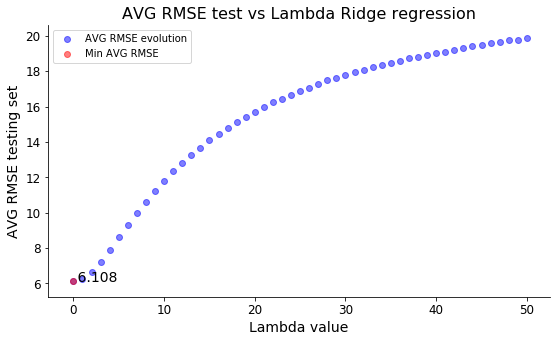

In [371]:
# Plot
# Prepare y-axis data
RMSE_testy = [0 for i in range(0, len(AVGRMSEs))]
for i in range(0, len(AVGRMSEs)):
    RMSE_testy[i] = AVGRMSEs[i][1]

# Scatter plot AVG RMSE test vs Lambda Ridge regression
# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#plt.ylim(0,55)

# Title and labels
plt.title(r'AVG RMSE test vs Lambda Ridge regression')
plt.xlabel(r'Lambda value')
plt.ylabel(r'AVG RMSE testing set')

# Plot
plt.scatter(Lambdas, RMSE_testy, alpha = 0.5, color = 'b', label = 'AVG RMSE evolution')
plt.scatter(Lambdas[BestIter], BestRMSE, alpha = 0.5, color = 'r', label = 'Min AVG RMSE')
ax.annotate(" " + str(np.round(BestRMSE,3)), (Lambdas[BestIter], BestRMSE))

# Add legend
plt.legend()

In [373]:
"""
Function
--------
CVKFold
    k-Fold Cross-validation for the general Rigde regression

Parameters
----------
X, y : narray
     X: independent variables
     y: dependent variable
    
k: int
    number of folds
    
Model: object
    Model used for fitting the regression (function)
    
Hyperparameters: array
    Parameters to be tuned
    
ModelsParams: array
    Model parameters
    
NormalRidge: boolean
    True if normal equations implementation is run
    
verbose: boolean
    True if information per iteration is printed out

UsePreviousPoint: boolean
    True if next iteration starts from previous optimal point (warm-start)
 
Returns
-------
BestIter: int
    Best iteration (RMSE test)
    
BestCoeff: array
    Best coefficients per iteration (outer iteration)

BestRMSE: float
    Best RMSE test value
    
AVGRMSEs: array
    RMSE train and test values per iteration (outer)
    
BestRMSE_inner: array
    Best internal RMSE test values
    
BestLambda: float
    Optimal Hyperparameter value
"""


# Cross validation function for algorithm 2 and Normal Ridge
def CVKFold(k, X, y, Model, Hyperparameters, ModelParams, 
            NormalRidge = False, verbose = False, UsePreviousPoint = False):
    # Starting time
    start_time = time.time()   
        
    # Random seed for reproducibility
    np.random.seed(1)
        
    # CV iterator
    kf = KFold(n_folds = k, n = len(X), shuffle = True)
    
    # Intercept and feature coefficients
    Results = [0 for i in range(0, k)]
    
    # RMSEs 
    AVGRMSEs = [[0, 0] for i in range(0, len(Lambdas))]
    RMSEs_train = np.zeros(k)
    RMSEs_test = np.zeros(k)
    BestRMSE = 9e10
    BestIter = 0
    BestRMSE_inner = [9e10 for i in range(0, len(Lambdas))]

    # Nunmber of iters (Hyperparameters and CV iterations) 
    outeriter = 0
    niters = 0
    
    # Coefficients (per Hyperparameters)
    BestCoeff = [0 for i in range(0, len(Lambdas))]

    # Lambda loop
    for a in Hyperparameters:
        print("\n------------------------- Lambda value", a, "-------------------------")
        niters = 0

        # CV loop
        for train_index, test_index in kf:
            # Iteration number (CV)
            print("------------------------- CV Iteration", niters + 1, "-------------------------")

            # Generate the training and test sets
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit the model
            if NormalRidge == False and UsePreviousPoint == False:
                if verbose == True:
                    print("Running the GD vanilla implementation")
                Results[niters] = Model(X_train, y_train, ModelParams[0], ModelParams[1],
                                        a, ModelParams[2], ModelParams[3], ModelParams[4],
                                        ModelParams[5])
            
            # Use previous iteration betas as a starting point
            if NormalRidge == False and UsePreviousPoint == True and outeriter > 0:
                if verbose == True:
                    print("Using previous betas as a starting point for this iteration")
                Results[niters] = Model(X_train, y_train, ModelParams[0], ModelParams[1],
                                        a, ModelParams[2], ModelParams[3], ModelParams[4],
                                        ModelParams[5], InitialGuess = BestCoeff[outeriter - 1])   
            
            if NormalRidge == False and UsePreviousPoint == True and outeriter == 0:
                if verbose == True:
                    print("Using previous betas as a starting point for this iteration")
                if ModelParams[3] == True:
                    Init = np.zeros(X.shape[1] + 1)
                else:
                    Init = np.zeros(X.shape[1])
                    
                Results[niters] = Model(X_train, y_train, ModelParams[0], ModelParams[1],
                                        a, ModelParams[2], ModelParams[3], ModelParams[4],
                                        ModelParams[5], InitialGuess = Init)   
                        
            # Run the normal version of Ridge regression
            if NormalRidge == True:
                print("Using Normal equations instead of GD")
                Results[niters] = Model(X_train, y_train, a, True, False)
                
            # RMSE training
            y_hat_train = yhat_lreg(X_train, Results[niters], True)
            RMSE_train = np.sqrt(np.mean((y_train - y_hat_train) ** 2))

            # RMSE testing
            y_hat_test = yhat_lreg(X_test, Results[niters], True)
            RMSE_test = np.sqrt(np.mean((y_test - y_hat_test) ** 2))
                
            # Print info    
            if verbose == True:
                print("Betas:", Results[niters])  
                print("RMSE train:", RMSEs_train)
                print("RMSE test:", RMSEs_test)
                
            # Save values
            RMSEs_train[niters] = RMSE_train
            RMSEs_test[niters] = RMSE_test

            # Best Coeff and RMSE (per lambda) values
            if RMSE_test < BestRMSE_inner[outeriter]:
                BestCoeff[outeriter] = Results[niters]
                BestRMSE_inner[outeriter] = RMSE_test

            # Next iteration
            niters += 1
         
        # After a CV full loop
        # AVG RMSE per lambda
        AVGRMSEs[outeriter][0] = np.mean(RMSEs_train)
        AVGRMSEs[outeriter][1] = np.mean(RMSEs_test)

        # Best values (global lambda)
        if AVGRMSEs[outeriter][1] < BestRMSE:
            BestRMSE = AVGRMSEs[outeriter][1]
            BestIter = outeriter
            BestLambda = a

        # Next (lambda) iteration
        outeriter += 1

    # Final table
    if NormalRidge == False:
        print('\n\nRidge Regression: R =', R)
    else:    
        print('\n\nRidge Regression using Normal equations')
    print('Lambda\t RMSE_train\t RMSE_test\t')
    for a in range(0, len(AVGRMSEs)):
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(Lambdas[a], AVGRMSEs[a][0], AVGRMSEs[a][1]))            

    verbose = True
    # Summary results
    if verbose == True:
        print("\n\nSummary")
        print("Best AVG RMSE test:", BestRMSE, "with Lambda", BestLambda)
        print("---------- Best Coefficients ----------")
        print("Intercept value:", BestCoeff[BestIter][0])
        
        aux = 1
        for i in X.columns:
            print(i, ":", BestCoeff[BestIter][aux])
            aux += 1
        print("---------------------------------------")
        
    # Finalization   
    print("\nTime taken (CV " + str(k) + "-fold): " + str(round(time.time() - start_time,2)) + " seconds")    
        
    # Return best iteration (outer), best coefficients (outer), 
    # Best RMSE (outer), AVG RMSEs, BestRMSE_inner, and BestLambda
    return BestIter, BestCoeff, BestRMSE, AVGRMSEs, BestRMSE_inner, BestLambda

In [374]:
## Model GD: MEDV ~ RM + CRIM (wide lambdas range)
# k-folds
k = 25

# Data
X = bostonSTD[["RM", "CRIM"]]
y = Y_Medv

# Lambda values
Lambdas = np.arange(0,51,1)

# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)


------------------------- Lambda value 0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 1.23 seconds
Total number of iterations: 2539
------------------------- CV Iteration 2 -------------------------
Time taken: 1.15 seconds
Total number of iterations: 2537
------------------------- CV Iteration 3 -------------------------
Time taken: 1.32 seconds
Total number of iterations: 2604
------------------------- CV Iteration 4 -------------------------
Time taken: 1.14 seconds
Total number of iterations: 2576
------------------------- CV Iteration 5 -------------------------
Time taken: 1.29 seconds
Total number of iterations: 2636
------------------------- CV Iteration 6 -------------------------
Time taken: 1.16 seconds
Total number of iterations: 2602
------------------------- CV Iteration 7 -------------------------
Time taken: 1.3 seconds
Total number of iterations: 2825
------------------------- CV Iteration 8 -----------------

Time taken: 0.4 seconds
Total number of iterations: 1007
------------------------- CV Iteration 16 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 995
------------------------- CV Iteration 17 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 1000
------------------------- CV Iteration 18 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 996
------------------------- CV Iteration 19 -------------------------
Time taken: 0.47 seconds
Total number of iterations: 996
------------------------- CV Iteration 20 -------------------------
Time taken: 0.48 seconds
Total number of iterations: 1010
------------------------- CV Iteration 21 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 1000
------------------------- CV Iteration 22 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 997
------------------------- CV Iteration 23 -------------------------

Time taken: 0.34 seconds
Total number of iterations: 816
------------------------- CV Iteration 6 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 817
------------------------- CV Iteration 7 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 811
------------------------- CV Iteration 8 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 815
------------------------- CV Iteration 9 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 811
------------------------- CV Iteration 10 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 812
------------------------- CV Iteration 11 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 808
------------------------- CV Iteration 12 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 815
------------------------- CV Iteration 13 -------------------------
Time

Time taken: 0.34 seconds
Total number of iterations: 749
------------------------- CV Iteration 21 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 743
------------------------- CV Iteration 22 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 741
------------------------- CV Iteration 23 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 740
------------------------- CV Iteration 24 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 739
------------------------- CV Iteration 25 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 743

------------------------- Lambda value 8 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 716
------------------------- CV Iteration 2 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 716
----

Time taken: 0.36 seconds
Total number of iterations: 672
------------------------- CV Iteration 11 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 670
------------------------- CV Iteration 12 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 674
------------------------- CV Iteration 13 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 672
------------------------- CV Iteration 14 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 670
------------------------- CV Iteration 15 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 671
------------------------- CV Iteration 16 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 670
------------------------- CV Iteration 17 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 671
------------------------- CV Iteration 18 -------------------------


Time taken: 0.26 seconds
Total number of iterations: 635

------------------------- Lambda value 13 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 620
------------------------- CV Iteration 2 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 620
------------------------- CV Iteration 3 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 622
------------------------- CV Iteration 4 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 621
------------------------- CV Iteration 5 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 623
------------------------- CV Iteration 6 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 624
------------------------- CV Iteration 7 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 619
------

Time taken: 0.27 seconds
Total number of iterations: 591
------------------------- CV Iteration 16 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 590
------------------------- CV Iteration 17 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 591
------------------------- CV Iteration 18 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 590
------------------------- CV Iteration 19 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 590
------------------------- CV Iteration 20 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 596
------------------------- CV Iteration 21 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 592
------------------------- CV Iteration 22 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 591
------------------------- CV Iteration 23 -------------------------


Time taken: 0.23 seconds
Total number of iterations: 559
------------------------- CV Iteration 6 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 560
------------------------- CV Iteration 7 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 556
------------------------- CV Iteration 8 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 558
------------------------- CV Iteration 9 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 556
------------------------- CV Iteration 10 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 557
------------------------- CV Iteration 11 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 555
------------------------- CV Iteration 12 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 558
------------------------- CV Iteration 13 -------------------------
Time

Time taken: 0.22 seconds
Total number of iterations: 540
------------------------- CV Iteration 21 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 537
------------------------- CV Iteration 22 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 536
------------------------- CV Iteration 23 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 534
------------------------- CV Iteration 24 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 533
------------------------- CV Iteration 25 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 536

------------------------- Lambda value 21 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 528
------------------------- CV Iteration 2 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 527
-

Time taken: 0.22 seconds
Total number of iterations: 510
------------------------- CV Iteration 11 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 509
------------------------- CV Iteration 12 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 512
------------------------- CV Iteration 13 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 509
------------------------- CV Iteration 14 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 509
------------------------- CV Iteration 15 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 509
------------------------- CV Iteration 16 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 509
------------------------- CV Iteration 17 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 509
------------------------- CV Iteration 18 -------------------------
Ti

Time taken: 0.24 seconds
Total number of iterations: 494

------------------------- Lambda value 26 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 487
------------------------- CV Iteration 2 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 487
------------------------- CV Iteration 3 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 489
------------------------- CV Iteration 4 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 488
------------------------- CV Iteration 5 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 489
------------------------- CV Iteration 6 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 490
------------------------- CV Iteration 7 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 486
----------

Time taken: 0.2 seconds
Total number of iterations: 472
------------------------- CV Iteration 16 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 472
------------------------- CV Iteration 17 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 473
------------------------- CV Iteration 18 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 473
------------------------- CV Iteration 19 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 472
------------------------- CV Iteration 20 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 476
------------------------- CV Iteration 21 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 474
------------------------- CV Iteration 22 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 473
------------------------- CV Iteration 23 -------------------------
T

Time taken: 0.19 seconds
Total number of iterations: 456
------------------------- CV Iteration 6 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 458
------------------------- CV Iteration 7 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 454
------------------------- CV Iteration 8 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 456
------------------------- CV Iteration 9 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 455
------------------------- CV Iteration 10 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 455
------------------------- CV Iteration 11 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 454
------------------------- CV Iteration 12 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 456
------------------------- CV Iteration 13 -------------------------
Time

Time taken: 0.19 seconds
Total number of iterations: 444
------------------------- CV Iteration 22 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 443
------------------------- CV Iteration 23 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 442
------------------------- CV Iteration 24 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 441
------------------------- CV Iteration 25 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 443

------------------------- Lambda value 34 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 438
------------------------- CV Iteration 2 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 438
------------------------- CV Iteration 3 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 439
---

Time taken: 0.18 seconds
Total number of iterations: 427
------------------------- CV Iteration 12 -------------------------
Time taken: 0.17 seconds
Total number of iterations: 429
------------------------- CV Iteration 13 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 427
------------------------- CV Iteration 14 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 427
------------------------- CV Iteration 15 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 427
------------------------- CV Iteration 16 -------------------------
Time taken: 0.17 seconds
Total number of iterations: 427
------------------------- CV Iteration 17 -------------------------
Time taken: 0.17 seconds
Total number of iterations: 427
------------------------- CV Iteration 18 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 427
------------------------- CV Iteration 19 -------------------------


Time taken: 0.19 seconds
Total number of iterations: 414
------------------------- CV Iteration 3 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 415
------------------------- CV Iteration 4 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 414
------------------------- CV Iteration 5 -------------------------
Time taken: 0.17 seconds
Total number of iterations: 415
------------------------- CV Iteration 6 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 416
------------------------- CV Iteration 7 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 413
------------------------- CV Iteration 8 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 414
------------------------- CV Iteration 9 -------------------------
Time taken: 0.17 seconds
Total number of iterations: 413
------------------------- CV Iteration 10 -------------------------
Time ta

Time taken: 0.21 seconds
Total number of iterations: 404
------------------------- CV Iteration 18 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 404
------------------------- CV Iteration 19 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 404
------------------------- CV Iteration 20 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 407
------------------------- CV Iteration 21 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 405
------------------------- CV Iteration 22 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 404
------------------------- CV Iteration 23 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 403
------------------------- CV Iteration 24 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 402
------------------------- CV Iteration 25 -------------------------
T

Total number of iterations: 395
------------------------- CV Iteration 7 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 392
------------------------- CV Iteration 8 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 393
------------------------- CV Iteration 9 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 392
------------------------- CV Iteration 10 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 392
------------------------- CV Iteration 11 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 392
------------------------- CV Iteration 12 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 393
------------------------- CV Iteration 13 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 392
------------------------- CV Iteration 14 -------------------------
Time taken: 0.24 seconds
Tota

Time taken: 0.22 seconds
Total number of iterations: 385
------------------------- CV Iteration 22 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 384
------------------------- CV Iteration 23 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 383
------------------------- CV Iteration 24 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 382
------------------------- CV Iteration 25 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 385

------------------------- Lambda value 47 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 381
------------------------- CV Iteration 2 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 381
------------------------- CV Iteration 3 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 382
----

Total number of iterations: 373
------------------------- CV Iteration 12 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 375
------------------------- CV Iteration 13 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 373
------------------------- CV Iteration 14 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 373
------------------------- CV Iteration 15 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 373
------------------------- CV Iteration 16 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 373
------------------------- CV Iteration 17 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 373
------------------------- CV Iteration 18 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 373
------------------------- CV Iteration 19 -------------------------
Time taken: 0.2 seconds
Tot

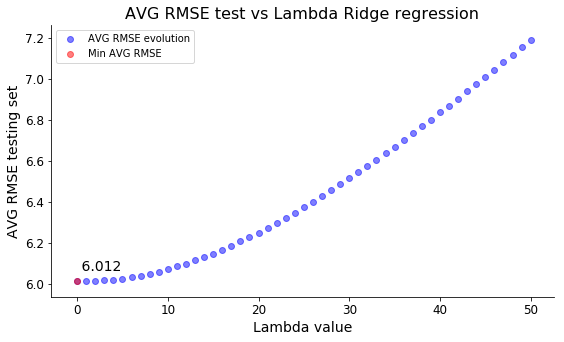

In [383]:
# Plot
# Prepare y-axis data
RMSE_testy = [0 for i in range(0, len(Stats[3]))]
for i in range(0, len(Stats[3])):
    RMSE_testy[i] = Stats[3][i][1]

# Scatter plot AVG RMSE test vs Lambda Ridge regression
# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#plt.ylim(0,55)

# Title and labels
plt.title(r'AVG RMSE test vs Lambda Ridge regression')
plt.xlabel(r'Lambda value')
plt.ylabel(r'AVG RMSE testing set')

# Plot
plt.scatter(Lambdas, RMSE_testy, alpha = 0.5, color = 'b', 
            label = 'AVG RMSE evolution')
plt.scatter(Lambdas[BestIter], Stats[2], alpha = 0.5, color = 'r', 
            label = 'Min AVG RMSE')
ax.annotate(" " + str(np.round(Stats[2],3)), (Lambdas[BestIter], Stats[2] + 0.05))

# Add legend
plt.legend()

In [414]:
## Full model gradient descent (all 13 features, wide lambdas range)
# k-folds
k = 10

# Data
X = bostonSTD.drop("RM", axis = 1)
y = Y_Medv

# Lambda values
Lambdas = np.arange(0, 51, 0.5)

# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats2 = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)


------------------------- Lambda value 0.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 20.07 seconds
Total number of iterations: 25127
------------------------- CV Iteration 2 -------------------------
Time taken: 18.07 seconds
Total number of iterations: 26326
------------------------- CV Iteration 3 -------------------------
Time taken: 17.93 seconds
Total number of iterations: 25347
------------------------- CV Iteration 4 -------------------------
Time taken: 18.4 seconds
Total number of iterations: 24843
------------------------- CV Iteration 5 -------------------------
Time taken: 17.3 seconds
Total number of iterations: 26157
------------------------- CV Iteration 6 -------------------------
Time taken: 13.32 seconds
Total number of iterations: 24062
------------------------- CV Iteration 7 -------------------------
Time taken: 15.97 seconds
Total number of iterations: 24397
------------------------- CV Iteration 8 --

Time taken: 4.26 seconds
Total number of iterations: 5839
------------------------- CV Iteration 3 -------------------------
Time taken: 4.07 seconds
Total number of iterations: 5696
------------------------- CV Iteration 4 -------------------------
Time taken: 5.14 seconds
Total number of iterations: 5789
------------------------- CV Iteration 5 -------------------------
Time taken: 4.3 seconds
Total number of iterations: 5747
------------------------- CV Iteration 6 -------------------------
Time taken: 3.99 seconds
Total number of iterations: 5480
------------------------- CV Iteration 7 -------------------------
Time taken: 3.72 seconds
Total number of iterations: 5527
------------------------- CV Iteration 8 -------------------------
Time taken: 3.68 seconds
Total number of iterations: 5503
------------------------- CV Iteration 9 -------------------------
Time taken: 4.25 seconds
Total number of iterations: 5920
------------------------- CV Iteration 10 -------------------------


Time taken: 2.43 seconds
Total number of iterations: 3400
------------------------- CV Iteration 6 -------------------------
Time taken: 1.75 seconds
Total number of iterations: 3412
------------------------- CV Iteration 7 -------------------------
Time taken: 2.29 seconds
Total number of iterations: 3394
------------------------- CV Iteration 8 -------------------------
Time taken: 0.62 seconds
Total number of iterations: 919
------------------------- CV Iteration 9 -------------------------
Time taken: 0.64 seconds
Total number of iterations: 923
------------------------- CV Iteration 10 -------------------------
Time taken: 0.63 seconds
Total number of iterations: 992

------------------------- Lambda value 6.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.58 seconds
Total number of iterations: 960
------------------------- CV Iteration 2 -------------------------
Time taken: 0.56 seconds
Total number of iterations: 898
-

Time taken: 0.59 seconds
Total number of iterations: 762
------------------------- CV Iteration 9 -------------------------
Time taken: 0.62 seconds
Total number of iterations: 762
------------------------- CV Iteration 10 -------------------------
Time taken: 0.57 seconds
Total number of iterations: 769

------------------------- Lambda value 9.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.5 seconds
Total number of iterations: 764
------------------------- CV Iteration 2 -------------------------
Time taken: 0.5 seconds
Total number of iterations: 760
------------------------- CV Iteration 3 -------------------------
Time taken: 0.5 seconds
Total number of iterations: 767
------------------------- CV Iteration 4 -------------------------
Time taken: 0.52 seconds
Total number of iterations: 750
------------------------- CV Iteration 5 -------------------------
Time taken: 0.57 seconds
Total number of iterations: 757
-------

Time taken: 0.43 seconds
Total number of iterations: 685
------------------------- CV Iteration 2 -------------------------
Time taken: 0.45 seconds
Total number of iterations: 686
------------------------- CV Iteration 3 -------------------------
Time taken: 0.44 seconds
Total number of iterations: 686
------------------------- CV Iteration 4 -------------------------
Time taken: 0.47 seconds
Total number of iterations: 679
------------------------- CV Iteration 5 -------------------------
Time taken: 0.49 seconds
Total number of iterations: 680
------------------------- CV Iteration 6 -------------------------
Time taken: 0.51 seconds
Total number of iterations: 681
------------------------- CV Iteration 7 -------------------------
Time taken: 0.51 seconds
Total number of iterations: 679
------------------------- CV Iteration 8 -------------------------
Time taken: 0.53 seconds
Total number of iterations: 675
------------------------- CV Iteration 9 -------------------------
Time tak

Time taken: 0.42 seconds
Total number of iterations: 628
------------------------- CV Iteration 5 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 628
------------------------- CV Iteration 6 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 628
------------------------- CV Iteration 7 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 626
------------------------- CV Iteration 8 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 624
------------------------- CV Iteration 9 -------------------------
Time taken: 0.48 seconds
Total number of iterations: 624
------------------------- CV Iteration 10 -------------------------
Time taken: 0.47 seconds
Total number of iterations: 625

------------------------- Lambda value 16.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.45 seconds
Total number of iterations: 623
----

Time taken: 0.46 seconds
Total number of iterations: 585
------------------------- CV Iteration 8 -------------------------
Time taken: 0.43 seconds
Total number of iterations: 584
------------------------- CV Iteration 9 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 584
------------------------- CV Iteration 10 -------------------------
Time taken: 0.44 seconds
Total number of iterations: 584

------------------------- Lambda value 19.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 584
------------------------- CV Iteration 2 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 586
------------------------- CV Iteration 3 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 584
------------------------- CV Iteration 4 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 583
-----

Time taken: 0.37 seconds
Total number of iterations: 551

------------------------- Lambda value 22.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 551
------------------------- CV Iteration 2 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 554
------------------------- CV Iteration 3 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 551
------------------------- CV Iteration 4 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 551
------------------------- CV Iteration 5 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 549
------------------------- CV Iteration 6 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 549
------------------------- CV Iteration 7 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 547
----

Time taken: 0.38 seconds
Total number of iterations: 524
------------------------- CV Iteration 4 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 524
------------------------- CV Iteration 5 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 522
------------------------- CV Iteration 6 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 521
------------------------- CV Iteration 7 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 520
------------------------- CV Iteration 8 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 520
------------------------- CV Iteration 9 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 520
------------------------- CV Iteration 10 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 519

------------------------- Lambda value 25.5 -------------------------
---

Time taken: 0.36 seconds
Total number of iterations: 498
------------------------- CV Iteration 7 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 496
------------------------- CV Iteration 8 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 497
------------------------- CV Iteration 9 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 497
------------------------- CV Iteration 10 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 496

------------------------- Lambda value 28.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 496
------------------------- CV Iteration 2 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 499
------------------------- CV Iteration 3 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 496
---

Time taken: 0.32 seconds
Total number of iterations: 476
------------------------- CV Iteration 10 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 475

------------------------- Lambda value 31.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 476
------------------------- CV Iteration 2 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 478
------------------------- CV Iteration 3 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 476
------------------------- CV Iteration 4 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 476
------------------------- CV Iteration 5 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 474
------------------------- CV Iteration 6 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 474
----

Time taken: 0.34 seconds
Total number of iterations: 460
------------------------- CV Iteration 3 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 458
------------------------- CV Iteration 4 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 458
------------------------- CV Iteration 5 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 456
------------------------- CV Iteration 6 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 456
------------------------- CV Iteration 7 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 455
------------------------- CV Iteration 8 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 456
------------------------- CV Iteration 9 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 455
------------------------- CV Iteration 10 -------------------------
Time tak

Time taken: 0.36 seconds
Total number of iterations: 440
------------------------- CV Iteration 6 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 440
------------------------- CV Iteration 7 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 438
------------------------- CV Iteration 8 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 440
------------------------- CV Iteration 9 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 439
------------------------- CV Iteration 10 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 438

------------------------- Lambda value 38.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 439
------------------------- CV Iteration 2 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 441
---

Time taken: 0.3 seconds
Total number of iterations: 425
------------------------- CV Iteration 9 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 424
------------------------- CV Iteration 10 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 423

------------------------- Lambda value 41.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 424
------------------------- CV Iteration 2 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 426
------------------------- CV Iteration 3 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 424
------------------------- CV Iteration 4 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 425
------------------------- CV Iteration 5 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 423
----

Time taken: 0.28 seconds
Total number of iterations: 411
------------------------- CV Iteration 2 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 413
------------------------- CV Iteration 3 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 410
------------------------- CV Iteration 4 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 411
------------------------- CV Iteration 5 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 410
------------------------- CV Iteration 6 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 409
------------------------- CV Iteration 7 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 408
------------------------- CV Iteration 8 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 409
------------------------- CV Iteration 9 -------------------------
Time taken

Time taken: 0.2 seconds
Total number of iterations: 397
------------------------- CV Iteration 6 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 397
------------------------- CV Iteration 7 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 396
------------------------- CV Iteration 8 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 397
------------------------- CV Iteration 9 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 396
------------------------- CV Iteration 10 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 395

------------------------- Lambda value 47.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 396
------------------------- CV Iteration 2 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 398
-----

Time taken: 0.29 seconds
Total number of iterations: 386
------------------------- CV Iteration 9 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 385
------------------------- CV Iteration 10 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 384

------------------------- Lambda value 50.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 385
------------------------- CV Iteration 2 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 387
------------------------- CV Iteration 3 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 385
------------------------- CV Iteration 4 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 386
------------------------- CV Iteration 5 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 384
---

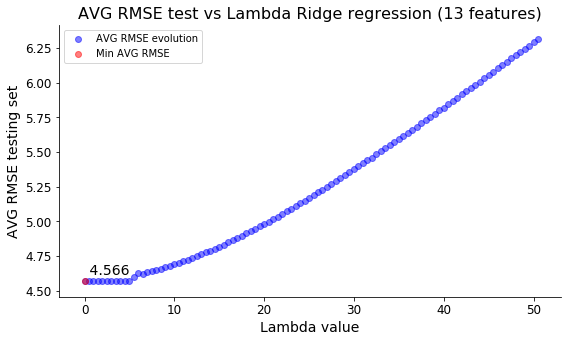

In [419]:
# Plot
# Prepare y-axis data
RMSE_testy = [0 for i in range(0, len(Stats2[3]))]
for i in range(0, len(Stats2[3])):
    RMSE_testy[i] = Stats2[3][i][1]

# Scatter plot AVG RMSE test vs Lambda Ridge regression
# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#plt.ylim(0,55)

# Title and labels
plt.title(r'AVG RMSE test vs Lambda Ridge regression (13 features)')
plt.xlabel(r'Lambda value')
plt.ylabel(r'AVG RMSE testing set')

# Plot
plt.scatter(Lambdas, RMSE_testy, alpha = 0.5, color = 'b', 
            label = 'AVG RMSE evolution')
plt.scatter(Lambdas[BestIter], Stats2[2], alpha = 0.5, color = 'r', 
            label = 'Min AVG RMSE')
ax.annotate(" "+ str(np.round(Stats2[2],3)), (Lambdas[BestIter], 0.05 + Stats2[2]))

# Add legend
plt.legend()

In [269]:
## Full model gradient descent (all 13 features, focus on small lambdas)
# k-folds
k = 25

# Data
X = bostonSTD
y = Y_Medv

# Lambda values
Lambdas = np.arange(0, 1, 0.01)


# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)


------------------------- Lambda value 0.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 12.15 seconds
Total number of iterations: 23495
------------------------- CV Iteration 2 -------------------------
Time taken: 11.66 seconds
Total number of iterations: 24157
------------------------- CV Iteration 3 -------------------------
Time taken: 11.85 seconds
Total number of iterations: 24182
------------------------- CV Iteration 4 -------------------------
Time taken: 12.46 seconds
Total number of iterations: 23593
------------------------- CV Iteration 5 -------------------------
Time taken: 12.93 seconds
Total number of iterations: 24291
------------------------- CV Iteration 6 -------------------------
Time taken: 12.56 seconds
Total number of iterations: 23719
------------------------- CV Iteration 7 -------------------------
Time taken: 12.95 seconds
Total number of iterations: 23642
------------------------- CV Iteration 8 

Time taken: 11.22 seconds
Total number of iterations: 20572
------------------------- CV Iteration 15 -------------------------
Time taken: 10.88 seconds
Total number of iterations: 20542
------------------------- CV Iteration 16 -------------------------
Time taken: 11.03 seconds
Total number of iterations: 20621
------------------------- CV Iteration 17 -------------------------
Time taken: 11.23 seconds
Total number of iterations: 20624
------------------------- CV Iteration 18 -------------------------
Time taken: 11.07 seconds
Total number of iterations: 21143
------------------------- CV Iteration 19 -------------------------
Time taken: 10.78 seconds
Total number of iterations: 20545
------------------------- CV Iteration 20 -------------------------
Time taken: 10.77 seconds
Total number of iterations: 20609
------------------------- CV Iteration 21 -------------------------
Time taken: 11.52 seconds
Total number of iterations: 21663
------------------------- CV Iteration 22 --

Time taken: 10.11 seconds
Total number of iterations: 18857
------------------------- CV Iteration 3 -------------------------
Time taken: 9.91 seconds
Total number of iterations: 18675
------------------------- CV Iteration 4 -------------------------
Time taken: 10.43 seconds
Total number of iterations: 18671
------------------------- CV Iteration 5 -------------------------
Time taken: 10.0 seconds
Total number of iterations: 18890
------------------------- CV Iteration 6 -------------------------
Time taken: 9.91 seconds
Total number of iterations: 18482
------------------------- CV Iteration 7 -------------------------
Time taken: 9.8 seconds
Total number of iterations: 18320
------------------------- CV Iteration 8 -------------------------
Time taken: 9.85 seconds
Total number of iterations: 18585
------------------------- CV Iteration 9 -------------------------
Time taken: 9.88 seconds
Total number of iterations: 18489
------------------------- CV Iteration 10 ----------------

Time taken: 9.16 seconds
Total number of iterations: 17170
------------------------- CV Iteration 17 -------------------------
Time taken: 9.19 seconds
Total number of iterations: 17232
------------------------- CV Iteration 18 -------------------------
Time taken: 9.45 seconds
Total number of iterations: 17667
------------------------- CV Iteration 19 -------------------------
Time taken: 8.85 seconds
Total number of iterations: 17124
------------------------- CV Iteration 20 -------------------------
Time taken: 9.19 seconds
Total number of iterations: 17164
------------------------- CV Iteration 21 -------------------------
Time taken: 9.65 seconds
Total number of iterations: 18033
------------------------- CV Iteration 22 -------------------------
Time taken: 9.12 seconds
Total number of iterations: 17126
------------------------- CV Iteration 23 -------------------------
Time taken: 9.64 seconds
Total number of iterations: 18029
------------------------- CV Iteration 24 ----------

Time taken: 8.92 seconds
Total number of iterations: 16687
------------------------- CV Iteration 6 -------------------------
Time taken: 8.85 seconds
Total number of iterations: 16338
------------------------- CV Iteration 7 -------------------------
Time taken: 8.91 seconds
Total number of iterations: 16192
------------------------- CV Iteration 8 -------------------------
Time taken: 9.12 seconds
Total number of iterations: 16426
------------------------- CV Iteration 9 -------------------------
Time taken: 8.49 seconds
Total number of iterations: 16348
------------------------- CV Iteration 10 -------------------------
Time taken: 8.83 seconds
Total number of iterations: 16373
------------------------- CV Iteration 11 -------------------------
Time taken: 9.09 seconds
Total number of iterations: 16906
------------------------- CV Iteration 12 -------------------------
Time taken: 8.81 seconds
Total number of iterations: 16514
------------------------- CV Iteration 13 --------------

Time taken: 8.16 seconds
Total number of iterations: 15465
------------------------- CV Iteration 20 -------------------------
Time taken: 8.34 seconds
Total number of iterations: 15499
------------------------- CV Iteration 21 -------------------------
Time taken: 8.52 seconds
Total number of iterations: 16268
------------------------- CV Iteration 22 -------------------------
Time taken: 8.41 seconds
Total number of iterations: 15475
------------------------- CV Iteration 23 -------------------------
Time taken: 8.79 seconds
Total number of iterations: 16263
------------------------- CV Iteration 24 -------------------------
Time taken: 8.1 seconds
Total number of iterations: 15448
------------------------- CV Iteration 25 -------------------------
Time taken: 8.17 seconds
Total number of iterations: 15421

------------------------- Lambda value 0.13 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 8.29 seconds
Total number of i

Time taken: 8.24 seconds
Total number of iterations: 15130
------------------------- CV Iteration 9 -------------------------
Time taken: 7.98 seconds
Total number of iterations: 15060
------------------------- CV Iteration 10 -------------------------
Time taken: 7.97 seconds
Total number of iterations: 15081
------------------------- CV Iteration 11 -------------------------
Time taken: 8.35 seconds
Total number of iterations: 15563
------------------------- CV Iteration 12 -------------------------
Time taken: 7.9 seconds
Total number of iterations: 15208
------------------------- CV Iteration 13 -------------------------
Time taken: 7.83 seconds
Total number of iterations: 14847
------------------------- CV Iteration 14 -------------------------
Time taken: 7.96 seconds
Total number of iterations: 14810
------------------------- CV Iteration 15 -------------------------
Time taken: 8.03 seconds
Total number of iterations: 14793
------------------------- CV Iteration 16 ------------

Time taken: 11.38 seconds
Total number of iterations: 14390
------------------------- CV Iteration 23 -------------------------
Time taken: 11.78 seconds
Total number of iterations: 15108
------------------------- CV Iteration 24 -------------------------
Time taken: 12.62 seconds
Total number of iterations: 14364
------------------------- CV Iteration 25 -------------------------
Time taken: 15.08 seconds
Total number of iterations: 14340

------------------------- Lambda value 0.18 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 12.6 seconds
Total number of iterations: 14312
------------------------- CV Iteration 2 -------------------------
Time taken: 14.43 seconds
Total number of iterations: 14748
------------------------- CV Iteration 3 -------------------------
Time taken: 10.75 seconds
Total number of iterations: 14600
------------------------- CV Iteration 4 -------------------------
Time taken: 19.03 seconds
Total number

Time taken: 9.79 seconds
Total number of iterations: 14160
------------------------- CV Iteration 11 -------------------------
Time taken: 12.59 seconds
Total number of iterations: 14606
------------------------- CV Iteration 12 -------------------------
Time taken: 10.13 seconds
Total number of iterations: 14277
------------------------- CV Iteration 13 -------------------------
Time taken: 9.6 seconds
Total number of iterations: 13942
------------------------- CV Iteration 14 -------------------------
Time taken: 9.39 seconds
Total number of iterations: 13908
------------------------- CV Iteration 15 -------------------------
Time taken: 12.18 seconds
Total number of iterations: 13894
------------------------- CV Iteration 16 -------------------------
Time taken: 9.02 seconds
Total number of iterations: 13907
------------------------- CV Iteration 17 -------------------------
Time taken: 9.2 seconds
Total number of iterations: 13961
------------------------- CV Iteration 18 ---------

Time taken: 9.51 seconds
Total number of iterations: 13560
------------------------- CV Iteration 25 -------------------------
Time taken: 11.04 seconds
Total number of iterations: 13538

------------------------- Lambda value 0.23 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 9.66 seconds
Total number of iterations: 13538
------------------------- CV Iteration 2 -------------------------
Time taken: 10.11 seconds
Total number of iterations: 13945
------------------------- CV Iteration 3 -------------------------
Time taken: 9.88 seconds
Total number of iterations: 13807
------------------------- CV Iteration 4 -------------------------
Time taken: 10.98 seconds
Total number of iterations: 13835
------------------------- CV Iteration 5 -------------------------
Time taken: 11.92 seconds
Total number of iterations: 13964
------------------------- CV Iteration 6 -------------------------
Time taken: 10.16 seconds
Total number of 

Time taken: 7.61 seconds
Total number of iterations: 13555
------------------------- CV Iteration 13 -------------------------
Time taken: 7.67 seconds
Total number of iterations: 13240
------------------------- CV Iteration 14 -------------------------
Time taken: 7.22 seconds
Total number of iterations: 13208
------------------------- CV Iteration 15 -------------------------
Time taken: 8.15 seconds
Total number of iterations: 13195
------------------------- CV Iteration 16 -------------------------
Time taken: 7.97 seconds
Total number of iterations: 13208
------------------------- CV Iteration 17 -------------------------
Time taken: 7.6 seconds
Total number of iterations: 13259
------------------------- CV Iteration 18 -------------------------
Time taken: 7.02 seconds
Total number of iterations: 13573
------------------------- CV Iteration 19 -------------------------
Time taken: 7.31 seconds
Total number of iterations: 13174
------------------------- CV Iteration 20 -----------

Time taken: 6.74 seconds
Total number of iterations: 12916
------------------------- CV Iteration 2 -------------------------
Time taken: 7.22 seconds
Total number of iterations: 13301
------------------------- CV Iteration 3 -------------------------
Time taken: 6.84 seconds
Total number of iterations: 13171
------------------------- CV Iteration 4 -------------------------
Time taken: 7.37 seconds
Total number of iterations: 13197
------------------------- CV Iteration 5 -------------------------
Time taken: 7.08 seconds
Total number of iterations: 13319
------------------------- CV Iteration 6 -------------------------
Time taken: 6.7 seconds
Total number of iterations: 13055
------------------------- CV Iteration 7 -------------------------
Time taken: 6.46 seconds
Total number of iterations: 12942
------------------------- CV Iteration 8 -------------------------
Time taken: 6.54 seconds
Total number of iterations: 13123
------------------------- CV Iteration 9 -------------------

Time taken: 7.33 seconds
Total number of iterations: 12625
------------------------- CV Iteration 16 -------------------------
Time taken: 7.43 seconds
Total number of iterations: 12637
------------------------- CV Iteration 17 -------------------------
Time taken: 7.48 seconds
Total number of iterations: 12685
------------------------- CV Iteration 18 -------------------------
Time taken: 7.58 seconds
Total number of iterations: 12981
------------------------- CV Iteration 19 -------------------------
Time taken: 7.32 seconds
Total number of iterations: 12604
------------------------- CV Iteration 20 -------------------------
Time taken: 7.26 seconds
Total number of iterations: 12629
------------------------- CV Iteration 21 -------------------------
Time taken: 7.74 seconds
Total number of iterations: 13227
------------------------- CV Iteration 22 -------------------------
Time taken: 7.35 seconds
Total number of iterations: 12613
------------------------- CV Iteration 23 ----------

Time taken: 7.24 seconds
Total number of iterations: 12664
------------------------- CV Iteration 5 -------------------------
Time taken: 7.36 seconds
Total number of iterations: 12781
------------------------- CV Iteration 6 -------------------------
Time taken: 7.43 seconds
Total number of iterations: 12530
------------------------- CV Iteration 7 -------------------------
Time taken: 7.06 seconds
Total number of iterations: 12423
------------------------- CV Iteration 8 -------------------------
Time taken: 7.52 seconds
Total number of iterations: 12596
------------------------- CV Iteration 9 -------------------------
Time taken: 7.34 seconds
Total number of iterations: 12538
------------------------- CV Iteration 10 -------------------------
Time taken: 7.17 seconds
Total number of iterations: 12558
------------------------- CV Iteration 11 -------------------------
Time taken: 7.36 seconds
Total number of iterations: 12939
------------------------- CV Iteration 12 ---------------

Time taken: 6.99 seconds
Total number of iterations: 12480
------------------------- CV Iteration 19 -------------------------
Time taken: 6.98 seconds
Total number of iterations: 12123
------------------------- CV Iteration 20 -------------------------
Time taken: 7.25 seconds
Total number of iterations: 12145
------------------------- CV Iteration 21 -------------------------
Time taken: 7.19 seconds
Total number of iterations: 12716
------------------------- CV Iteration 22 -------------------------
Time taken: 7.27 seconds
Total number of iterations: 12130
------------------------- CV Iteration 23 -------------------------
Time taken: 7.18 seconds
Total number of iterations: 12713
------------------------- CV Iteration 24 -------------------------
Time taken: 7.31 seconds
Total number of iterations: 12111
------------------------- CV Iteration 25 -------------------------
Time taken: 6.82 seconds
Total number of iterations: 12094

------------------------- Lambda value 0.36 -------

Time taken: 7.14 seconds
Total number of iterations: 11978
------------------------- CV Iteration 8 -------------------------
Time taken: 7.06 seconds
Total number of iterations: 12143
------------------------- CV Iteration 9 -------------------------
Time taken: 6.78 seconds
Total number of iterations: 12087
------------------------- CV Iteration 10 -------------------------
Time taken: 7.0 seconds
Total number of iterations: 12108
------------------------- CV Iteration 11 -------------------------
Time taken: 7.2 seconds
Total number of iterations: 12471
------------------------- CV Iteration 12 -------------------------
Time taken: 7.39 seconds
Total number of iterations: 12200
------------------------- CV Iteration 13 -------------------------
Time taken: 7.11 seconds
Total number of iterations: 11924
------------------------- CV Iteration 14 -------------------------
Time taken: 6.68 seconds
Total number of iterations: 11894
------------------------- CV Iteration 15 --------------

Time taken: 10.79 seconds
Total number of iterations: 12274
------------------------- CV Iteration 22 -------------------------
Time taken: 7.8 seconds
Total number of iterations: 11711
------------------------- CV Iteration 23 -------------------------
Time taken: 7.47 seconds
Total number of iterations: 12271
------------------------- CV Iteration 24 -------------------------
Time taken: 9.57 seconds
Total number of iterations: 11695
------------------------- CV Iteration 25 -------------------------
Time taken: 7.94 seconds
Total number of iterations: 11679

------------------------- Lambda value 0.41 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 8.25 seconds
Total number of iterations: 11712
------------------------- CV Iteration 2 -------------------------
Time taken: 9.75 seconds
Total number of iterations: 12054
------------------------- CV Iteration 3 -------------------------
Time taken: 8.78 seconds
Total number of it

Time taken: 7.77 seconds
Total number of iterations: 11714
------------------------- CV Iteration 11 -------------------------
Time taken: 7.73 seconds
Total number of iterations: 12061
------------------------- CV Iteration 12 -------------------------
Time taken: 7.77 seconds
Total number of iterations: 11801
------------------------- CV Iteration 13 -------------------------
Time taken: 7.64 seconds
Total number of iterations: 11535
------------------------- CV Iteration 14 -------------------------
Time taken: 7.33 seconds
Total number of iterations: 11506
------------------------- CV Iteration 15 -------------------------
Time taken: 7.78 seconds
Total number of iterations: 11499
------------------------- CV Iteration 16 -------------------------
Time taken: 7.36 seconds
Total number of iterations: 11513
------------------------- CV Iteration 17 -------------------------
Time taken: 8.19 seconds
Total number of iterations: 11552
------------------------- CV Iteration 18 ----------

Time taken: 8.45 seconds
Total number of iterations: 11329
------------------------- CV Iteration 25 -------------------------
Time taken: 7.49 seconds
Total number of iterations: 11314

------------------------- Lambda value 0.46 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 8.76 seconds
Total number of iterations: 11349
------------------------- CV Iteration 2 -------------------------
Time taken: 8.06 seconds
Total number of iterations: 11679
------------------------- CV Iteration 3 -------------------------
Time taken: 7.58 seconds
Total number of iterations: 11572
------------------------- CV Iteration 4 -------------------------
Time taken: 8.18 seconds
Total number of iterations: 11587
------------------------- CV Iteration 5 -------------------------
Time taken: 8.09 seconds
Total number of iterations: 11696
------------------------- CV Iteration 6 -------------------------
Time taken: 8.11 seconds
Total number of itera

Time taken: 8.06 seconds
Total number of iterations: 11190
------------------------- CV Iteration 14 -------------------------
Time taken: 7.62 seconds
Total number of iterations: 11162
------------------------- CV Iteration 15 -------------------------
Time taken: 7.89 seconds
Total number of iterations: 11156
------------------------- CV Iteration 16 -------------------------
Time taken: 7.92 seconds
Total number of iterations: 11170
------------------------- CV Iteration 17 -------------------------
Time taken: 7.88 seconds
Total number of iterations: 11206
------------------------- CV Iteration 18 -------------------------
Time taken: 8.37 seconds
Total number of iterations: 11455
------------------------- CV Iteration 19 -------------------------
Time taken: 7.77 seconds
Total number of iterations: 11137
------------------------- CV Iteration 20 -------------------------
Time taken: 7.88 seconds
Total number of iterations: 11156
------------------------- CV Iteration 21 ----------

Time taken: 8.1 seconds
Total number of iterations: 11343
------------------------- CV Iteration 3 -------------------------
Time taken: 10.63 seconds
Total number of iterations: 11240
------------------------- CV Iteration 4 -------------------------
Time taken: 9.16 seconds
Total number of iterations: 11253
------------------------- CV Iteration 5 -------------------------
Time taken: 9.13 seconds
Total number of iterations: 11360
------------------------- CV Iteration 6 -------------------------
Time taken: 7.89 seconds
Total number of iterations: 11141
------------------------- CV Iteration 7 -------------------------
Time taken: 8.18 seconds
Total number of iterations: 11050
------------------------- CV Iteration 8 -------------------------
Time taken: 6.75 seconds
Total number of iterations: 11202
------------------------- CV Iteration 9 -------------------------
Time taken: 7.34 seconds
Total number of iterations: 11147
------------------------- CV Iteration 10 -----------------

Time taken: 6.14 seconds
Total number of iterations: 10861
------------------------- CV Iteration 17 -------------------------
Time taken: 5.6 seconds
Total number of iterations: 10895
------------------------- CV Iteration 18 -------------------------
Time taken: 5.89 seconds
Total number of iterations: 11134
------------------------- CV Iteration 19 -------------------------
Time taken: 5.6 seconds
Total number of iterations: 10828
------------------------- CV Iteration 20 -------------------------
Time taken: 5.62 seconds
Total number of iterations: 10847
------------------------- CV Iteration 21 -------------------------
Time taken: 5.85 seconds
Total number of iterations: 11344
------------------------- CV Iteration 22 -------------------------
Time taken: 6.05 seconds
Total number of iterations: 10830
------------------------- CV Iteration 23 -------------------------
Time taken: 6.28 seconds
Total number of iterations: 11343
------------------------- CV Iteration 24 ------------

Time taken: 5.78 seconds
Total number of iterations: 11056
------------------------- CV Iteration 6 -------------------------
Time taken: 5.76 seconds
Total number of iterations: 10844
------------------------- CV Iteration 7 -------------------------
Time taken: 5.6 seconds
Total number of iterations: 10756
------------------------- CV Iteration 8 -------------------------
Time taken: 5.66 seconds
Total number of iterations: 10904
------------------------- CV Iteration 9 -------------------------
Time taken: 5.87 seconds
Total number of iterations: 10849
------------------------- CV Iteration 10 -------------------------
Time taken: 5.94 seconds
Total number of iterations: 10875
------------------------- CV Iteration 11 -------------------------
Time taken: 5.78 seconds
Total number of iterations: 11187
------------------------- CV Iteration 12 -------------------------
Time taken: 5.66 seconds
Total number of iterations: 10949
------------------------- CV Iteration 13 ---------------

Time taken: 5.56 seconds
Total number of iterations: 10548
------------------------- CV Iteration 20 -------------------------
Time taken: 5.52 seconds
Total number of iterations: 10565
------------------------- CV Iteration 21 -------------------------
Time taken: 6.06 seconds
Total number of iterations: 11047
------------------------- CV Iteration 22 -------------------------
Time taken: 5.63 seconds
Total number of iterations: 10548
------------------------- CV Iteration 23 -------------------------
Time taken: 5.91 seconds
Total number of iterations: 11047
------------------------- CV Iteration 24 -------------------------
Time taken: 5.54 seconds
Total number of iterations: 10540
------------------------- CV Iteration 25 -------------------------
Time taken: 5.45 seconds
Total number of iterations: 10528

------------------------- Lambda value 0.59 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 5.55 seconds
Total number of 

Time taken: 5.63 seconds
Total number of iterations: 10631
------------------------- CV Iteration 9 -------------------------
Time taken: 5.69 seconds
Total number of iterations: 10576
------------------------- CV Iteration 10 -------------------------
Time taken: 5.41 seconds
Total number of iterations: 10604
------------------------- CV Iteration 11 -------------------------
Time taken: 5.28 seconds
Total number of iterations: 10905
------------------------- CV Iteration 12 -------------------------
Time taken: 5.12 seconds
Total number of iterations: 10674
------------------------- CV Iteration 13 -------------------------
Time taken: 5.1 seconds
Total number of iterations: 10438
------------------------- CV Iteration 14 -------------------------
Time taken: 5.06 seconds
Total number of iterations: 10411
------------------------- CV Iteration 15 -------------------------
Time taken: 5.07 seconds
Total number of iterations: 10409
------------------------- CV Iteration 16 ------------

Time taken: 5.22 seconds
Total number of iterations: 10289
------------------------- CV Iteration 23 -------------------------
Time taken: 5.65 seconds
Total number of iterations: 10775
------------------------- CV Iteration 24 -------------------------
Time taken: 5.45 seconds
Total number of iterations: 10284
------------------------- CV Iteration 25 -------------------------
Time taken: 5.01 seconds
Total number of iterations: 10272

------------------------- Lambda value 0.64 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 5.06 seconds
Total number of iterations: 10307
------------------------- CV Iteration 2 -------------------------
Time taken: 5.24 seconds
Total number of iterations: 10604
------------------------- CV Iteration 3 -------------------------
Time taken: 5.09 seconds
Total number of iterations: 10512
------------------------- CV Iteration 4 -------------------------
Time taken: 5.24 seconds
Total number of ite

Time taken: 5.69 seconds
Total number of iterations: 10646
------------------------- CV Iteration 12 -------------------------
Time taken: 5.77 seconds
Total number of iterations: 10420
------------------------- CV Iteration 13 -------------------------
Time taken: 5.26 seconds
Total number of iterations: 10192
------------------------- CV Iteration 14 -------------------------
Time taken: 5.54 seconds
Total number of iterations: 10164
------------------------- CV Iteration 15 -------------------------
Time taken: 5.3 seconds
Total number of iterations: 10164
------------------------- CV Iteration 16 -------------------------
Time taken: 5.4 seconds
Total number of iterations: 10179
------------------------- CV Iteration 17 -------------------------
Time taken: 5.41 seconds
Total number of iterations: 10207
------------------------- CV Iteration 18 -------------------------
Time taken: 5.51 seconds
Total number of iterations: 10423
------------------------- CV Iteration 19 ------------

Time taken: 5.26 seconds
Total number of iterations: 10036

------------------------- Lambda value 0.69 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 5.25 seconds
Total number of iterations: 10069
------------------------- CV Iteration 2 -------------------------
Time taken: 5.51 seconds
Total number of iterations: 10359
------------------------- CV Iteration 3 -------------------------
Time taken: 5.51 seconds
Total number of iterations: 10271
------------------------- CV Iteration 4 -------------------------
Time taken: 5.68 seconds
Total number of iterations: 10275
------------------------- CV Iteration 5 -------------------------
Time taken: 5.37 seconds
Total number of iterations: 10377
------------------------- CV Iteration 6 -------------------------
Time taken: 5.45 seconds
Total number of iterations: 10180
------------------------- CV Iteration 7 -------------------------
Time taken: 5.44 seconds
Total number of iterat

Time taken: 4.66 seconds
Total number of iterations: 9935
------------------------- CV Iteration 15 -------------------------
Time taken: 4.67 seconds
Total number of iterations: 9936
------------------------- CV Iteration 16 -------------------------
Time taken: 4.9 seconds
Total number of iterations: 9952
------------------------- CV Iteration 17 -------------------------
Time taken: 4.82 seconds
Total number of iterations: 9978
------------------------- CV Iteration 18 -------------------------
Time taken: 5.11 seconds
Total number of iterations: 10186
------------------------- CV Iteration 19 -------------------------
Time taken: 4.78 seconds
Total number of iterations: 9918
------------------------- CV Iteration 20 -------------------------
Time taken: 5.03 seconds
Total number of iterations: 9933
------------------------- CV Iteration 21 -------------------------
Time taken: 5.43 seconds
Total number of iterations: 10382
------------------------- CV Iteration 22 -----------------

Time taken: 5.24 seconds
Total number of iterations: 10048
------------------------- CV Iteration 4 -------------------------
Time taken: 5.59 seconds
Total number of iterations: 10048
------------------------- CV Iteration 5 -------------------------
Time taken: 5.38 seconds
Total number of iterations: 10151
------------------------- CV Iteration 6 -------------------------
Time taken: 5.31 seconds
Total number of iterations: 9957
------------------------- CV Iteration 7 -------------------------
Time taken: 5.19 seconds
Total number of iterations: 9881
------------------------- CV Iteration 8 -------------------------
Time taken: 5.26 seconds
Total number of iterations: 10017
------------------------- CV Iteration 9 -------------------------
Time taken: 5.25 seconds
Total number of iterations: 9960
------------------------- CV Iteration 10 -------------------------
Time taken: 5.26 seconds
Total number of iterations: 9994
------------------------- CV Iteration 11 --------------------

Time taken: 5.19 seconds
Total number of iterations: 9764
------------------------- CV Iteration 18 -------------------------
Time taken: 5.2 seconds
Total number of iterations: 9966
------------------------- CV Iteration 19 -------------------------
Time taken: 5.22 seconds
Total number of iterations: 9707
------------------------- CV Iteration 20 -------------------------
Time taken: 5.28 seconds
Total number of iterations: 9721
------------------------- CV Iteration 21 -------------------------
Time taken: 5.3 seconds
Total number of iterations: 10159
------------------------- CV Iteration 22 -------------------------
Time taken: 5.19 seconds
Total number of iterations: 9701
------------------------- CV Iteration 23 -------------------------
Time taken: 5.21 seconds
Total number of iterations: 10161
------------------------- CV Iteration 24 -------------------------
Time taken: 4.85 seconds
Total number of iterations: 9703
------------------------- CV Iteration 25 ------------------

Time taken: 5.16 seconds
Total number of iterations: 9749
------------------------- CV Iteration 7 -------------------------
Time taken: 5.27 seconds
Total number of iterations: 9676
------------------------- CV Iteration 8 -------------------------
Time taken: 5.11 seconds
Total number of iterations: 9809
------------------------- CV Iteration 9 -------------------------
Time taken: 5.31 seconds
Total number of iterations: 9752
------------------------- CV Iteration 10 -------------------------
Time taken: 5.08 seconds
Total number of iterations: 9788
------------------------- CV Iteration 11 -------------------------
Time taken: 5.37 seconds
Total number of iterations: 10054
------------------------- CV Iteration 12 -------------------------
Time taken: 5.28 seconds
Total number of iterations: 9842
------------------------- CV Iteration 13 -------------------------
Time taken: 5.07 seconds
Total number of iterations: 9628
------------------------- CV Iteration 14 --------------------

Time taken: 5.41 seconds
Total number of iterations: 9950
------------------------- CV Iteration 22 -------------------------
Time taken: 5.03 seconds
Total number of iterations: 9501
------------------------- CV Iteration 23 -------------------------
Time taken: 5.2 seconds
Total number of iterations: 9952
------------------------- CV Iteration 24 -------------------------
Time taken: 5.1 seconds
Total number of iterations: 9505
------------------------- CV Iteration 25 -------------------------
Time taken: 4.88 seconds
Total number of iterations: 9496

------------------------- Lambda value 0.82 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 5.09 seconds
Total number of iterations: 9524
------------------------- CV Iteration 2 -------------------------
Time taken: 5.12 seconds
Total number of iterations: 9799
------------------------- CV Iteration 3 -------------------------
Time taken: 5.2 seconds
Total number of iterations: 

Time taken: 4.95 seconds
Total number of iterations: 9595
------------------------- CV Iteration 11 -------------------------
Time taken: 5.21 seconds
Total number of iterations: 9853
------------------------- CV Iteration 12 -------------------------
Time taken: 5.05 seconds
Total number of iterations: 9645
------------------------- CV Iteration 13 -------------------------
Time taken: 5.2 seconds
Total number of iterations: 9436
------------------------- CV Iteration 14 -------------------------
Time taken: 4.99 seconds
Total number of iterations: 9409
------------------------- CV Iteration 15 -------------------------
Time taken: 5.03 seconds
Total number of iterations: 9413
------------------------- CV Iteration 16 -------------------------
Time taken: 4.98 seconds
Total number of iterations: 9430
------------------------- CV Iteration 17 -------------------------
Time taken: 4.96 seconds
Total number of iterations: 9450
------------------------- CV Iteration 18 -------------------

Time taken: 5.07 seconds
Total number of iterations: 9311

------------------------- Lambda value 0.87 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 5.12 seconds
Total number of iterations: 9337
------------------------- CV Iteration 2 -------------------------
Time taken: 5.1 seconds
Total number of iterations: 9607
------------------------- CV Iteration 3 -------------------------
Time taken: 5.11 seconds
Total number of iterations: 9531
------------------------- CV Iteration 4 -------------------------
Time taken: 5.25 seconds
Total number of iterations: 9524
------------------------- CV Iteration 5 -------------------------
Time taken: 5.1 seconds
Total number of iterations: 9626
------------------------- CV Iteration 6 -------------------------
Time taken: 4.98 seconds
Total number of iterations: 9443
------------------------- CV Iteration 7 -------------------------
Time taken: 5.05 seconds
Total number of iterations: 937

Time taken: 4.98 seconds
Total number of iterations: 9228
------------------------- CV Iteration 15 -------------------------
Time taken: 4.73 seconds
Total number of iterations: 9234
------------------------- CV Iteration 16 -------------------------
Time taken: 4.98 seconds
Total number of iterations: 9251
------------------------- CV Iteration 17 -------------------------
Time taken: 4.74 seconds
Total number of iterations: 9269
------------------------- CV Iteration 18 -------------------------
Time taken: 5.2 seconds
Total number of iterations: 9453
------------------------- CV Iteration 19 -------------------------
Time taken: 4.85 seconds
Total number of iterations: 9215
------------------------- CV Iteration 20 -------------------------
Time taken: 5.13 seconds
Total number of iterations: 9228
------------------------- CV Iteration 21 -------------------------
Time taken: 5.22 seconds
Total number of iterations: 9641
------------------------- CV Iteration 22 -------------------

Time taken: 4.89 seconds
Total number of iterations: 9353
------------------------- CV Iteration 4 -------------------------
Time taken: 4.92 seconds
Total number of iterations: 9343
------------------------- CV Iteration 5 -------------------------
Time taken: 4.96 seconds
Total number of iterations: 9446
------------------------- CV Iteration 6 -------------------------
Time taken: 4.89 seconds
Total number of iterations: 9265
------------------------- CV Iteration 7 -------------------------
Time taken: 4.92 seconds
Total number of iterations: 9199
------------------------- CV Iteration 8 -------------------------
Time taken: 4.77 seconds
Total number of iterations: 9326
------------------------- CV Iteration 9 -------------------------
Time taken: 4.64 seconds
Total number of iterations: 9266
------------------------- CV Iteration 10 -------------------------
Time taken: 4.5 seconds
Total number of iterations: 9309
------------------------- CV Iteration 11 -------------------------

Time taken: 4.97 seconds
Total number of iterations: 9276
------------------------- CV Iteration 19 -------------------------
Time taken: 6.37 seconds
Total number of iterations: 9046
------------------------- CV Iteration 20 -------------------------
Time taken: 7.56 seconds
Total number of iterations: 9057
------------------------- CV Iteration 21 -------------------------
Time taken: 7.63 seconds
Total number of iterations: 9462
------------------------- CV Iteration 22 -------------------------
Time taken: 5.51 seconds
Total number of iterations: 9033
------------------------- CV Iteration 23 -------------------------
Time taken: 6.13 seconds
Total number of iterations: 9466
------------------------- CV Iteration 24 -------------------------
Time taken: 5.89 seconds
Total number of iterations: 9045
------------------------- CV Iteration 25 -------------------------
Time taken: 6.32 seconds
Total number of iterations: 9037

------------------------- Lambda value 0.95 ---------------

Time taken: 5.17 seconds
Total number of iterations: 9034
------------------------- CV Iteration 8 -------------------------
Time taken: 5.09 seconds
Total number of iterations: 9158
------------------------- CV Iteration 9 -------------------------
Time taken: 5.2 seconds
Total number of iterations: 9097
------------------------- CV Iteration 10 -------------------------
Time taken: 5.27 seconds
Total number of iterations: 9143
------------------------- CV Iteration 11 -------------------------
Time taken: 6.48 seconds
Total number of iterations: 9380
------------------------- CV Iteration 12 -------------------------
Time taken: 6.23 seconds
Total number of iterations: 9183
------------------------- CV Iteration 13 -------------------------
Time taken: 6.45 seconds
Total number of iterations: 8985
------------------------- CV Iteration 14 -------------------------
Time taken: 5.7 seconds
Total number of iterations: 8958
------------------------- CV Iteration 15 ----------------------

Time taken: 5.83 seconds
Total number of iterations: 8870
------------------------- CV Iteration 23 -------------------------
Time taken: 8.74 seconds
Total number of iterations: 9297
------------------------- CV Iteration 24 -------------------------
Time taken: 6.51 seconds
Total number of iterations: 8884
------------------------- CV Iteration 25 -------------------------
Time taken: 5.68 seconds
Total number of iterations: 8877


Ridge Regression: R = 1e-05
Lambda	 RMSE_train	 RMSE_test	
0.000	 4.6752		 4.6520
0.010	 4.6752		 4.6520
0.020	 4.6752		 4.6520
0.030	 4.6752		 4.6519
0.040	 4.6752		 4.6519
0.050	 4.6752		 4.6519
0.060	 4.6752		 4.6519
0.070	 4.6752		 4.6519
0.080	 4.6752		 4.6519
0.090	 4.6752		 4.6519
0.100	 4.6752		 4.6519
0.110	 4.6752		 4.6519
0.120	 4.6752		 4.6519
0.130	 4.6752		 4.6518
0.140	 4.6752		 4.6518
0.150	 4.6752		 4.6518
0.160	 4.6752		 4.6518
0.170	 4.6752		 4.6518
0.180	 4.6752		 4.6518
0.190	 4.6752		 4.6518
0.200	 4.6752		 4.6518
0.210	 4.6752		 4.65

In [402]:
# Normal function (All original features)
# k-folds
k = 25

# Data
X = bostonSTD.drop("RM2", axis = 1)
y = Y_Medv

# Lambda values
Lambdas = np.arange(0,51,1)
    
# Call the function
Stats = CVKFold(k, X, y, NormalRidge, Lambdas, ModelParams, NormalRidge = True)


------------------------- Lambda value 0 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of

Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------

------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 12 ------------

Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 17 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 --------------------

------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------

Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
-----------------------

------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------

------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------

------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------

Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 45 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -----------------

------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 49 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instea

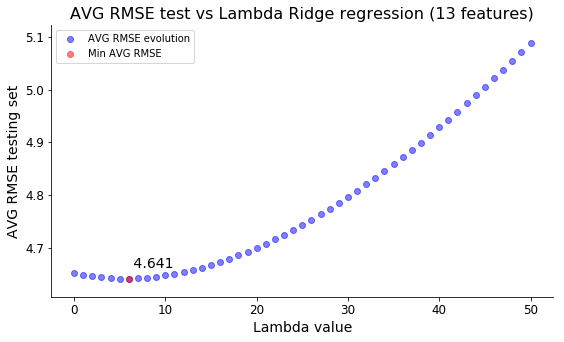

In [403]:
# Plot
# Prepare y-axis data
RMSE_testy = [0 for i in range(0, len(Stats[3]))]
for i in range(0, len(Stats[3])):
    RMSE_testy[i] = Stats[3][i][1]

# Scatter plot AVG RMSE test vs Lambda Ridge regression
# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#plt.ylim(0,55)

# Title and labels
plt.title(r'AVG RMSE test vs Lambda Ridge regression (13 features)')
plt.xlabel(r'Lambda value')
plt.ylabel(r'AVG RMSE testing set')

# Plot
plt.scatter(Lambdas, RMSE_testy, alpha = 0.5, color = 'b', 
            label = 'AVG RMSE evolution')
plt.scatter(Lambdas[Stats[0]], Stats[2], alpha = 0.5, 
            color = 'r', label = 'Min AVG RMSE')
ax.annotate(" " + str(np.round(Stats[2],3)), (Lambdas[Stats[0]], Stats[2] + 0.02))

# Add legend
plt.legend()

In [412]:
# Normal function (104 features)
# k-folds
k = 25

# Data
X = bostonM.drop("MEDV", axis = 1)
y = boston["MEDV"]

# Lambda values
Lambdas = np.arange(0, 51, 1)
    
# Call the function
Stats = CVKFold(k, X, y, NormalRidge, Lambdas, ModelParams, NormalRidge = True)


------------------------- Lambda value 0 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of

------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 ----------------

------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 9 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations in

------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 13 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations in


------------------------- Lambda value 17 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead o

Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 21 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 ------------------

------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 ----------------

------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------------------
Using Normal equations instead of GD

------------------------- Lambda value 28 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations inst

------------------------- Lambda value 31 -------------------------
------------------------- CV Iteration 1 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 2 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 3 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 4 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 5 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 6 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 7 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of

------------------------- CV Iteration 8 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 ---------------

------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------

------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 23 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 24 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 25 -------------

------------------------- CV Iteration 9 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 10 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 11 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 12 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 --------------

------------------------- CV Iteration 13 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 14 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 15 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 16 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 17 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 18 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 19 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 20 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 21 -------------------------
Using Normal equations instead of GD
------------------------- CV Iteration 22 -------------

In [413]:
## Complete model GD (all interactions)
# k-folds
k = 10

# Data
X = bostonM.drop("MEDV", axis = 1)
y = Y_Medv
display(bostonM.head())

# Lambda values
Lambdas = np.arange(0,51,0.5)

# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT,MEDV
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,...,-0.851123,-0.330577,-0.855594,-1.458429,-0.258778,-1.119678,0.526328,-0.880250,-0.789529,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,...,-0.910453,-0.662577,-0.710303,-0.373078,0.281739,-0.525858,0.526328,-0.247866,-0.540454,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,...,-0.910453,-0.677834,-0.953823,-0.373078,0.242275,-1.150296,0.449414,-1.030947,-0.825825,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,...,-0.952349,-0.793346,-1.017347,0.057783,0.453202,-1.265329,0.483332,-1.192918,-0.858040,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,...,-0.952349,-0.785539,-0.912863,0.057783,0.476326,-0.958505,0.526328,-0.827045,-0.774228,36.2



------------------------- Lambda value 0.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 76.87 seconds
Total number of iterations: 99999
------------------------- CV Iteration 2 -------------------------
Time taken: 69.19 seconds
Total number of iterations: 99999
------------------------- CV Iteration 3 -------------------------
Time taken: 70.17 seconds
Total number of iterations: 99999
------------------------- CV Iteration 4 -------------------------
Time taken: 70.21 seconds
Total number of iterations: 99999
------------------------- CV Iteration 5 -------------------------
Time taken: 69.47 seconds
Total number of iterations: 99999
------------------------- CV Iteration 6 -------------------------
Time taken: 69.61 seconds
Total number of iterations: 99999
------------------------- CV Iteration 7 -------------------------
Time taken: 69.85 seconds
Total number of iterations: 99999
------------------------- CV Iteration 8 

Time taken: 5.74 seconds
Total number of iterations: 8896
------------------------- CV Iteration 3 -------------------------
Time taken: 5.05 seconds
Total number of iterations: 8529
------------------------- CV Iteration 4 -------------------------
Time taken: 5.28 seconds
Total number of iterations: 8346
------------------------- CV Iteration 5 -------------------------
Time taken: 5.51 seconds
Total number of iterations: 8638
------------------------- CV Iteration 6 -------------------------
Time taken: 5.6 seconds
Total number of iterations: 8782
------------------------- CV Iteration 7 -------------------------
Time taken: 5.11 seconds
Total number of iterations: 8444
------------------------- CV Iteration 8 -------------------------
Time taken: 5.75 seconds
Total number of iterations: 8944
------------------------- CV Iteration 9 -------------------------
Time taken: 5.38 seconds
Total number of iterations: 8615
------------------------- CV Iteration 10 -------------------------


Time taken: 2.7 seconds
Total number of iterations: 4830
------------------------- CV Iteration 6 -------------------------
Time taken: 3.49 seconds
Total number of iterations: 5167
------------------------- CV Iteration 7 -------------------------
Time taken: 3.76 seconds
Total number of iterations: 4863
------------------------- CV Iteration 8 -------------------------
Time taken: 3.46 seconds
Total number of iterations: 4954
------------------------- CV Iteration 9 -------------------------
Time taken: 3.13 seconds
Total number of iterations: 4912
------------------------- CV Iteration 10 -------------------------
Time taken: 3.42 seconds
Total number of iterations: 4935

------------------------- Lambda value 6.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 3.39 seconds
Total number of iterations: 4623
------------------------- CV Iteration 2 -------------------------
Time taken: 2.89 seconds
Total number of iterations: 47

Time taken: 2.91 seconds
Total number of iterations: 3636
------------------------- CV Iteration 9 -------------------------
Time taken: 2.46 seconds
Total number of iterations: 3622
------------------------- CV Iteration 10 -------------------------
Time taken: 2.86 seconds
Total number of iterations: 3635

------------------------- Lambda value 9.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 2.57 seconds
Total number of iterations: 3486
------------------------- CV Iteration 2 -------------------------
Time taken: 2.96 seconds
Total number of iterations: 3532
------------------------- CV Iteration 3 -------------------------
Time taken: 2.4 seconds
Total number of iterations: 3405
------------------------- CV Iteration 4 -------------------------
Time taken: 2.68 seconds
Total number of iterations: 3468
------------------------- CV Iteration 5 -------------------------
Time taken: 2.49 seconds
Total number of iterations: 34

Time taken: 0.53 seconds
Total number of iterations: 751
------------------------- CV Iteration 2 -------------------------
Time taken: 0.5 seconds
Total number of iterations: 753
------------------------- CV Iteration 3 -------------------------
Time taken: 0.64 seconds
Total number of iterations: 814
------------------------- CV Iteration 4 -------------------------
Time taken: 0.64 seconds
Total number of iterations: 750
------------------------- CV Iteration 5 -------------------------
Time taken: 0.65 seconds
Total number of iterations: 832
------------------------- CV Iteration 6 -------------------------
Time taken: 0.69 seconds
Total number of iterations: 766
------------------------- CV Iteration 7 -------------------------
Time taken: 0.59 seconds
Total number of iterations: 782
------------------------- CV Iteration 8 -------------------------
Time taken: 0.5 seconds
Total number of iterations: 745
------------------------- CV Iteration 9 -------------------------
Time taken

Time taken: 0.45 seconds
Total number of iterations: 663
------------------------- CV Iteration 5 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 682
------------------------- CV Iteration 6 -------------------------
Time taken: 0.45 seconds
Total number of iterations: 670
------------------------- CV Iteration 7 -------------------------
Time taken: 0.48 seconds
Total number of iterations: 672
------------------------- CV Iteration 8 -------------------------
Time taken: 0.49 seconds
Total number of iterations: 659
------------------------- CV Iteration 9 -------------------------
Time taken: 0.57 seconds
Total number of iterations: 677
------------------------- CV Iteration 10 -------------------------
Time taken: 0.57 seconds
Total number of iterations: 671

------------------------- Lambda value 16.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.55 seconds
Total number of iterations: 652
---

Time taken: 0.44 seconds
Total number of iterations: 615
------------------------- CV Iteration 8 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 607
------------------------- CV Iteration 9 -------------------------
Time taken: 0.49 seconds
Total number of iterations: 618
------------------------- CV Iteration 10 -------------------------
Time taken: 0.49 seconds
Total number of iterations: 615

------------------------- Lambda value 19.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.51 seconds
Total number of iterations: 602
------------------------- CV Iteration 2 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 603
------------------------- CV Iteration 3 -------------------------
Time taken: 0.6 seconds
Total number of iterations: 611
------------------------- CV Iteration 4 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 603
----

Time taken: 0.43 seconds
Total number of iterations: 574

------------------------- Lambda value 22.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 564
------------------------- CV Iteration 2 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 566
------------------------- CV Iteration 3 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 571
------------------------- CV Iteration 4 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 565
------------------------- CV Iteration 5 -------------------------
Time taken: 0.44 seconds
Total number of iterations: 572
------------------------- CV Iteration 6 -------------------------
Time taken: 0.48 seconds
Total number of iterations: 569
------------------------- CV Iteration 7 -------------------------
Time taken: 0.5 seconds
Total number of iterations: 568
------

Time taken: 0.43 seconds
Total number of iterations: 539
------------------------- CV Iteration 4 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 535
------------------------- CV Iteration 5 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 539
------------------------- CV Iteration 6 -------------------------
Time taken: 0.52 seconds
Total number of iterations: 538
------------------------- CV Iteration 7 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 536
------------------------- CV Iteration 8 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 532
------------------------- CV Iteration 9 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 539
------------------------- CV Iteration 10 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 537

------------------------- Lambda value 25.5 -------------------------
----

Time taken: 0.4 seconds
Total number of iterations: 512
------------------------- CV Iteration 7 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 510
------------------------- CV Iteration 8 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 507
------------------------- CV Iteration 9 -------------------------
Time taken: 0.44 seconds
Total number of iterations: 512
------------------------- CV Iteration 10 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 510

------------------------- Lambda value 28.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 504
------------------------- CV Iteration 2 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 505
------------------------- CV Iteration 3 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 508
-----

Time taken: 0.33 seconds
Total number of iterations: 489
------------------------- CV Iteration 10 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 488

------------------------- Lambda value 31.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 482
------------------------- CV Iteration 2 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 483
------------------------- CV Iteration 3 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 485
------------------------- CV Iteration 4 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 483
------------------------- CV Iteration 5 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 486
------------------------- CV Iteration 6 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 486
---

Time taken: 0.32 seconds
Total number of iterations: 464
------------------------- CV Iteration 3 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 466
------------------------- CV Iteration 4 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 464
------------------------- CV Iteration 5 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 466
------------------------- CV Iteration 6 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 466
------------------------- CV Iteration 7 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 464
------------------------- CV Iteration 8 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 462
------------------------- CV Iteration 9 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 466
------------------------- CV Iteration 10 -------------------------
Time ta

Time taken: 0.34 seconds
Total number of iterations: 448
------------------------- CV Iteration 6 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 449
------------------------- CV Iteration 7 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 447
------------------------- CV Iteration 8 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 445
------------------------- CV Iteration 9 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 449
------------------------- CV Iteration 10 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 448

------------------------- Lambda value 38.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 443
------------------------- CV Iteration 2 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 444
---

Time taken: 0.31 seconds
Total number of iterations: 430
------------------------- CV Iteration 9 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 433
------------------------- CV Iteration 10 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 432

------------------------- Lambda value 41.0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 428
------------------------- CV Iteration 2 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 429
------------------------- CV Iteration 3 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 430
------------------------- CV Iteration 4 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 429
------------------------- CV Iteration 5 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 430
-----

Time taken: 0.37 seconds
Total number of iterations: 414
------------------------- CV Iteration 2 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 415
------------------------- CV Iteration 3 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 416
------------------------- CV Iteration 4 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 415
------------------------- CV Iteration 5 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 416
------------------------- CV Iteration 6 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 417
------------------------- CV Iteration 7 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 415
------------------------- CV Iteration 8 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 414
------------------------- CV Iteration 9 -------------------------
Time taken: 0

Time taken: 0.28 seconds
Total number of iterations: 402
------------------------- CV Iteration 5 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 403
------------------------- CV Iteration 6 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 404
------------------------- CV Iteration 7 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 402
------------------------- CV Iteration 8 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 401
------------------------- CV Iteration 9 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 403
------------------------- CV Iteration 10 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 403

------------------------- Lambda value 47.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 400
-----

Time taken: 0.35 seconds
Total number of iterations: 390
------------------------- CV Iteration 8 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 389
------------------------- CV Iteration 9 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 391
------------------------- CV Iteration 10 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 391

------------------------- Lambda value 50.5 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 388
------------------------- CV Iteration 2 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 389
------------------------- CV Iteration 3 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 389
------------------------- CV Iteration 4 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 388
---

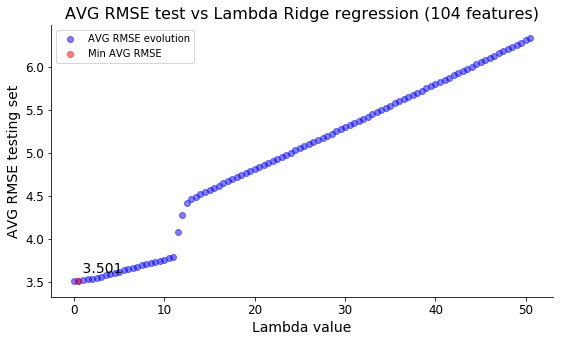

In [423]:
# Plot
# Prepare y-axis data
RMSE_testy = [0 for i in range(0, len(Stats[3]))]
for i in range(0, len(Stats[3])):
    RMSE_testy[i] = Stats[3][i][1]

# Scatter plot AVG RMSE test vs Lambda Ridge regression
# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#plt.ylim(0,55)

# Title and labels
plt.title(r'AVG RMSE test vs Lambda Ridge regression (104 features)')
plt.xlabel(r'Lambda value')
plt.ylabel(r'AVG RMSE testing set')

# Plot
plt.scatter(Lambdas, RMSE_testy, alpha = 0.5, color = 'b', 
            label = 'AVG RMSE evolution')
plt.scatter(Lambdas[Stats[0]], Stats[2], alpha = 0.5,
            color = 'r', label = 'Min AVG RMSE')
ax.annotate(" " + str(np.round(Stats[2],3)), (Lambdas[Stats[0]], Stats[2] + 0.1))

# Add legend
plt.legend()

## Observations
### Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?

Following the same analysis from the previous section, we include three different models (different number of features) in order to study the optimal value of Lambda for the Ridge regression model based on a k-fold Cross-validation. Note that due to numerical issues, we are also reporting the Normal Ridge regression implementation results in order to compare our gradient descent implementation results and notice the optimal value of Lambda. These issues are due to the fact that we have not optimized the value of the learning rate for each instance and also, because the precission for the gradient descent method is critical in comparison to the normal equations implementation (analytical solution vs numerical approach).

### Model 1: 2 features RM and CRIM

A 25-fold Cross-validation has been performed to the simplest model with two features (following one of our previous efforts) $RM$ and $CRIM$. 

Based on the results below, we can easily see (again) that the $RMSE$ values for both the training and test sets are increasing functions of Lambda, showing us that the regularization does not improve the accuracy of the prediction from the model. We can notice how the best  $RMSEs$ are obtained  when Lambda is equal to zero: in other words, when we have a simple regression without penalty term. As seen in the scatter plot above, the function clearly reaches its optimal value (minimum) when Lambda is zero.

Therefore, the optimal $RMSE_{train} = 6.226$ and the optimal $RMSE_{test} = 6.0121$ for a Lambda value equal to 0. In comparison to our previous efforts, we can clearly see that since Lambda is equal to zero that we are just obtaining the same results as when we ran the regression model for $MEDV$ with $RM$ and $CRIM$ and thus, the analysis is identical as before.

| Lambda | AVG RMSE train | AVG RMSE test |
|-------:|---------------:|--------------:|
|  0.000 |         6.2260 |        6.0121 |
|  1.000 |         6.2267 |        6.0128 |
|  2.000 |         6.2289 |        6.0142 |
|  3.000 |         6.2324 |        6.0168 |
|  4.000 |         6.2373 |        6.0207 |
|  5.000 |         6.2435 |        6.0261 |
|  6.000 |         6.2510 |        6.0328 |
|  7.000 |         6.2597 |        6.0408 |
|  8.000 |         6.2697 |        6.0501 |
|  9.000 |         6.2808 |        6.0606 |
| 10.000 |         6.2932 |        6.0724 |
| 11.000 |         6.3065 |        6.0853 |
| 12.000 |         6.3210 |        6.0994 |
| 13.000 |         6.3366 |        6.1147 |
| 14.000 |         6.3531 |        6.1312 |
| 15.000 |         6.3707 |        6.1484 |
| 16.000 |         6.3892 |        6.1671 |
| 17.000 | 6.4087         | 6.1866        |
| 18.000 | 6.4290         | 6.2070        |
| 19.000 | 6.4499         | 6.2281        |
| 20.000 | 6.4719         | 6.2505        |
| 21.000 | 6.4945         | 6.2735        |
| 22.000 | 6.5182         | 6.2974        |
| 23.000 | 6.5424         | 6.3223        |
| 24.000 | 6.5674         | 6.3478        |
| 25.000 | 6.5929         | 6.3739        |
| 26.000 | 6.6194         | 6.4012        |
| 27.000 | 6.6463         | 6.4287        |
| 28.000 | 6.6734         | 6.4569        |
| 29.000 | 6.7013         | 6.4854        |
| 30.000 | 6.7295         | 6.5146        |
| 31.000 | 6.7584         | 6.5443        |
| 32.000 | 6.7888         | 6.5758        |
| 33.000 | 6.8184         | 6.6065        |
| 34.000 | 6.8498         | 6.6388        |
| 35.000 | 6.8798         | 6.6699        |
| 36.000 | 6.9108         | 6.7021        |
| 37.000 | 6.9432         | 6.7356        |
| 38.000 | 6.9763         | 6.7696        |
| 39.000 | 7.0071         | 6.8013        |
| 40.000 | 7.0414         | 6.8372        |
| 41.000 | 7.0729         | 6.8699        |
| 42.000 | 7.1062         | 6.9038        |
| 43.000 | 7.1406         | 6.9397        |
| 44.000 | 7.1746         | 6.9749        |
| 45.000 | 7.2087         | 7.0099        |
| 46.000 | 7.2428         | 7.0458        |
| 47.000 | 7.2788         | 7.0830        |
| 48.000 | 7.3137         | 7.1190        |
| 49.000 | 7.3480         | 7.1545        |
| 50.000 | 7.3841         | 7.1918        |

### Model 2: 13 features

In this case, we can see that the $RMSEs$ functions are decreasing for some values of Lambda (at the beginning) and then they are increasing functions. Thus, we have a convex function and therefore we can identify a minimum value associated with a positive Lambda. From the table below, we can notice that the optimal value for Lambda is equal to 6, obtaining a $RMSE_{train} = 4.6867$ and a $RMSE_{test} = 4.6413$. Therefore, we are improving the original regression model without penalty term from $RMSE_{train} = 4.6752$ and $RMSE_{test} = 4.652$. On the other hand, it is still not better than the model including all 104 features (all interactions) and that the fast-forward implementation of the K-Nearest neighbor algorithm from our previous problem set, based on the values that we already discussed in the previous section.

Important is to note that the new results are better in comparison to the same models without a k-fold CV approach. This is due to the fact that here we are taking the average from a set of different training/test sets, taking into account not only the worst or best results but weighting them.

For example, the same model without cross-validation and Lambda equal to 1 obtained a $RMSE_{test} = 5.3247$ while in this new implementation, obtains a $RMSE_{test} = 4.6484$. Similar pattern can be seen accross all Lambda values.

| Lambda | AVG RMSE train | AVG RMSE test |
|-------:|---------------:|--------------:|
|  0.000 |         4.6752 |        4.6520 |
|  1.000 |         4.6755 |        4.6484 |
|  2.000 |         4.6765 |        4.6455 |
|  3.000 |         4.6782 |        4.6434 |
|  4.000 |         4.6805 |        4.6420 |
|  5.000 |         4.6833 |        4.6413 |
|  6.000* |         4.6867* |        4.6413* |
|  7.000 |         4.6907 |        4.6419 |
|  8.000 |         4.6951 |        4.6431 |
|  9.000 |         4.7001 |        4.6448 |
| 10.000 |         4.7055 |        4.6472 |
| 11.000 |         4.7114 |        4.6501 |
| 12.000 |         4.7178 |        4.6536 |
| 13.000 |         4.7246 |        4.6576 |
| 14.000 |         4.7318 |        4.6621 |
| 15.000 |         4.7395 |        4.6672 |
| 16.000 |         4.7475 |        4.6727 |
| 17.000 |         4.7560 |        4.6787 |
| 18.000 |         4.7648 |        4.6852 |
| 19.000 |         4.7740 |        4.6921 |
| 20.000 |         4.7836 |        4.6995 |
| 21.000 |         4.7935 |        4.7073 |
| 22.000 |         4.8038 |        4.7156 |
| 23.000 |         4.8144 |        4.7243 |
| 24.000 |         4.8253 |        4.7334 |
| 25.000 |         4.8366 |        4.7429 |
| 26.000 |         4.8482 |        4.7528 |
| 27.000 |         4.8601 |        4.7630 |
| 28.000 |         4.8723 |        4.7737 |
| 29.000 |         4.8848 |        4.7847 |
| 30.000 |         4.8976 |        4.7961 |
| 31.000 |         4.9106 |        4.8079 |
| 32.000 |         4.9239 |        4.8200 |
| 33.000 |         4.9375 |        4.8324 |
| 34.000 |         4.9514 |        4.8452 |
| 35.000 |         4.9655 |        4.8582 |
| 36.000 |         4.9798 |        4.8716 |
| 37.000 |         4.9944 |        4.8853 |
| 38.000 |         5.0093 |        4.8993 |
| 39.000 |         5.0243 |        4.9136 |
| 40.000 |         5.0396 |        4.9282 |
| 41.000 |         5.0551 |        4.9430 |
| 42.000 |         5.0708 |        4.9581 |
| 43.000 |         5.0867 |        4.9735 |
| 44.000 |         5.1028 |        4.9891 |
| 45.000 |         5.1192 |        5.0050 |
| 46.000 |         5.1357 |        5.0212 |
| 47.000 |         5.1523 |        5.0375 |
| 48.000 |         5.1692 |        5.0541 |
| 49.000 |         5.1863 |        5.0709 |
| 50.000 |         5.2035 |        5.0879 |

### Model 3: 104 features

Finally, we can see that for the model with all the interactions between the original features (104 features), the optimal value of Lambda equal to 0.5 (from the tested ones) obtaininf values of $RMSE_{train} = 2.717$ and $RMSE_{test} = 3.5$. In this case we can see that the improvement from the original implementation without a penalty term is not very significant.

Important is to note that all the new results are better in comparison to the same models without a k-fold CV approach (see results from previous question). For example, the same model without k-fold CV and Lambda equal to 1 obtains $RMSE_{train} = 2.4530$ and $RMSE_{test} = 4.3849 $ while in this case we have $RMSE_{train} = 2.659$ and $RMSE_{test} = 3.500$. Similar patterns can be found with all the other values of Lambda. This is due to the fact that here we are taking the average from a set of different training/test sets, taking into account not only the worst or best results but weighting them.	

| Lambda | AVG RMSE train | AVG RMSE test |
|-------:|---------------:|--------------:|
|  0.000 |         2.6596 |        3.5030 |
| 0.500* |        2.7177* |       3.5009* |
|  1.000 |         2.8151 |        3.5225 |
|  1.500 |         2.8872 |        3.5328 |
|  2.000 |         2.9595 |        3.5336 |
|  2.500 |         3.0232 |        3.5447 |
|  3.000 |         3.0681 |        3.5579 |
|  3.500 |         3.1040 |        3.5714 |
|  4.000 |         3.1354 |        3.5854 |
|  4.500 |         3.1641 |        3.5998 |
|  5.000 |         3.1908 |        3.6143 |
|  5.500 |         3.2160 |        3.6290 |
|  6.000 |         3.2400 |        3.6438 |
|  6.500 |         3.2628 |        3.6584 |
|  7.000 |         3.2848 |        3.6730 |
|  7.500 |         3.3059 |        3.6873 |
|  8.000 |         3.3262 |        3.7014 |
|  8.500 |         3.3458 |        3.7154 |
|  9.000 |         3.3647 |        3.7291 |
|  9.500 |         3.3830 |        3.7425 |
| 10.000 |         3.4008 |        3.7556 |
| 10.500 |         3.4179 |        3.7685 |
| 11.000 |         3.4346 |        3.7812 |
| 11.500 |         3.6832 |        4.0763 |
| 12.000 |         3.9485 |        4.2724 |
| 12.500 |         4.0966 |        4.4204 |
| 13.000 |         4.1262 |        4.4582 |
| 13.500 |         4.1510 |        4.4885 |
| 14.000 |         4.1741 |        4.5165 |
| 14.500 |         4.1963 |        4.5432 |
| 15.000 |         4.2177 |        4.5687 |
| 15.500 |         4.2389 |        4.5939 |
| 16.000 |         4.2595 |        4.6181 |
| 16.500 |         4.2805 |        4.6427 |
| 17.000 |         4.3012 |        4.6670 |
| 17.500 |         4.3216 |        4.6907 |
| 18.000 |         4.3422 |        4.7147 |
| 18.500 |         4.3633 |        4.7390 |
| 19.000 |         4.3839 |        4.7626 |
| 19.500 |         4.4047 |        4.7865 |
| 20.000 |         4.4253 |        4.8100 |
| 20.500 |         4.4467 |        4.8343 |
| 21.000 |         4.4676 |        4.8582 |
| 21.500 |         4.4886 |        4.8818 |
| 22.000 |         4.5096 |        4.9055 |
| 22.500 |         4.5316 |        4.9302 |
| 23.000 |         4.5533 |        4.9545 |
| 23.500 |         4.5746 |        4.9782 |
| 24.000 |         4.5962 |        5.0024 |
| 24.500 |         4.6183 |        5.0268 |
| 25.000 |         4.6397 |        5.0507 |

Therefore, we can conclude that the new results are better from the ones obtained by our previous efforst inside this problem set, but they are still not better than the Forward-selection + K optimized approach we implemented as a bonus in the previous problem set where a value of $RMSE_{test} = 3.32$ was achieved. A similar forward-selection could be implemented in this model in order to perform a rigorous comparison between both approaches.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [424]:
# Test: RM and CRIM features
## Model GD: MEDV ~ RM + CRIM (wide lambdas range)
# k-folds
k = 25

# Data
X = bostonSTD[["RM", "CRIM"]]
y = Y_Medv

# Lambda values
Lambdas = np.arange(0,51,1)

# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)


------------------------- Lambda value 0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 1.29 seconds
Total number of iterations: 2539
------------------------- CV Iteration 2 -------------------------
Time taken: 1.33 seconds
Total number of iterations: 2537
------------------------- CV Iteration 3 -------------------------
Time taken: 1.56 seconds
Total number of iterations: 2604
------------------------- CV Iteration 4 -------------------------
Time taken: 1.47 seconds
Total number of iterations: 2576
------------------------- CV Iteration 5 -------------------------
Time taken: 1.19 seconds
Total number of iterations: 2636
------------------------- CV Iteration 6 -------------------------
Time taken: 1.39 seconds
Total number of iterations: 2602
------------------------- CV Iteration 7 -------------------------
Time taken: 1.79 seconds
Total number of iterations: 2825
------------------------- CV Iteration 8 ----------------

Time taken: 0.61 seconds
Total number of iterations: 1007
------------------------- CV Iteration 16 -------------------------
Time taken: 0.67 seconds
Total number of iterations: 995
------------------------- CV Iteration 17 -------------------------
Time taken: 0.68 seconds
Total number of iterations: 1000
------------------------- CV Iteration 18 -------------------------
Time taken: 0.69 seconds
Total number of iterations: 996
------------------------- CV Iteration 19 -------------------------
Time taken: 0.54 seconds
Total number of iterations: 996
------------------------- CV Iteration 20 -------------------------
Time taken: 0.51 seconds
Total number of iterations: 1010
------------------------- CV Iteration 21 -------------------------
Time taken: 0.51 seconds
Total number of iterations: 1000
------------------------- CV Iteration 22 -------------------------
Time taken: 0.57 seconds
Total number of iterations: 997
------------------------- CV Iteration 23 ----------------------

Time taken: 0.5 seconds
Total number of iterations: 816
------------------------- CV Iteration 6 -------------------------
Time taken: 0.52 seconds
Total number of iterations: 817
------------------------- CV Iteration 7 -------------------------
Time taken: 0.54 seconds
Total number of iterations: 811
------------------------- CV Iteration 8 -------------------------
Time taken: 0.49 seconds
Total number of iterations: 815
------------------------- CV Iteration 9 -------------------------
Time taken: 0.51 seconds
Total number of iterations: 811
------------------------- CV Iteration 10 -------------------------
Time taken: 0.43 seconds
Total number of iterations: 812
------------------------- CV Iteration 11 -------------------------
Time taken: 0.44 seconds
Total number of iterations: 808
------------------------- CV Iteration 12 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 815
------------------------- CV Iteration 13 -------------------------
Time 

Time taken: 0.39 seconds
Total number of iterations: 749
------------------------- CV Iteration 21 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 743
------------------------- CV Iteration 22 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 741
------------------------- CV Iteration 23 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 740
------------------------- CV Iteration 24 -------------------------
Time taken: 0.45 seconds
Total number of iterations: 739
------------------------- CV Iteration 25 -------------------------
Time taken: 0.48 seconds
Total number of iterations: 743

------------------------- Lambda value 8 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.46 seconds
Total number of iterations: 716
------------------------- CV Iteration 2 -------------------------
Time taken: 0.41 seconds
Total number of iterations: 716
---

Time taken: 0.39 seconds
Total number of iterations: 672
------------------------- CV Iteration 11 -------------------------
Time taken: 0.39 seconds
Total number of iterations: 670
------------------------- CV Iteration 12 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 674
------------------------- CV Iteration 13 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 672
------------------------- CV Iteration 14 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 670
------------------------- CV Iteration 15 -------------------------
Time taken: 0.38 seconds
Total number of iterations: 671
------------------------- CV Iteration 16 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 670
------------------------- CV Iteration 17 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 671
------------------------- CV Iteration 18 -------------------------


Time taken: 0.33 seconds
Total number of iterations: 635

------------------------- Lambda value 13 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 620
------------------------- CV Iteration 2 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 620
------------------------- CV Iteration 3 -------------------------
Time taken: 0.42 seconds
Total number of iterations: 622
------------------------- CV Iteration 4 -------------------------
Time taken: 0.43 seconds
Total number of iterations: 621
------------------------- CV Iteration 5 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 623
------------------------- CV Iteration 6 -------------------------
Time taken: 0.47 seconds
Total number of iterations: 624
------------------------- CV Iteration 7 -------------------------
Time taken: 0.36 seconds
Total number of iterations: 619
------

Time taken: 0.39 seconds
Total number of iterations: 591
------------------------- CV Iteration 16 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 590
------------------------- CV Iteration 17 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 591
------------------------- CV Iteration 18 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 590
------------------------- CV Iteration 19 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 590
------------------------- CV Iteration 20 -------------------------
Time taken: 0.32 seconds
Total number of iterations: 596
------------------------- CV Iteration 21 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 592
------------------------- CV Iteration 22 -------------------------
Time taken: 0.33 seconds
Total number of iterations: 591
------------------------- CV Iteration 23 -------------------------
T

Time taken: 0.3 seconds
Total number of iterations: 559
------------------------- CV Iteration 6 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 560
------------------------- CV Iteration 7 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 556
------------------------- CV Iteration 8 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 558
------------------------- CV Iteration 9 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 556
------------------------- CV Iteration 10 -------------------------
Time taken: 0.37 seconds
Total number of iterations: 557
------------------------- CV Iteration 11 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 555
------------------------- CV Iteration 12 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 558
------------------------- CV Iteration 13 -------------------------
Time 

Time taken: 0.35 seconds
Total number of iterations: 540
------------------------- CV Iteration 21 -------------------------
Time taken: 0.4 seconds
Total number of iterations: 537
------------------------- CV Iteration 22 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 536
------------------------- CV Iteration 23 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 534
------------------------- CV Iteration 24 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 533
------------------------- CV Iteration 25 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 536

------------------------- Lambda value 21 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 528
------------------------- CV Iteration 2 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 527
----

Time taken: 0.33 seconds
Total number of iterations: 510
------------------------- CV Iteration 11 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 509
------------------------- CV Iteration 12 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 512
------------------------- CV Iteration 13 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 509
------------------------- CV Iteration 14 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 509
------------------------- CV Iteration 15 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 509
------------------------- CV Iteration 16 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 509
------------------------- CV Iteration 17 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 509
------------------------- CV Iteration 18 -------------------------
T

Time taken: 0.35 seconds
Total number of iterations: 494

------------------------- Lambda value 26 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.35 seconds
Total number of iterations: 487
------------------------- CV Iteration 2 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 487
------------------------- CV Iteration 3 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 489
------------------------- CV Iteration 4 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 488
------------------------- CV Iteration 5 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 489
------------------------- CV Iteration 6 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 490
------------------------- CV Iteration 7 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 486
------

Time taken: 0.22 seconds
Total number of iterations: 472
------------------------- CV Iteration 16 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 472
------------------------- CV Iteration 17 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 473
------------------------- CV Iteration 18 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 473
------------------------- CV Iteration 19 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 472
------------------------- CV Iteration 20 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 476
------------------------- CV Iteration 21 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 474
------------------------- CV Iteration 22 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 473
------------------------- CV Iteration 23 -------------------------


Time taken: 0.2 seconds
Total number of iterations: 456
------------------------- CV Iteration 6 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 458
------------------------- CV Iteration 7 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 454
------------------------- CV Iteration 8 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 456
------------------------- CV Iteration 9 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 455
------------------------- CV Iteration 10 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 455
------------------------- CV Iteration 11 -------------------------
Time taken: 0.3 seconds
Total number of iterations: 454
------------------------- CV Iteration 12 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 456
------------------------- CV Iteration 13 -------------------------
Time ta

Time taken: 0.22 seconds
Total number of iterations: 446
------------------------- CV Iteration 21 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 444
------------------------- CV Iteration 22 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 443
------------------------- CV Iteration 23 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 442
------------------------- CV Iteration 24 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 441
------------------------- CV Iteration 25 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 443

------------------------- Lambda value 34 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 438
------------------------- CV Iteration 2 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 438
-

Time taken: 0.2 seconds
Total number of iterations: 428
------------------------- CV Iteration 10 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 428
------------------------- CV Iteration 11 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 427
------------------------- CV Iteration 12 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 429
------------------------- CV Iteration 13 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 427
------------------------- CV Iteration 14 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 427
------------------------- CV Iteration 15 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 427
------------------------- CV Iteration 16 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 427
------------------------- CV Iteration 17 -------------------------
Time

Time taken: 0.2 seconds
Total number of iterations: 416
------------------------- CV Iteration 25 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 418

------------------------- Lambda value 39 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 414
------------------------- CV Iteration 2 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 414
------------------------- CV Iteration 3 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 415
------------------------- CV Iteration 4 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 414
------------------------- CV Iteration 5 -------------------------
Time taken: 0.24 seconds
Total number of iterations: 415
------------------------- CV Iteration 6 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 416
---------

Time taken: 0.19 seconds
Total number of iterations: 404
------------------------- CV Iteration 15 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 404
------------------------- CV Iteration 16 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 404
------------------------- CV Iteration 17 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 404
------------------------- CV Iteration 18 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 404
------------------------- CV Iteration 19 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 404
------------------------- CV Iteration 20 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 407
------------------------- CV Iteration 21 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 405
------------------------- CV Iteration 22 -------------------------
Tim

Time taken: 0.19 seconds
Total number of iterations: 394
------------------------- CV Iteration 6 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 395
------------------------- CV Iteration 7 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 392
------------------------- CV Iteration 8 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 393
------------------------- CV Iteration 9 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 392
------------------------- CV Iteration 10 -------------------------
Time taken: 0.18 seconds
Total number of iterations: 392
------------------------- CV Iteration 11 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 392
------------------------- CV Iteration 12 -------------------------
Time taken: 0.19 seconds
Total number of iterations: 393
------------------------- CV Iteration 13 -------------------------
Time 

Time taken: 0.2 seconds
Total number of iterations: 387
------------------------- CV Iteration 21 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 385
------------------------- CV Iteration 22 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 384
------------------------- CV Iteration 23 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 383
------------------------- CV Iteration 24 -------------------------
Time taken: 0.22 seconds
Total number of iterations: 382
------------------------- CV Iteration 25 -------------------------
Time taken: 0.23 seconds
Total number of iterations: 385

------------------------- Lambda value 47 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.2 seconds
Total number of iterations: 381
------------------------- CV Iteration 2 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 381
----

Time taken: 0.21 seconds
Total number of iterations: 374
------------------------- CV Iteration 11 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 373
------------------------- CV Iteration 12 -------------------------
Time taken: 0.25 seconds
Total number of iterations: 375
------------------------- CV Iteration 13 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 373
------------------------- CV Iteration 14 -------------------------
Time taken: 0.21 seconds
Total number of iterations: 373
------------------------- CV Iteration 15 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 373
------------------------- CV Iteration 16 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 373
------------------------- CV Iteration 17 -------------------------
Time taken: 0.34 seconds
Total number of iterations: 373
------------------------- CV Iteration 18 -------------------------


In [458]:
"""
Function
--------
RidgeEvolution_plot
    Plots the evolution of the coefficients from a Ridge regression as function of Lambda

Parameters
----------
X: narray
     X: independent variables
    
Lambdas: array
    Lambda values tested
    
Stats: array
    Results from k-foldCV for Ridge Regression function
    
Labels: boolean
    True if feature names are added as labels
    
Returns
-------
void function (prints-out information)
"""


# Plot function
def RidgeEvolution_plot(X, Lambdas, Stats, Labels=True):
    
    # Total number of features
    Nfeat = X.shape[1]  

    # Features y values
    FeatYaxis = [[0 for i in range(0, len(Lambdas))] for j in range(0, Nfeat + 1)]

    # Create array for each variable
    for i in range(0, Nfeat + 1):
        for a in range(0, len(Lambdas)):
            FeatYaxis[i][a] = Stats[1][a][i]

    # Prepare labels
    FeatLabels = ["INT"]
    for i in X.columns:
        FeatLabels.append(i)

    # Scatter plot AVG RMSE test vs Lambda Ridge regression
    # Figure 1
    plt.figure(1)

    # Figure size
    plt.figure(figsize = (9, 5)) 

    # Font sizes
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    # axes
    ax = plt.subplot(111)                    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    #plt.ylim(0,55)

    # Title and labels
    plt.title(r'Coefficients evolution vs Lambda Ridge regression')
    plt.xlabel(r'Lambda value')
    plt.ylabel(r'Coefficient value (different units)')

    # Multiple plots
    for i in range(0, len(FeatLabels)):
        plt.scatter(Lambdas, FeatYaxis[i], alpha = 0.5, label = FeatLabels[i])

    plt.legend()

    # Plot and annotations
    if Labels == True:
        for i in range(0, Nfeat + 1):
            ax.annotate(FeatLabels[i], (Lambdas[0], FeatYaxis[i][0]))


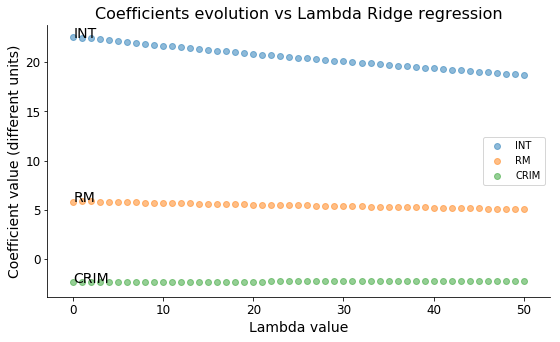

In [455]:
# Plot RM and CRIM regression
RidgeEvolution_plot(X, Lambdas, Stats)

In [456]:
# Model with 13 features
# k-folds
k = 10

# Data
X = bostonSTD.drop("RM2", axis = 1)
y = Y_Medv

# Lambda values
Lambdas = np.arange(0, 100, 10)

# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)


------------------------- Lambda value 0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 15.25 seconds
Total number of iterations: 25272
------------------------- CV Iteration 2 -------------------------
Time taken: 17.26 seconds
Total number of iterations: 26544
------------------------- CV Iteration 3 -------------------------
Time taken: 19.42 seconds
Total number of iterations: 25498
------------------------- CV Iteration 4 -------------------------
Time taken: 18.98 seconds
Total number of iterations: 25053
------------------------- CV Iteration 5 -------------------------
Time taken: 19.74 seconds
Total number of iterations: 26312
------------------------- CV Iteration 6 -------------------------
Time taken: 17.61 seconds
Total number of iterations: 24213
------------------------- CV Iteration 7 -------------------------
Time taken: 18.41 seconds
Total number of iterations: 24552
------------------------- CV Iteration 8 --

Time taken: 0.27 seconds
Total number of iterations: 354
------------------------- CV Iteration 4 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 355
------------------------- CV Iteration 5 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 354
------------------------- CV Iteration 6 -------------------------
Time taken: 0.31 seconds
Total number of iterations: 353
------------------------- CV Iteration 7 -------------------------
Time taken: 0.27 seconds
Total number of iterations: 352
------------------------- CV Iteration 8 -------------------------
Time taken: 0.26 seconds
Total number of iterations: 354
------------------------- CV Iteration 9 -------------------------
Time taken: 0.29 seconds
Total number of iterations: 353
------------------------- CV Iteration 10 -------------------------
Time taken: 0.28 seconds
Total number of iterations: 352

------------------------- Lambda value 70 -------------------------
-----

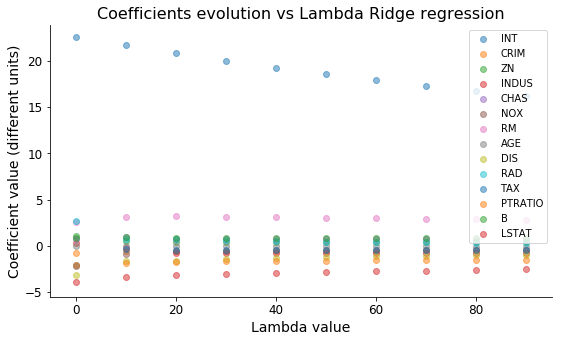

In [459]:
# Plot 13 features model
RidgeEvolution_plot(X, Lambdas, Stats, False)

In [465]:
# Model with 13 features (wide range Lambda values)
# k-folds
k = 5

# Data
X = bostonSTD.drop(["RM2"], axis = 1)
y = Y_Medv

# Lambda values
Lambdas = np.arange(0, 1100, 100)

# Model Params
MaxIterations = 100000
R = 1e-5
epsilon = 1e-10
Intercept = True
verbose = False
NotPenaltyIntercept = False
ModelParams = [MaxIterations, R, epsilon, Intercept, verbose, NotPenaltyIntercept]

# Call the function
Stats2 = CVKFold(k, X, y, RidgeRegression, Lambdas, ModelParams, UsePreviousPoint = False)


------------------------- Lambda value 0 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 22.06 seconds
Total number of iterations: 29917
------------------------- CV Iteration 2 -------------------------
Time taken: 21.95 seconds
Total number of iterations: 28546
------------------------- CV Iteration 3 -------------------------
Time taken: 20.28 seconds
Total number of iterations: 28095
------------------------- CV Iteration 4 -------------------------
Time taken: 17.82 seconds
Total number of iterations: 26525
------------------------- CV Iteration 5 -------------------------
Time taken: 20.54 seconds
Total number of iterations: 28753

------------------------- Lambda value 100 -------------------------
------------------------- CV Iteration 1 -------------------------
Time taken: 0.13 seconds
Total number of iterations: 285
------------------------- CV Iteration 2 -------------------------
Time taken: 0.21 seconds
Total numbe

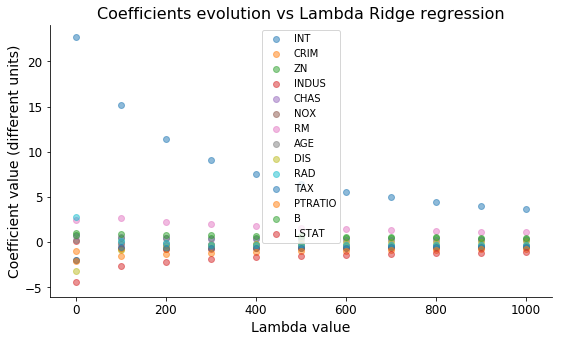

In [470]:
# Plot 13 features model
RidgeEvolution_plot(X, Lambdas, Stats2, False)

## Observations
As expected, we can see how when the value of Lambda is increased the different coefficients from the Ridge regression are shrunk toward a zero value. This is due to the fact that we are penalizing extra complexity of the model due to the addition of the penalty term inside the cost function.

The evolution of the coefficients will depend on the mix of features inside the model. Important is to note that in some implementations the intercept can be ommited or the features may not be standardized, leading to different visualizations. 
We included those options inside our code for further exploration/experimentation of the dataset available to the user.